## Executive Summary:

This report is on the final project of the DATA*6100 course based on the movie recommendation system. 
Thre aree four different datasest. The training dataset with columns userId, movieId, ratin,g and timestamp The given movie dataset of ratings given by users for a particular movie on a 0-5 star scale. .The test dataset with columns userId, movieI,d and timestamp .The movies dataset with columns movieId, titl,e and genres. The links dataset with columns movieId, imdbI,d and tmdbId.The main purpose of this project is to build a user-based collaborative system and predict movie ratings. Apart from that a content-based movie recommendation system and a recommendation for new users have been done in this project.

Here is the brief of the code:

At first, after loading and checking the data info of all four datasets the movies dataset has been merged with the training and testing dataset based on the movie IDs. Then the training dataset was analyzed through a few processes to understand the data in a better way.

In the data pre-processing step, one-hot encoding was used to extract the features.

In collaborative filtering, cosine similarity was used to measure the similarity between user vectors in the user-item interaction matrix. The resulting similarity matrix was used to identify similar movies for recommendation purposes. I in user-based collaborative filtering, the user vectors represent users based on their ratings fomoviesms, and cosine similarity can be calculated to find users with similar preferences.A movie rating prediction was done using the Singular Value Decomposition (SVD) from the surprise library. 3-fold cross-validation was on the training dataset to calculate Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE). Then the prediction was done on the test dataset. Moreover, the train_test_split() method was used to estimate the Mean Squared Error (MSE), Root Mean Squared Error (RMSE) of the Mean Squared Error (MSE), Root Mean Squared Error (RMSE).

Final Score:

Mean Squared Error (MSE): 77.60%
Root Mean Squared Error (RMSE): 88.09%ed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis
Exploratory Data Analysis (EDA) is implemented which analyzes data sets to summarize the main characteristics, often with the help of statistical graphics and other data visualization methods. To get the insights from training, test and movies dataset, they are merged based on their movieID using pd.merge(). Some visualizations are created to get insights from the merged train dataset, merged test dataset, and movies dataset.

A histogram showing the distribution of movie ratings, a horizontal bar plot showing the top 10 most rated movies along with the corresponding number of ratings, a histogram showing the distribution of average ratings per user, a horizontal bar plot illustrating the popularity of different movie genres based on the count of movies in each genre, a line plot illustrating how average movie ratings have changed over the years, a horizontal bar plot showing the top 20 movies with the most ratings, along with the corresponding number of ratings.

In [2]:
# Load train, test data set, movies, links data set using read_csv()function of Pandas library:
movies = pd.read_csv("movies.csv")
links = pd.read_csv("links.csv")
train_df = pd.read_csv("movie_ratings_train.csv")
test_df = pd.read_csv("movie_ratings_test.csv")

In [3]:
# Show the info() of the train dataset with column names, Count of non-null values, and types of it.
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
# Show the info() of train dataset with column names, Count of non-null values and types of it.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     90836 non-null  int64  
 1   movieId    90836 non-null  int64  
 2   rating     90836 non-null  float64
 3   timestamp  90836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 2.8 MB


In [5]:
# Merges the 'movies' DataFrame with the 'train_df' DataFrame based on the 'movieId' column.
merged_train_data = pd.merge(movies, train_df, on='movieId')

# Merges the 'movies' DataFrame with the 'test_df' DataFrame based on the 'movieId' column.
merged_test_data = pd.merge(movies, test_df, on='movieId')

In [6]:
# Print the merged_train_data with 6 columns
merged_train_data

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0,965705637
...,...,...,...,...,...,...
90831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
90832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
90833,193585,Flint (2017),Drama,184,3.5,1537109805
90834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [7]:
# Here the info() of merged_train_data shows the count of Non-null values and the type of every column.
# Hence, every column has no null values
merged_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movieId    90836 non-null  int64  
 1   title      90836 non-null  object 
 2   genres     90836 non-null  object 
 3   userId     90836 non-null  int64  
 4   rating     90836 non-null  float64
 5   timestamp  90836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.2+ MB


In [8]:
#here the info() of merged_test_data shows the count of Non-null values and type of every columns.
#Hence, every columns has no null values
merged_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   movieId    10000 non-null  int64 
 1   title      10000 non-null  object
 2   genres     10000 non-null  object
 3   userId     10000 non-null  int64 
 4   timestamp  10000 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 390.8+ KB


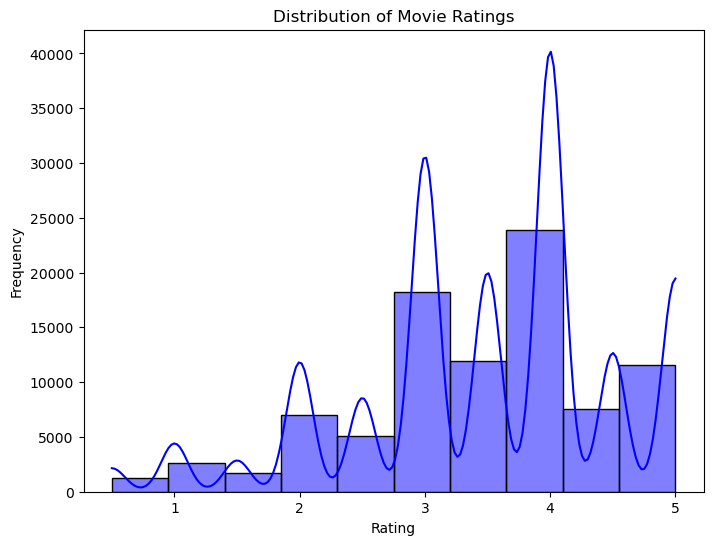

In [9]:
# Plotting the distribution of ratings
plt.figure(figsize=(8, 6))

# Histogram showing the distribution of movie ratings.
sns.histplot(merged_train_data['rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

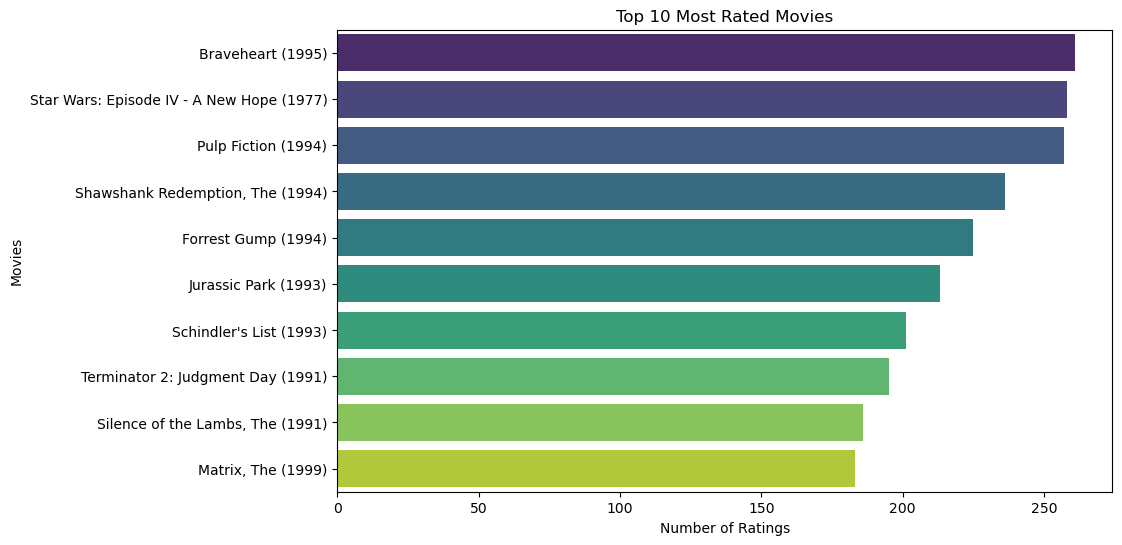

In [10]:
# Identifying the most-rated movies

# Counts the number of ratings for each movie and selects the top 10 most rated movies based on their 'movieId'.
most_rated = merged_train_data['movieId'].value_counts().head(10)

# Filters the 'movies' DataFrame to include only the most rated movies.
most_rated_movies = movies[movies['movieId'].isin(most_rated.index)]

# Plotting the most rated movies
plt.figure(figsize=(10, 6))

# A horizontal bar plot showing the top 10 most rated movies along with the corresponding number of ratings.
sns.barplot(x=most_rated.values, y=most_rated_movies['title'], palette='viridis')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movies')
plt.show()

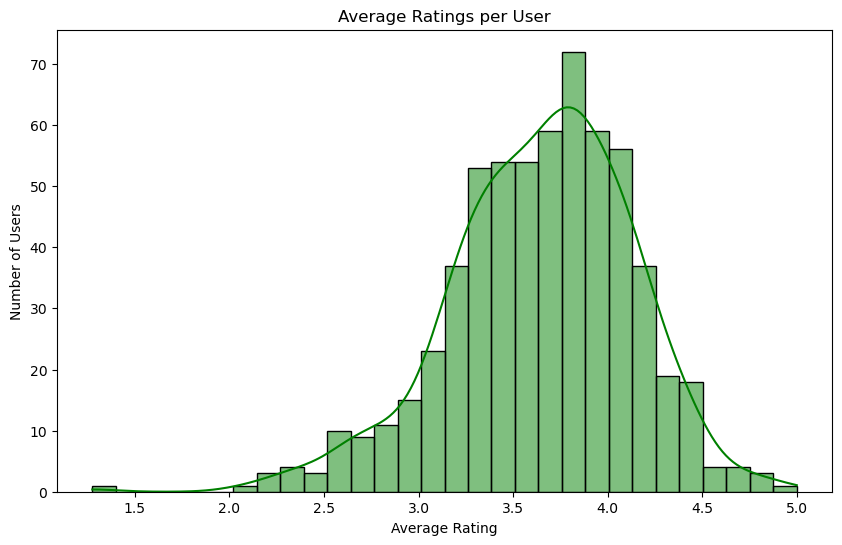

In [11]:
# User Rating Patterns:

# Groups the training data by 'userId' and calculates the mean rating for each user.
user_ratings = merged_train_data.groupby('userId')['rating'].mean()
plt.figure(figsize=(10, 6))

# A histogram showing the distribution of average ratings per user.
sns.histplot(user_ratings, bins=30, kde=True, color='green')
plt.title('Average Ratings per User')
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.show()

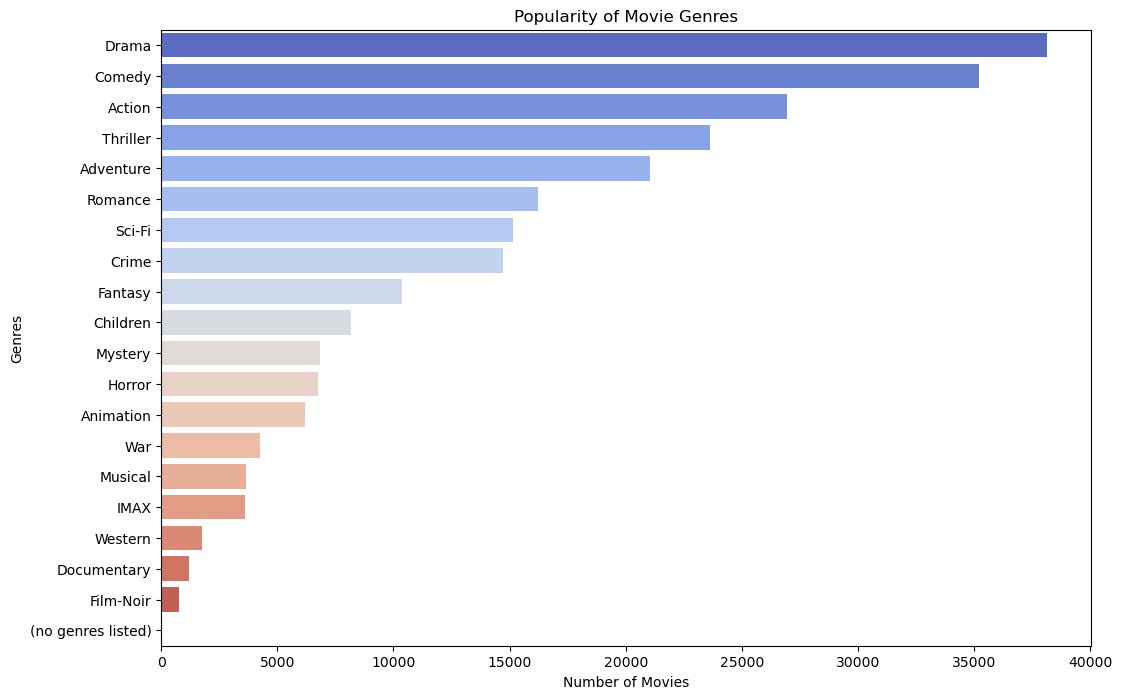

In [12]:
# Genre Popularity

# Uses the get_dummies method to one-hot encode movie genres separated by '|' and then calculates the sum of each genre.
# The result is a Series with genres as the index and the count of movies for each genre.
genre_data = merged_train_data['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))

# A horizontal bar plot illustrating the popularity of different movie genres based on the count of movies in each genre.
sns.barplot(y=genre_data.index, x=genre_data.values, palette='coolwarm')
plt.title('Popularity of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()

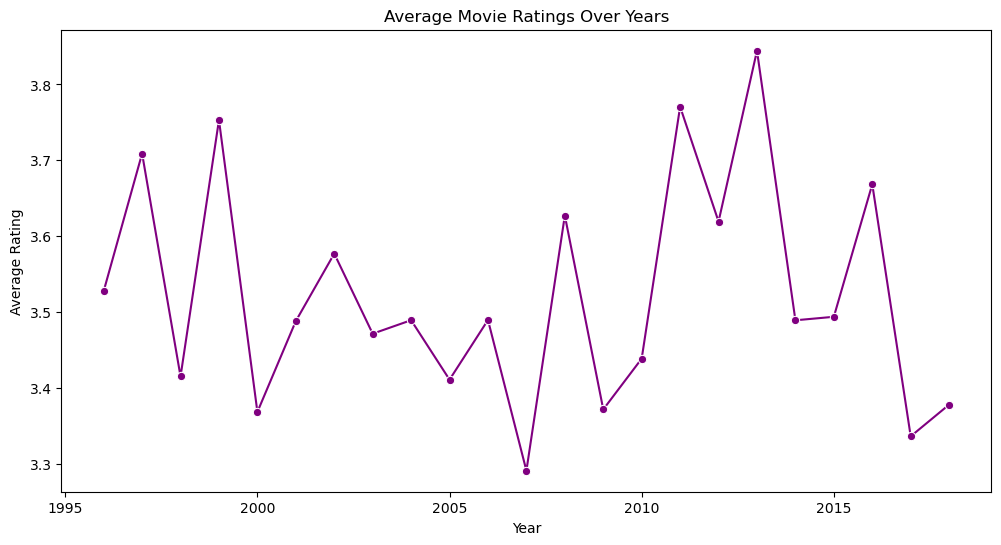

In [13]:
# Temporal Trends in Ratings:

# Converts the 'timestamp' column to a datetime format, assuming the timestamp is in seconds.
merged_train_data['datetime'] = pd.to_datetime(merged_train_data['timestamp'], unit='s')

# Extracts the year from the datetime column and creates a new 'year' column
merged_train_data['year'] = merged_train_data['datetime'].dt.year

# Groups the data by the 'year' column and calculates the mean rating for each year
year_ratings = merged_train_data.groupby('year')['rating'].mean()
plt.figure(figsize=(12, 6))

# A line plot illustrating how average movie ratings have changed over the years.
sns.lineplot(x=year_ratings.index, y=year_ratings.values, marker='o', color='purple')
plt.title('Average Movie Ratings Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

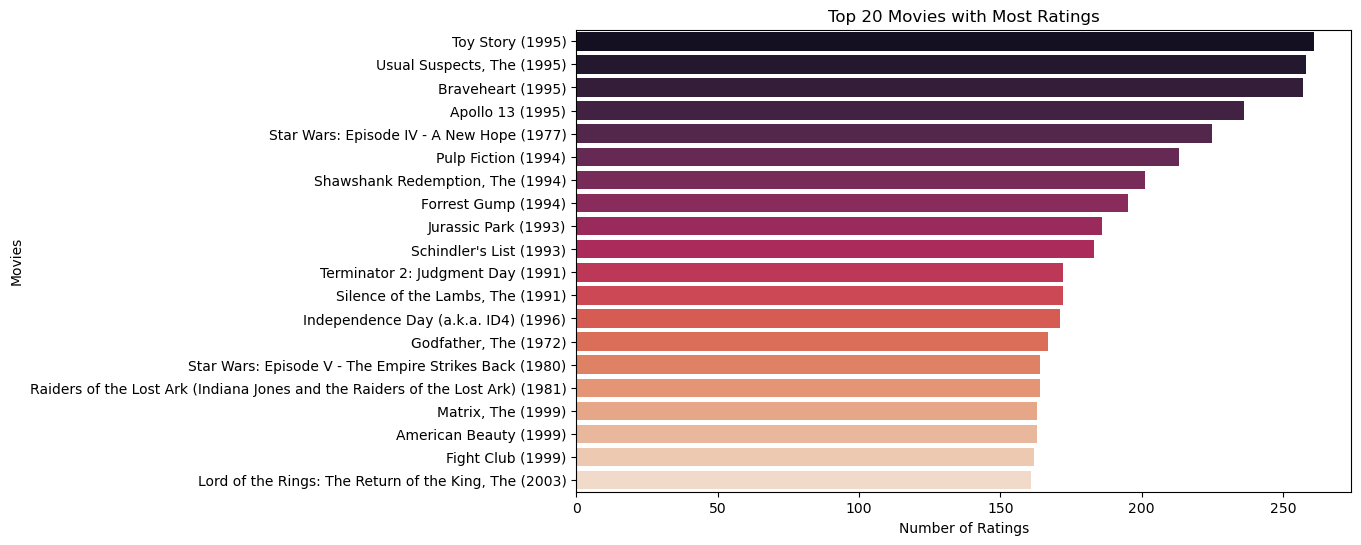

In [14]:
# Rating Count per Movie:
#aCounts the number of ratings for each movie and selects the top 20 movies with the most ratings based on their 'movieId'.
rating_counts = merged_train_data['movieId'].value_counts().head(20)

# Filters the 'movies' DataFrame to include only the top-rated movies.
top_rated_movies = movies[movies['movieId'].isin(rating_counts.index)]
plt.figure(figsize=(10, 6))

# A horizontal bar plot showing the top 20 movies with the most ratings, along with the corresponding number of ratings.
sns.barplot(x=rating_counts.values, y=top_rated_movies['title'], palette='rocket')
sns.barplot(x=rating_counts.values, y=top_rated_movies['title'], palette='rocket')
plt.title('Top 20 Movies with Most Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Movies')
plt.show()

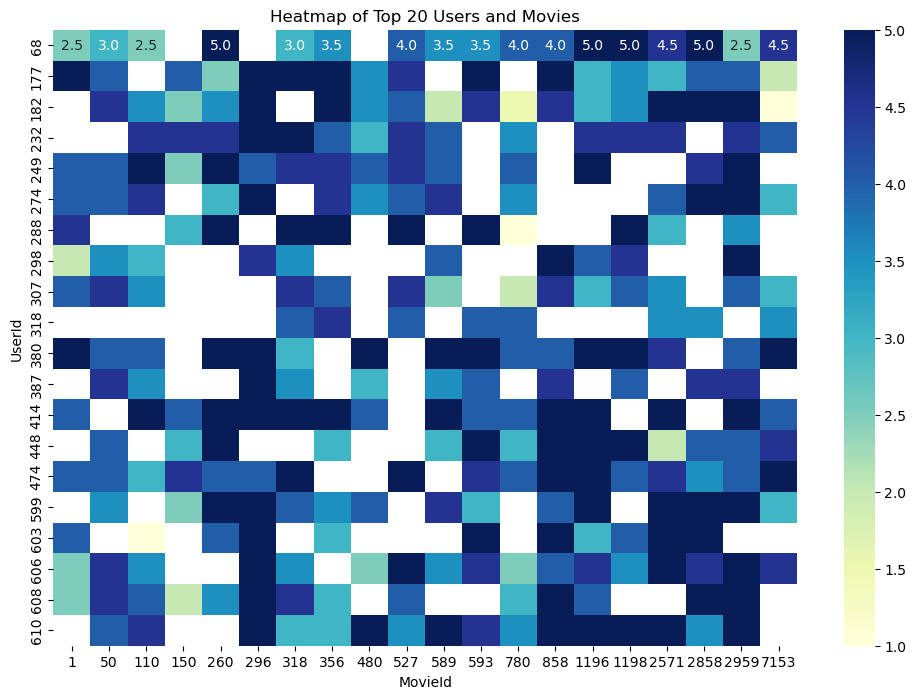

In [15]:
# Heatmap of Top N Movies and Users:
# Identify the top 20 users and top 20 movies based on the count of ratings.
top_users = merged_train_data['userId'].value_counts().head(20).index
top_movies = merged_train_data['movieId'].value_counts().head(20).index

# Filters the training data to include only ratings from the top 20 users to the top 20 movies
top_ratings = merged_train_data[(merged_train_data['userId'].isin(top_users)) & (merged_train_data['movieId'].isin(top_movies))]

# Creates a pivot table where rows represent users, columns represent movies, and values represent ratings.
top_ratings_matrix = top_ratings.pivot_table(index='userId', columns='movieId', values='rating')
plt.figure(figsize=(12, 8))

# A heatmap illustrating the ratings given by the top 20 users to the top 20 movies.
sns.heatmap(top_ratings_matrix, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Heatmap of Top 20 Users and Movies')
plt.xlabel('MovieId')
plt.ylabel('UserId')
plt.show()

## Data Pre-Processing
For Data Pre-Processing of Training, Test, and Movies Datasets, the info() method is used which provides information about the DataFrame, including the data types, non-null counts, and memory usage. From that, it is shown that there are no null values in the Training, Test, and Movies Dataset. Hence, there is no scope to process the null values of the dataset. But from the information on the Movies Dataset, it is found that the Genres column has an object datatype and each row has different genres which are separated by |. Thus, it needs to be pre-processed and performs one-hot encoding on the 'genres' column in the 'merged_train_data' DataFrame using the get_dummies method and then concatenates the original DataFrame with the one-hot encoded DataFrame along the columns.

In [16]:
# Uses the get_dummies method to perform one-hot encoding on the 'genres' column.
# The '|' parameter specifies that the genres are separated by the '|' delimiter
one_hot_encoded = merged_train_data['genres'].str.get_dummies('|')

# Concatenates the original 'merged_train_data' DataFrame with the one-hot encoded DataFrame along the columns (axis=1).
# This results in a new DataFrame, 'train_data_encoded', that includes the original columns along with the one-hot encoded genre columns.
train_data_encoded = pd.concat([merged_train_data, one_hot_encoded], axis=1)

# Print train_data_encoded
train_data_encoded

,movieId,title,genres,userId,rating,timestamp,datetime,year,(no genres listed),Action,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,2000-07-30 18:45:03,2000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1996-11-08 06:36:02,1996,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,2005-01-25 06:52:26,2005,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,2017-11-13 12:59:30,2017,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0,965705637,2000-08-08 03:33:57,2000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082,2018-09-16 14:44:42,2018,0,1,...,0,0,0,0,0,0,0,0,0,0
90832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545,2018-09-16 14:52:25,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
90833,193585,Flint (2017),Drama,184,3.5,1537109805,2018-09-16 14:56:45,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
90834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021,2018-09-16 15:00:21,2018,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Uses the get_dummies method to perform one-hot encoding on the 'genres' column.
# The '|' parameter specifies that the genres are separated by the '|' delimiter
one_hot_encoded = merged_test_data['genres'].str.get_dummies('|')

# Concatenates the original 'merged_test_data' DataFrame with the one-hot encoded DataFrame along the columns (axis=1).
# This results in a new DataFrame, 'test_data_encoded', that includes the original columns along with the one-hot encoded genre columns.
test_data_encoded = pd.concat([merged_test_data, one_hot_encoded], axis=1)

# Print test_data_encoded
test_data_encoded

,movieId,title,genres,userId,timestamp,Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,1305696483,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,1455209816,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,850466616,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,32,856736119,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,86,1344082549,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,134853,Inside Out (2015),Adventure|Animation|Children|Comedy|Drama|Fantasy,148,1482548516,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9996,134853,Inside Out (2015),Adventure|Animation|Children|Comedy|Drama|Fantasy,153,1525552523,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9997,134853,Inside Out (2015),Adventure|Animation|Children|Comedy|Drama|Fantasy,305,1460134155,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9998,134853,Inside Out (2015),Adventure|Animation|Children|Comedy|Drama|Fantasy,561,1491090885,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## Modeling:

### Collaborative Filtering Model:

Collaborative Filtering is a technique used in recommendation systems to make automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating). The assumption is that if two users share opinions on one issue, they are more likely to have similar opinions on another issue. There are mainly two types of collaborative filtering: User-Based Collaborative Filtering, and Item-Based Collaborative Filtering.
    
At first, the final training dataset 'train_data_encoded' was split into training and testing sets using the train_test_split() function. Here, the 'test_size' argument mainly specifies the percentage of data allocated for the validation set. The model's performance evaluation depends on this value as the percentage of data used for training and testing. The 'test_size' value 0.2 means the split is performed with a test size of 20%, meaning 80% of the data will be used for training, and 20% for testing.

To ensure the data was split in the same way while running the code multiple times and get a consistent result the 'random_state' parameter value was fixed to 42.

Then user-item matrices were created for the training ('train_data_matrix') and testing ('test_data_matrix') sets using the pivot_table() method. This matrix represents user interactions with items, where rows correspond to users, columns to items, and entries to ratings or interactions. In this case,

    i. index='userId': The user IDs are used as the index of the matrix.
        
    ii. columns='title': The item movie titles are used as the columns of the matrix.

    iii. values='rating': The ratings users give to items are used as the values in the matrix.
    
Though there were no missing values, as a common regard fillna() method was used to fill any missing values (NaN) in the matrix with zeros.

In the next step, the cosine_similarity() function was used to compute the cosine similarity between all pairs of users in the 'train_data_matrix'. Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. In this context, users are treated as vectors in a high-dimensional space, where each dimension corresponds to an item movie title. The value was stored in the 'user_similarity' matrix that contains the pairwise cosine similarities between users. The diagonal elements have a value of 1, indicating the similarity of a user with themselves. Values closer to 1 indicate higher similarity between users.

The 'user_similarity_matrix' is mainly a DataFrame where each entry represents the cosine similarity between the user with ID i and the user with ID j from the user_similarity matrix.

The 'recommend_movies' method provides movie recommendations for a given user based on collaborative filtering. The 'user_similarity_scores' property holds the similarity scores of the given user (user_id) with all other users from the precomputed similarity_matrix. To identify the most similar users to the given user the similarity scores are sorted using the sort_values() method in descending order. The 'top_users' property has the top users with the highest similarity scores selected by excluding the user itself (iloc[1:]). The 'top_users_ratings' has the ratings of the top users for all movies from the user_data_matrix. The 'recommended_movies' property calculates a weighted sum of ratings using the ratings of top users and their similarity scores for each movie. It normalizes the sum by the total similarity score. Finally, the method returns the number of recommended movies a user wants sorted based on the calculated scores in descending order, and the rating. 

The 'get_content_based_recommendations' method returns a list of recommended movies based on content similarity given a movie title using the TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer and cosine similarity. In the beginning, the TfidfVectorizer() method converts a collection of movie genres  to a sparse matrix 'tfidf_matrix' of TF-IDF features where each row corresponds to a movie, and each column corresponds to a genre. The 'cosine_sim' is a symmetric matrix, linear_kernel() method computes the cosine similarity between all pairs of movies based on their TF-IDF vectorized genres. The content-based recommendation basically retrieves the cosine similarity scores between the input and all other movies, sorts the result, and returns the top 10 movie titles.

The 'recommend_for_new_user' method is a simple and popularity-based recommendation strategy that recommends the top 10 most popular movie titles for a new user based on the popularity of movies in the training dataset. On a note, this approach does not account for individual preferences..


In [18]:
# Split data into training and testing sets
train_data, test_data = train_test_split(train_data_encoded, test_size=0.2, random_state=42)

# Create user-item matrices for training and testing sets
train_data_matrix = train_data.pivot_table(index='userId', columns='title', values='rating').fillna(0)
test_data_matrix = test_data.pivot_table(index='userId', columns='title', values='rating').fillna(0)

In [19]:
# Building the Recommendation Model using training data
user_similarity = cosine_similarity(train_data_matrix)
user_similarity_matrix = pd.DataFrame(user_similarity, index=train_data_matrix.index, columns=train_data_matrix.index)

In [20]:
# Function to recommend movies
def recommend_movies(user_id, user_data_matrix, similarity_matrix, number_of_movies):
    user_similarity_scores = similarity_matrix[user_id]
    user_similarity_scores = user_similarity_scores.sort_values(ascending=False)
    top_users = user_similarity_scores.iloc[1:].head(number_of_movies)
    top_users_ratings = user_data_matrix.loc[top_users.index]
    recommended_movies = (top_users_ratings.T * top_users).sum(axis=1) / top_users.sum()
    return recommended_movies.sort_values(ascending=False).head(number_of_movies)

In [21]:
recommendations = recommend_movies(1, train_data_matrix, user_similarity_matrix, 5)
print(recommendations)

title
Star Wars: Episode V - The Empire Strikes Back (1980)    4.805230
Monty Python and the Holy Grail (1975)                   3.827860
South Park: Bigger, Longer and Uncut (1999)              3.812799
Star Wars: Episode IV - A New Hope (1977)                3.805557
Usual Suspects, The (1995)                               3.791456
dtype: float64


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Create a TF-IDF Vectorizer for the genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on content similarity
def get_content_based_recommendations(title, cosine_sim=cosine_sim):
    idx = train_data_encoded[train_data_encoded['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]

# Example usage
recommendations = get_content_based_recommendations("Toy Story (1995)")
print(recommendations)

1706                                          Antz (1998)
2355                                   Toy Story 2 (1999)
2809       Adventures of Rocky and Bullwinkle, The (2000)
3000                     Emperor's New Groove, The (2000)
3568                                Monsters, Inc. (2001)
6194                                     Wild, The (2006)
6486                               Shrek the Third (2007)
6948                       Tale of Despereaux, The (2008)
7760    Asterix and the Vikings (Astérix et les Viking...
8219                                         Turbo (2013)
Name: title, dtype: object


In [23]:
def recommend_for_new_user():
    popular_movies = train_data_encoded['movieId'].value_counts().head(10).index
    return movies[movies['movieId'].isin(popular_movies)]['title']

# Example usage
new_user_recommendations = recommend_for_new_user()
print(new_user_recommendations)

97                              Braveheart (1995)
224     Star Wars: Episode IV - A New Hope (1977)
257                           Pulp Fiction (1994)
277              Shawshank Redemption, The (1994)
314                           Forrest Gump (1994)
418                          Jurassic Park (1993)
461                       Schindler's List (1993)
507             Terminator 2: Judgment Day (1991)
510              Silence of the Lambs, The (1991)
1939                           Matrix, The (1999)
Name: title, dtype: object


### Predicting Movie Ratings:

To predict the movie ratings Singular Value Decomposition (SVD) method from the surprise library was applied here. SVD is a matrix factorization technique that decomposes a matrix into three other matrices, representing different aspects of the data. Compared to other Machine Learning techniques like principal component analysis (PCA) SVD performs better as a result of the special matrices it creates. It establishes a foundation for breaking down data into independent components for analysis and manipulation.

As the first stage of the prediction model, the 'Reader' class was used to interpret the rating scale in the range from 0.5 to 5.0. The Dataset.load_from_df() method loads a subset of the original dataset 'train_data_encoded' containing user IDs, movie IDs, and ratings based on the rating scale value stored in 'reader'. The 'data' property encapsulates the user-item-rating information. After loading the SVD() algorithm from the surprise library in the 'algo' property it was passed to the cross_validate() method along with the 'data' to calculate Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) of the training dataset. The 'cv' indicates 3 means data was split into 3-fold cross_validate meaning the model is trained and evaluated three times, with a different subset used as the test set each time. The mean score of MSE, RMSE, and MAE is 78.72%, 88.73% and 68.34% accordingly. 

The 'trainset' includes all the ratings in the original dataset using the build_full_trainset() method and fitted with the SVD model using the fit() method. The zip() method combines the user IDs and movie IDs from the original test dataset 'test_data_encoded' into tuples and forms a list. The value of the third element, rating is 'None' for each tuple, which indicates these entries are to be predicted. The 'testset' property is a list of these tuples, where each tuple represents a user-item pair. The test() method of the SVD model has been used of the 'testset' to predict the ratings and the values are stored as a list in the 'predictions' property. The predicted ratings of each movie have been added to the 'test_data_encoded' dataset under a new column named 'estimated_ratings'.

The train_test_split() method was used to split the Surprise Dataset object (data) into training and validation sets, where 20% of the data will be used for validation. The 'trainset' was fitted with the SVD model and the test() method was used on the 'validationset' for prediction. In this case, the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are 77.60% and 88.09% respectively.

In [24]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy

In [25]:
# Prepare the reader and load train data into Surprise format
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(train_data_encoded[['userId', 'movieId', 'rating']], reader)

In [26]:
# Initialize the SVD algorithm
algo = SVD()

# Cross-validation to compute MSE, RMSE and MAE
cross_validate(algo, data, measures=['MSE', 'RMSE', 'MAE'], cv=3, verbose=True)

Evaluating MSE, RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
MSE (testset)     0.7969  0.7874  0.7774  0.7872  0.0080  
RMSE (testset)    0.8927  0.8873  0.8817  0.8873  0.0045  
MAE (testset)     0.6869  0.6820  0.6812  0.6834  0.0025  
Fit time          1.18    0.96    0.84    0.99    0.14    
Test time         0.29    0.27    0.27    0.28    0.01    


{'test_mse': array([0.79694122, 0.78735085, 0.77744929]),
 'test_rmse': array([0.89271565, 0.88732793, 0.88173085]),
 'test_mae': array([0.68690187, 0.68202067, 0.68122207]),
 'fit_time': (1.1750984191894531, 0.9626967906951904, 0.8351202011108398),
 'test_time': (0.2908029556274414, 0.2693171501159668, 0.26984715461730957)}

In [27]:
# Build a training set
trainset = data.build_full_trainset()

# Train the algorithm on the trainset
algo.fit(trainset)

In [28]:
# Prepare the testset
# Note: The test set should not contain the rating column as we are going to predict it
testset = list(zip(test_data_encoded['userId'].values, test_data_encoded['movieId'].values, [None]*len(test_data_encoded)))

In [29]:
# Predict ratings for the testset
predictions = algo.test(testset)

In [30]:
# Extract the estimated ratings
estimated_ratings = [pred.est for pred in predictions]

# Add the estimated ratings to the test dataset
test_data_encoded['estimated_rating'] = estimated_ratings

In [31]:
# Convert the predictions to a list
list_predictions = estimated_ratings
rounded_list_predictions = [x for x in list_predictions]

#### Leaderboard score:

In [32]:
def my_answer_list():
    return [4.088092411739675, 4.0341101817154135, 4.06933722523066, 4.173291675775953, 4.035068507977753, 4.054754139412004, 3.917712889999008, 4.164169765684796, 3.4055817333309477, 3.7023988378192385, 4.568165670536511, 3.928751041014301, 3.6777311893283384, 3.974185635573358, 4.677364658060432, 3.831229408761382, 3.360226244188474, 4.632746030911636, 3.5579382460577182, 3.633785458052657, 4.247212236930968, 3.653130422784834, 4.179054146915572, 4.061826866822919, 3.2954348784397376, 4.1671164777311285, 4.207244942249469, 4.071070995265457, 4.242775547946673, 4.218384218364318, 3.370768412266832, 3.476454161369903, 3.8348403581270496, 3.60485388745748, 3.9110094568583986, 3.6680344566246372, 3.963335616130323, 4.520416426545436, 4.30893813557918, 4.233258044456773, 3.2329280283688693, 4.191682966358073, 4.153008500783124, 3.858702985205769, 2.888703585288374, 3.613800119249098, 3.1770229065349285, 3.1515133686004235, 3.8028671365703404, 2.8042765931523803, 4.09086552580672, 3.1418635039866367, 3.117190373430258, 4.328989278641002, 4.056639514767992, 2.606124815975037, 3.7684134082439256, 3.9060941953368427, 3.297124868291748, 3.4187529176991838, 3.8740687092716937, 3.514912462140184, 3.884885124023286, 4.363594688306447, 3.375413598791683, 3.1874281049282813, 3.1516951178225874, 4.3242801033260445, 3.072236199983389, 2.1499364784207087, 3.0439349355326977, 3.01522616991824, 4.008053322332774, 3.0082641347212697, 2.6014944919132725, 2.443231224693492, 3.3899235804475847, 3.4799109315349344, 3.126659064650992, 2.6959189535927983, 2.8988470236400437, 2.402466148865796, 2.8894091078374466, 4.443493493686925, 3.0455217547197826, 4.009778570058288, 3.1610129170845505, 2.9216637897480484, 3.782790965837714, 2.394186122792764, 2.8751344374838013, 2.5961656763258456, 4.227972024854638, 3.8108898259586885, 3.8814084796046107, 4.270173357761475, 4.118396897322737, 4.195710760649313, 3.4882011187569635, 4.038574885663956, 4.083580372677481, 4.249164581761823, 4.501049813700403, 3.253948990285005, 4.049547257083795, 4.250530579271113, 4.209928208424019, 4.154141162254666, 3.7835079571090016, 3.828805956030127, 4.652435048129412, 3.820114753577539, 3.8160909674255916, 4.818339660564564, 3.6302093865952827, 3.1997888103973127, 3.9320771480562997, 3.0559324167782056, 2.8907284034790677, 3.284232504544914, 3.4762827465594754, 3.7705431111917638, 3.7263509097488474, 4.426524333505848, 3.9232405221438866, 3.973251435107031, 3.934376641520699, 3.5531345215800667, 3.4441038434439832, 3.1544553486520868, 3.5256056654709473, 2.959465621865031, 3.891543222027429, 3.3561651719523105, 3.908801410705301, 2.7430597471702116, 2.493326798593885, 2.920410006981377, 3.6507859840825687, 3.32336102744565, 3.127972468160429, 3.3354593482651733, 4.308287541388856, 4.304798966533756, 3.929777525155964, 3.3403336064195597, 3.493690565796683, 3.5007619984630156, 3.612285545585998, 3.528843083022596, 3.3313930333248676, 3.610526868721217, 4.456879076223552, 3.8268901494660694, 4.0569463932338845, 3.7735382406071674, 3.9198030571302556, 3.9436902086093317, 4.2814885345704035, 2.8818994019981985, 2.870219714758411, 3.7538125803656923, 4.208023442815982, 3.572491387677495, 3.806330132393728, 4.7132142530867, 3.6791582246748264, 3.508169268336009, 4.018202912290004, 3.448246228267842, 3.959064459708424, 3.9814402650584566, 3.663225847647672, 3.464632312055138, 4.412562107222899, 3.921739602514815, 3.5068939174400016, 4.5528562438988365, 3.8818626570947137, 3.7245763165808876, 4.382715471847814, 4.206026835398242, 2.3968292735130796, 2.466502364598389, 3.6297942702326713, 2.451222276878836, 2.895383556437922, 2.0867850181423693, 2.971364360411762, 2.923931462857522, 3.2891095984524163, 1.4070518601140025, 2.725911301080086, 2.283320521732591, 3.010099596372824, 2.574986495116317, 2.5326405030788512, 2.6705402149771404, 3.610225552504616, 3.6526633751070636, 3.6126683544343097, 3.3185446624768513, 3.902502459453782, 3.4744586282208436, 3.355300918170613, 3.2013130367212113, 3.94175097250792, 3.2062214024730866, 2.6908754336072986, 3.5476898802049446, 3.3530053986077992, 3.7615682932541636, 3.6230537832513536, 3.6532874950413112, 4.1545524128865265, 3.366087560347531, 3.7311957018425685, 3.2738745825831637, 3.927453414695555, 3.9731737099081283, 3.83561082240185, 3.7950536849956253, 3.7675687461536707, 3.849732816653047, 3.463853558584821, 3.7781008845714044, 3.7588152371139754, 3.4942467240902912, 3.547947934760572, 3.7550351395953294, 3.742500248516196, 4.022329895734358, 3.799922436436675, 3.337566574438341, 4.053135994714339, 4.279498220933973, 3.1578298752747367, 3.2890546760914012, 4.2220333995011785, 4.280638813168415, 4.955673694165069, 4.310250215822572, 4.939371807543384, 4.519736005748167, 4.4752370761344125, 3.9546532067742675, 4.154067066857991, 3.6471483806047162, 3.6667965983420894, 4.202295621406908, 3.4970689840377265, 3.8541385570839397, 4.287712339534158, 4.096662010282375, 4.16607417528789, 3.769416838707296, 3.6921016503911703, 4.28583525572497, 4.348326772732663, 4.220002024927017, 3.9214305737446704, 4.500923098809811, 3.9334330279385137, 3.9331013030638786, 3.662339442489487, 3.4496720095335913, 3.254568613521968, 3.8299505792388344, 3.3094899937727464, 3.4753997605044558, 3.7613011068140616, 3.530160623586617, 3.3409209751360667, 2.823331347432352, 4.024955314966233, 3.712821688979691, 3.245666484054628, 3.2647421721336873, 3.1121096929246495, 3.899484683218661, 3.4552521666948817, 2.8925600066717623, 3.7467837447476233, 4.126269054165908, 3.8496291184517837, 3.510880144053065, 3.6440086862661936, 3.459782573333826, 4.651590960817225, 3.531218608966736, 3.9538166496154483, 3.900509204661934, 3.5180065963599234, 3.603273701406937, 4.017854703768975, 4.109919519339763, 3.79457721921725, 4.046687960339188, 4.6804865521965695, 3.419371055961922, 3.3743904803239055, 3.935076854380653, 3.278994065305569, 3.467291593123261, 3.002239435576015, 3.2662063099974743, 2.5246290253537875, 3.3631529827888893, 3.5541070595741946, 3.108987125310254, 3.0137123116549325, 3.4750922505037445, 3.5289604376272634, 3.8853721819038167, 3.4050111346152985, 3.034669367901081, 3.6446145072194587, 2.3442805782716296, 3.2689773618856153, 2.6874998710594085, 2.4830433021699596, 2.8796813684927827, 2.670731302214661, 2.8436941889303355, 2.2806899328043517, 3.3435600822267895, 1.6870994374599089, 2.4461940847524595, 2.9028484440197393, 3.8860686995891234, 4.052039603836155, 3.6841502731215447, 3.5940304983419886, 5.0, 4.564268474323777, 4.2479891013125535, 3.873890276764512, 4.074200604577222, 4.024828915657225, 4.083017800353283, 3.6369428157769015, 3.733703285270029, 4.7157996208271715, 4.1775840941504185, 4.265032250502756, 3.030773145572281, 3.35763435624388, 4.048432382767693, 3.584547580353956, 3.8059533904478884, 3.7446689944043174, 3.8745762015972285, 3.335725663524782, 3.778500579613379, 4.127895487458219, 4.131271811494854, 4.0609069654108545, 3.923549795153028, 3.5254752932250106, 3.473019143205116, 3.7707269096603278, 4.335035390571422, 3.9479643303347536, 3.690403024110971, 3.733815779569486, 4.671751150247523, 3.164735182353704, 4.132834903131829, 3.282387959054514, 3.5526534187803023, 3.6903278657262306, 3.567346799700675, 4.024911457002459, 4.608667169195523, 3.469893365968163, 4.021706608532281, 3.854153963141793, 3.311589600530372, 2.8832749520818144, 3.3616392159197797, 3.170293001954415, 2.9439291417182627, 3.5534079956898084, 2.881004955563438, 1.900213596582204, 2.5464829575157935, 2.8820787669757326, 3.8183026887607205, 3.4284803922823017, 3.3919693500621904, 2.9682404655547012, 2.4579676309178042, 4.068802881981927, 3.698867421081982, 3.895652285790719, 4.490711420144393, 4.854663884937672, 4.873453396445276, 4.460240051534572, 5.0, 4.027912148479633, 4.248659706227029, 4.70385299838332, 3.945821563085077, 4.16022020522986, 4.0695876476786745, 4.2215639099621125, 4.154632594665831, 4.559785020210257, 4.654183057119645, 3.60094178491138, 3.4639697419317548, 4.690341393863177, 3.5930244997168916, 3.71835554373364, 4.108585650039749, 4.464530314008008, 3.7655828187574016, 3.898030884130047, 4.438790558032709, 4.168277833515816, 4.038501206510696, 4.314614389857666, 4.012094017078706, 4.231674072195361, 4.852238644399285, 4.4722734660662855, 4.745091062194098, 3.9359725060861726, 3.1164723236431158, 3.9640931951711633, 3.6292130218771095, 3.2120335634822443, 3.2320836663054786, 3.9097705540861925, 3.4317952537182626, 2.3952071743874397, 4.315837899440526, 2.794282950139874, 3.429844562085263, 4.519433049299125, 4.023497497192998, 3.329821490881748, 3.4297972323706767, 3.4928046364504297, 3.647819271301435, 3.9591039535072916, 3.1718635873712673, 3.7446274558205235, 3.21809776499543, 3.171150091661386, 3.6792293930194715, 3.4510081200912586, 3.749995867517909, 3.598518768740698, 3.4950514183750343, 2.434356964725089, 3.1670550999524445, 3.33012629032453, 2.812441254021463, 2.9014740916990633, 3.540187327825111, 2.363357184825075, 2.878840143340774, 3.493640681929857, 2.8237316178787575, 2.9929085774641004, 2.8968817838225367, 2.811476590751508, 3.6568694648816193, 3.603299518461533, 3.372212319402347, 3.2730318475390665, 3.235594366010731, 4.207683507545357, 3.477202327129243, 3.6887653828300415, 3.8941957648447545, 3.4138760154089884, 4.333920038129011, 4.097290612439765, 2.804332686324585, 3.6062529066254756, 3.4797985903444553, 3.1797344089095794, 2.5250289258965353, 4.180289891953321, 3.9351578647111243, 4.271504052240042, 3.8970835637686205, 4.244403070334905, 4.229451881846425, 4.398521385312478, 3.7300286526333513, 3.955885481022117, 3.984392089300623, 3.9127955634649023, 4.030880174479921, 3.678152725633708, 4.158130089224109, 4.355632766911861, 3.9139656982687305, 4.036207709829221, 3.862582662838381, 3.2368478971698718, 3.8448392805310054, 4.276278274048789, 4.003272164448438, 3.71956442367618, 4.221906001331336, 4.3245947922066295, 3.5717969367807663, 3.837187866256084, 4.166886838673776, 3.6909394985947213, 4.499467913149667, 3.6192458804947147, 4.020885479469235, 4.241159963769494, 4.453831437148831, 3.788391264553528, 3.462457572405639, 4.1278049226404745, 3.376735193071354, 3.8760792819043774, 4.103442273487965, 4.5256918830946935, 4.943713944054315, 3.9866636127725372, 3.984842059851032, 4.079818246323352, 4.6512098655219045, 4.606828050065214, 4.309090978223163, 3.762526115775647, 4.1265420939985535, 3.748124806620773, 3.927091433604843, 4.283743791480645, 4.208964402558038, 3.6576402963756345, 4.297739547610654, 2.9873901427909892, 4.039383157890171, 3.023988975859273, 3.2876770345580266, 3.7155308437365786, 3.670962853033672, 3.166791775224178, 3.0366952495046355, 3.371933491405418, 3.208569027191992, 3.4554429155173048, 3.7186154276921046, 4.1923056535894005, 3.6469927903680537, 3.5073842472813253, 3.8671421257677974, 3.152229774896807, 3.893230062915359, 3.3731580003081305, 3.204551181634024, 3.7456974768351112, 4.375088878207091, 3.4304977809243837, 3.3838990800628466, 3.41778675324156, 3.3257576674291065, 3.5162343247629857, 3.7381757522057972, 3.174257028499258, 4.053851306671965, 3.735767424859624, 3.2652733078491853, 2.064667141356446, 2.365408372420456, 3.1257391060867667, 4.032884453654839, 3.996751185553875, 4.15852314721955, 3.8559150517719996, 3.2458735883176884, 4.272594946459321, 3.7366549962357567, 3.4017573885905046, 3.9148427054008517, 4.037598350285051, 3.864005839741212, 3.4527022798652833, 4.142345155625696, 4.029677132000117, 2.975998971229356, 4.019642002457854, 4.0062869748953975, 4.040868755992909, 2.7286653485252526, 3.531554571099381, 3.98064268775535, 4.57136659299102, 4.128595517484509, 3.8940329360951402, 4.6686266705172255, 3.7489836833123906, 3.890981099774516, 4.510040328006733, 3.3051688000680546, 3.4113688328427973, 3.6703779341194003, 3.630120232663217, 3.685083509490966, 3.3439053648448342, 3.530212636259275, 3.849347840532565, 3.7129435918029476, 2.9642330196024647, 3.2063714613454657, 3.0059088330150754, 4.420140954202129, 3.256265868424013, 3.5704660793463385, 3.1940195122097874, 3.3336553185039444, 2.771717764770352, 3.4883782282958, 3.3844741410545014, 1.868399957298145, 1.7291078915714373, 3.2159386421255367, 2.4106165373045587, 2.923953413689193, 2.6558481672760674, 3.1703296352073456, 2.603990358215708, 3.345711526776653, 3.006889952617969, 2.977900281096025, 2.9921201357020535, 2.928076625625232, 3.786479137241099, 2.6367445967827248, 3.7915778843037646, 3.303834897760131, 1.7423638080589388, 2.6172700732861696, 2.291038016099044, 2.6912998073810135, 2.4448327436507227, 3.4345783503021643, 1.6637970377023776, 2.976971230268061, 3.1854616626340166, 2.476458622071317, 2.9610280599171195, 2.915300807713923, 2.782444472423085, 2.3543738787679773, 2.5009588177032294, 3.186111603444586, 2.880625307083106, 3.060045886825741, 2.924463667982393, 2.6491014859876767, 3.788532876488192, 2.457847314487131, 3.142936030313498, 4.372294417172513, 4.195209753464649, 4.291515512439752, 3.829613316268855, 3.4538463755421747, 4.364282867684029, 3.604796122342107, 3.6426358870877515, 4.0640811750032855, 3.3672601183098223, 4.023058498256692, 3.5898042166571495, 3.7972478178279765, 3.677085717790363, 4.19998328256995, 3.5409552056563047, 3.5718448350851872, 3.893465863924222, 3.5454920577684645, 2.957505191880038, 3.5170194654330342, 3.4309443383755043, 2.907908290576631, 3.1586630152179795, 3.6164722516410905, 2.5235140072024764, 4.110358932423069, 3.1151687728958675, 3.768307021727243, 4.192971208458902, 4.15358620185611, 3.374692345303672, 3.629601655329208, 3.861581804635102, 2.5647045773145276, 3.9659534948963073, 3.462577785610109, 2.996152508235287, 3.2748595848895223, 2.4468199218514846, 4.015861172298477, 2.9615877785154003, 2.9224594209384587, 2.9449181579670625, 3.9869297408289364, 3.958965160414722, 3.73776045379665, 3.603903446262704, 2.805824127063915, 3.8274944719082655, 3.7028316362459375, 3.8120241756125104, 1.9694367688326793, 4.056755444705407, 3.1617470224037656, 3.0467076839057676, 3.7297025078044905, 3.40290622784765, 3.2187570589508794, 4.163919977244471, 3.763292458229191, 2.8821673346787686, 2.655605256516921, 3.475366015668839, 2.539135123273404, 2.276257153851007, 2.9824999092408113, 2.344578115393449, 2.0230561937600773, 3.40264762307759, 2.95587341675064, 2.4256907950780526, 2.8228912385057945, 3.3264503767170894, 2.892179793456086, 2.5625589379905565, 1.5657034866307018, 2.497028123354517, 2.212359197405352, 3.361468563333047, 2.2678815825255128, 2.4832929382924744, 3.2122729817020184, 3.368439798408656, 2.918377497413011, 2.662735655133441, 3.070896336899371, 1.7257152855562299, 2.569172145991307, 3.7675060637699227, 2.5834568399540077, 3.58753750638573, 3.548719078921823, 3.3002516604148617, 2.2743171865240837, 3.7002532560392294, 3.381518211966851, 2.608673890855505, 2.7439688438549634, 3.3588044982702514, 2.370046895027899, 3.4503683628108823, 3.6607358071582623, 1.9052624507406755, 3.0552875973953184, 2.948218143033272, 2.9796929324938577, 3.02403905368274, 2.874253428535811, 3.1718341707722324, 3.225748349131183, 2.8374373062808393, 3.9753907695541146, 2.9297865304717807, 3.6813432170430724, 1.6016385334690082, 3.4271805373844386, 3.5699278597346145, 3.720146498567262, 3.1488248208506064, 2.862883671217115, 3.8087562656349805, 2.2305960314463444, 3.9027703861075107, 2.772316892263725, 2.3320263653178186, 3.302021113148931, 2.555264642971183, 2.7727354414675913, 2.6050483509836106, 3.11393479053104, 3.1127232209500457, 3.153200590300535, 3.02883079867717, 3.029300099170453, 4.281720634423551, 3.6660898731328575, 3.0482241187165733, 2.932359804495566, 2.9465216635175335, 3.8161534386876177, 2.543164887217444, 2.738784630914172, 2.7858997425358893, 3.2453074964336652, 2.198101831819622, 2.9641394828027696, 3.6688931076059554, 3.055966295539583, 2.81180186165308, 2.410781255949684, 2.9025767442949926, 3.2677410964377827, 2.9825186745952776, 3.9200823543681347, 3.5127718977743707, 3.3318049178425717, 3.3921839335380692, 3.599387607190068, 2.282965989766755, 3.8139526800406607, 3.4376726439431864, 3.4282257496717072, 4.314427112970662, 3.130467001099318, 2.830248946590378, 3.7694337656190617, 3.977840152054179, 3.8057557076548965, 4.398888918576715, 3.79528658904583, 4.052518610663571, 2.612355542454001, 4.060149882938457, 3.8501273411819854, 3.8980929325422777, 3.8360955311688376, 3.7235112219947535, 3.3458706263723013, 4.239251954047193, 4.419880723744637, 4.317349298610839, 3.1824249273794227, 3.766829697156017, 3.522497873627586, 3.0222398656900555, 3.403157627884572, 3.5553128191554246, 3.54870779941657, 3.2435529758754886, 3.4473158354962283, 3.651316989041313, 3.7447774195525807, 3.916097259701148, 3.715492611623691, 3.5115562068777937, 3.7918479442807134, 3.2176649443333267, 3.084447392699608, 3.30029691162191, 4.172087871767686, 4.312905658563198, 3.1809482139383176, 3.1610321769776677, 2.7063197838872917, 3.3469484933740676, 3.3123927325390197, 3.2192240700232215, 2.892655785116497, 2.9206051348152684, 3.7819560356519917, 3.062957751513654, 3.5421759283701797, 3.165992705157617, 3.038338004917013, 2.6836311923083787, 3.011343417295846, 2.8336597843603357, 2.56734420460633, 2.935646690723957, 2.6428242751853976, 3.250514662646903, 3.4790210380319238, 3.2475796253809412, 3.414032468955386, 3.387239536961737, 2.7894028918642575, 3.506143914091566, 3.005851344321699, 2.5777907944751686, 2.702141379124392, 2.333235534781013, 2.905528590836601, 3.5512347233325032, 3.3776252395808593, 3.8705742605517974, 2.88912356086323, 3.6750727459955614, 4.06384362511736, 3.8859085642315025, 3.406788657419102, 3.686958361624615, 3.2900306125367433, 3.5581653988274655, 2.882864311214247, 3.078918557536736, 3.3022638107156825, 3.374525662595563, 3.1787053849778304, 3.2839890026918446, 3.5317428878345374, 3.463379013860075, 3.750557486381385, 3.761314399923448, 3.167849697319278, 3.5021370550896793, 3.6295715555183614, 2.4537083964006845, 3.3873786384998974, 3.3965007345947336, 3.1588797391827965, 3.8369365880639563, 4.044267657865595, 3.417577738940579, 3.2320796560433402, 4.262847316363752, 3.9335326098460026, 2.475120181066918, 3.484092470810096, 1.8952510468668808, 2.926955909405987, 3.612258394112011, 3.580774898899427, 3.2326180356040273, 3.3155753655510405, 3.2985424845917937, 3.2580706865993814, 2.63839406028656, 3.819942826792347, 3.4199650968172186, 3.696441136563192, 3.043653611958449, 3.0158721288919934, 3.2374307245801286, 3.225933969801668, 3.431211523813278, 3.593411736884182, 4.21486885062598, 3.3945368343458355, 3.2798119958095766, 3.0258757793535827, 3.565465989966896, 3.7335234649657907, 3.6849084628664412, 4.374902399645648, 3.951777300557896, 4.773753805923742, 3.823971549268468, 3.6776434628219183, 3.788116692736321, 4.527421785686654, 4.739461144776792, 2.7708253361501267, 3.8592457054710168, 4.801695842345945, 4.752526877959731, 4.347081723934076, 4.51028009705079, 4.073076706088578, 3.6958180968750067, 4.45084508656412, 3.7167943546074476, 3.157418615524466, 3.624063819372508, 3.676224827729905, 4.284290469511405, 4.31993215901917, 4.17782661185949, 4.206876250153105, 3.6819908999954842, 4.340769089286758, 4.0617772807597055, 4.773213700014844, 4.055602651346864, 4.026827758142347, 3.445104003597388, 4.443788957963115, 3.7418958008489556, 4.299301955940287, 5.0, 3.872959571135509, 3.914839803065482, 3.8688401956525325, 3.5366861180728875, 3.7352631226609514, 3.3083618977845064, 3.7936127256529515, 2.8578903224143373, 3.4241330940590182, 3.2967821469629084, 3.1093791822827255, 3.015818243386989, 3.3376727594452733, 3.678679114026777, 3.8096752556020417, 3.3198701393596974, 4.2069241287424655, 3.2413317082438797, 3.7654770206598154, 3.8180014672415177, 3.6606564623029034, 3.921254587978557, 3.344257303962867, 4.175510183559465, 3.005618277380465, 3.5344856545495174, 3.738398272966257, 3.2624164809118112, 3.6785152420751617, 2.809750943660327, 3.5476112139856903, 3.579006913309609, 3.41311212002252, 3.479346953576655, 3.924388067549576, 3.338985125505026, 3.4486264125081343, 2.9616288640445223, 2.5868243817051764, 3.65242970986697, 3.2638302896109304, 3.204718214236472, 4.021807865877707, 3.154228479303568, 4.371050433728449, 2.7830629625678442, 3.7802542069188405, 3.460727166475986, 3.827287736922935, 3.492175908825035, 3.3886184624045597, 2.3723204388258154, 2.3474336256968242, 1.94186737304423, 3.475449386816321, 2.5991853900814763, 3.2901399219042333, 2.499807418463054, 3.753027445439095, 3.386756564234508, 2.9750678149709207, 3.2883688747435524, 4.1063608483136855, 3.205930325107278, 2.3215922002631615, 2.699007809541435, 2.6762314068041575, 4.246398050011987, 3.1925365142398783, 4.424869377796243, 4.423672450335262, 4.549067085114601, 3.8265526348014647, 4.010336204682764, 4.3613403340069254, 3.903473410035629, 3.9773074060114495, 4.577878810049622, 3.5325776646300007, 4.3785977899654, 3.435184856654949, 4.333887936966128, 3.252257981291385, 3.0108314918840957, 3.598512469536083, 3.997416294361206, 4.526502621695341, 4.515161032549998, 4.286058365847968, 4.100820145898997, 4.1239607123755535, 3.897760480145173, 4.038032715469841, 4.175262197142674, 4.050007857997011, 3.4053410661807257, 4.110244224319098, 4.028584467041566, 4.279553992884573, 3.3270059451594802, 4.3613230351887395, 4.6174188269583745, 4.08571219187885, 3.321077588611569, 4.5743681977781785, 4.53575327934071, 4.048904766970383, 3.7989839728952632, 4.1391238539215705, 4.705451629824863, 4.477045003105822, 4.48074523858295, 4.3152459459549535, 3.845305216810794, 3.790930988895412, 4.230654411910729, 4.441190021193477, 3.9331229525159435, 4.203767358272879, 4.467867251892292, 3.9829834272255242, 4.152925070663595, 4.492462263967307, 4.363097986432874, 4.210963665863594, 4.392535560706144, 4.294645494257588, 4.257566656630857, 4.3382162545156655, 4.263834338043409, 3.4689697432230644, 4.28912482536125, 4.220674245362027, 4.342362233949219, 4.398994424693005, 3.6339871845673417, 4.09465618730018, 4.488199302324136, 4.032705988892951, 3.8127272118487427, 4.179833220929978, 4.623836066436763, 3.9377986049954106, 3.545433914592479, 3.93310672629473, 4.004933052135912, 4.0748554377605375, 3.6728720703422795, 3.590946543549154, 3.1353308018733825, 3.9116732555922273, 3.671695752757393, 3.341151138599091, 3.489623257178725, 3.8691520901357492, 3.888192316288042, 3.7096112304701148, 3.4732876786455904, 3.493151237008086, 3.109731660515499, 2.555697536772174, 3.3498488251813368, 3.7193629548445544, 3.0154700949349036, 3.636413065627366, 3.530190755507415, 3.255203670935008, 3.2201067812548416, 3.719445794858758, 4.317374222270531, 3.2287954109418964, 3.1791639604893187, 3.5032488182057753, 3.230681087594177, 3.1157657792991253, 3.6073468424055144, 2.947340181068215, 2.9853774516239415, 4.117327702484878, 3.4397934730282254, 3.3762610646144595, 3.6527226928235605, 3.152663181551168, 3.2907005481042972, 3.0414157264010746, 3.2674851440991994, 3.1801575733073193, 3.545328080805305, 2.857649764576076, 3.678055286898802, 3.1597455773722043, 4.025749869877209, 2.7024556553518537, 2.4170035026047367, 2.560077053386202, 3.0460587307021996, 2.13387773882899, 4.094655308796338, 3.539629236589328, 4.376046618042304, 3.770631192707817, 3.795974806273613, 4.778567235629584, 4.025176272470057, 4.47674002343419, 4.245595318871828, 4.688442800692061, 4.275981729480915, 4.1702090462326415, 4.972759513669786, 4.487215487664922, 4.038243237064217, 3.6781545241324696, 4.170753363008671, 4.518993782571854, 4.112155921882129, 4.807987604631558, 4.617820816873582, 4.6053507507915485, 4.448205012556346, 4.275208707541852, 4.471384021127546, 3.8036994650921607, 5.0, 4.537070762823194, 4.249581506870593, 3.947501322519235, 3.9989589926139493, 4.612754673324636, 4.23768737203741, 4.46927736474849, 4.551986568300089, 4.322434460216812, 4.5817682938078, 4.276334194807312, 4.7958330580604684, 4.349052408947031, 4.855714243264437, 4.579994906750436, 4.8550741761547425, 4.181219205617486, 4.121224060114683, 4.163823272227124, 4.744908759542861, 4.172647270245754, 4.411710484714956, 4.616011071227701, 4.666304450167629, 4.60237371194345, 4.22846421305818, 4.286491531238628, 4.6823147329762005, 4.586950982827364, 4.456958177668071, 4.879465521402387, 4.4444249317139155, 4.122022995423378, 4.231666984373951, 3.601573599337016, 3.3921968184159557, 2.859500276107417, 3.885234567594022, 4.586026317294271, 3.785652147526448, 3.263436543234095, 4.227013285470079, 2.6244061851172904, 2.6769353755317287, 3.336966541325792, 4.201323035284863, 3.6357103144277176, 3.7888067905516323, 2.455695970119429, 3.6267164388854862, 3.437984990726942, 3.1609694629302765, 3.9632702446741646, 3.5098774830822355, 3.500989242367044, 3.2174680138467893, 3.812498322045923, 3.7327188609565973, 3.6083568773967896, 3.108292014888247, 4.10579369047584, 3.392294495696329, 3.396687094512709, 3.8261004950152304, 3.7664438939044564, 4.08233170685716, 3.8608685502480955, 3.4405793253476844, 3.9839696661392097, 2.1982923519848314, 3.1187225826239584, 2.9912791779547887, 3.460001404060761, 3.8051519239677303, 3.5858006674162466, 3.084362138694891, 3.471148680893539, 3.9497567811211702, 3.4955334775627844, 4.2069724518316995, 3.3186610614986223, 2.880402931359628, 4.607985785129557, 3.979228617769301, 3.2358627647684024, 3.578989660066834, 4.306158077840834, 3.619939342331255, 4.686970104614941, 3.357921038790117, 3.464367284061684, 3.0563047909491954, 4.121997298518055, 3.426027763103402, 3.343278833752432, 3.295404411126536, 3.290013482381969, 3.9243106219448323, 3.382086243941425, 4.51383587122493, 3.284576219739737, 4.384630434085109, 3.4615441344368016, 2.4995748698740137, 4.05273706624588, 3.04029875742047, 3.3451237311495294, 2.942892755230677, 3.3766139794302976, 2.5139428342855576, 2.9516907934874745, 2.373818534820402, 2.885358558834008, 3.723184108948474, 2.9190301522859516, 3.2078754621515806, 2.602432899328985, 2.4843400298837848, 2.441612478701997, 3.2155873502839016, 3.1923557313780453, 2.1071490620104267, 3.3027211389807904, 2.920342204422923, 2.396699739274286, 3.26350093819364, 3.1853434724717853, 3.1550343502534512, 3.2941688886983655, 2.9929631535112557, 3.5043166370307173, 2.6424118438019937, 3.1475756094430296, 2.03541094133671, 3.329262601054949, 3.8115366195936917, 3.659687187902244, 2.1454186242786273, 2.3100673487075536, 4.5857463793693665, 3.6181340985915678, 3.434665545463222, 4.012434230716458, 3.474052745174065, 3.4735208765827195, 3.2913383097019975, 3.6729350471680338, 3.627169896915861, 3.4855721608897086, 3.0940985564774213, 3.01097456318992, 3.6725139156773587, 4.246212632127511, 3.1732414652167753, 2.5164846386608484, 3.4387235689843156, 3.1397888242878484, 3.9438249099319327, 4.033487623236219, 4.317749213197199, 3.1193385605470336, 3.3665096248270916, 3.402798841649713, 3.370298695767804, 2.9380182378734245, 3.6628133089629844, 3.457726067830765, 3.343314036542522, 3.3364297687524216, 3.9733588296837743, 3.9395921182290934, 2.764786660696831, 3.8650554263204033, 4.071232336450135, 3.356576520295502, 3.0049741016495246, 4.336333769619074, 3.693363933071797, 2.7666086440176594, 3.935756937841667, 3.5566552604891224, 3.9664710929533573, 3.3888063630471468, 3.757660059588178, 2.1870940367783396, 2.936808649481383, 2.2054211792908767, 2.1253567247942273, 2.456447767593952, 1.4854865266014867, 1.5902380222629175, 1.5005922397503921, 2.197092932223209, 2.243799901123441, 4.234095603669169, 4.156825475358044, 3.6027998132650327, 3.7552535565984626, 4.113175205097961, 3.6900302417755646, 4.067577090670274, 5.0, 4.654713703207198, 4.1110894409718295, 3.876132484216491, 3.8455174362207365, 4.9543633770339905, 4.204436963914078, 4.121907920183659, 3.9689881208357427, 4.58536025245498, 4.210729930179185, 3.643102831981165, 3.9729213002459676, 4.548396814624437, 4.109605891027933, 3.932290508812473, 3.553906163917322, 2.834127860232127, 3.58353974147052, 4.29218113276073, 4.319795253929624, 4.340763441043371, 4.903744480928366, 4.492974213480952, 4.434240102968874, 4.47393798461671, 4.077962866028878, 4.950884038908077, 3.3291229421799473, 3.74920299245899, 4.24013605067342, 3.9439797097691756, 3.885664645194045, 3.6769945282985477, 3.365907349183486, 4.641055508629907, 4.300503716971268, 3.756219383255561, 4.467178042682549, 3.8458828445704705, 4.052789757493334, 4.47023400538902, 4.169978098569559, 4.093286930430096, 4.419119314635657, 4.066739631113676, 4.135112061559044, 4.524361355673673, 5.0, 3.4036945975790385, 4.404674819915127, 3.948535875299272, 5.0, 3.907279421275314, 4.760053603974957, 4.484133425054568, 3.7702307881102866, 4.607977684404374, 4.0104164572233385, 3.730604770900614, 4.295021852066024, 3.83215793504649, 3.7379748188881465, 3.970321330575059, 3.8989480175979625, 3.3779361320108383, 4.479109489934883, 3.1707843480080427, 3.1753015862692466, 3.495291044760081, 3.9975358212906698, 3.6800804741376885, 2.546145482999723, 3.6712465276380417, 4.095228839191356, 3.445538451179656, 3.7510437889434773, 3.377103225909326, 2.6885101386194403, 3.2958591524208227, 3.4298834159695115, 3.348086436673927, 3.9262822959050734, 3.8685072620435963, 3.88409275224709, 4.667022984324254, 4.147095366390496, 3.8760801280784665, 3.7621945915916157, 3.6767753800172844, 3.617844279681743, 3.495510926343734, 4.2951844468270615, 3.257728336737173, 3.5598596840708403, 3.2318234674518496, 3.2803322284983194, 3.7925480954101167, 4.1516797980284865, 3.578947191552672, 3.973580093593844, 4.390195501001101, 4.073293608688343, 3.5038993297441063, 3.517562061879055, 3.733859798347369, 3.616463294056248, 3.8633936923427954, 4.330465126785701, 4.689320437602271, 3.8566472867846486, 3.9708845539297037, 3.38656377720151, 3.9404494105768832, 2.9541407669919417, 3.751829597957557, 4.608684216237799, 3.7114406241224978, 4.597403721853528, 3.233729765553656, 3.249333526184093, 2.4745851906425, 3.204029140885764, 3.521124575475881, 4.417555856403054, 3.8934235613966104, 3.2011010577465613, 3.756441256324084, 4.042453441763495, 3.129864233798431, 2.782633009939587, 3.1166834510091075, 3.7383734561618365, 3.3341237428537953, 1.5707344843243538, 3.754905606458634, 2.6893821950733305, 2.8941401401095472, 2.793510125079604, 2.703152941513682, 2.6936468203681354, 3.0288262978095504, 2.9001767040795774, 2.978471202260579, 2.9465668694026834, 3.8651995796448904, 2.836989310230769, 3.661475301894956, 3.050195023819972, 3.0857331020198653, 3.3360375710488017, 3.489942683675701, 3.858317309659123, 3.279553698490351, 3.53990176673884, 4.128602972187154, 3.413962679153505, 3.5661423780442982, 3.4982481803659273, 3.4278544857742066, 3.8843150270713385, 3.4851314761494745, 3.6711553536756503, 3.577612160073835, 3.9410740553434813, 3.361688042966468, 3.127051271403818, 3.6713394412633855, 2.9293575418050093, 3.8386352762942733, 2.714755290572374, 3.397356709580044, 3.6661666106865898, 3.9196527693132013, 2.3679098868212947, 3.2605442753353655, 3.149841781516351, 3.4683994057249183, 2.574126756223266, 3.040318368582415, 3.2290257916386453, 2.005293514405235, 3.5577473658603753, 3.2835602372998647, 3.6306514896426987, 2.7632737977531474, 3.247923114367939, 1.8993682665645286, 3.9745622733593335, 4.852285919683052, 3.6231402401704123, 3.749363288011079, 3.427392560382456, 3.8327984203244623, 3.5986894461209844, 3.703539891584336, 3.44893174213325, 3.467715467323201, 3.6327369942810783, 3.7032935743543414, 3.257456867593116, 2.925184330511433, 3.741946408229862, 3.8359494552899065, 3.16157106383705, 2.7442309759823704, 4.109560516960132, 4.04219454534546, 3.5488636196876375, 2.930988323653936, 3.621709654442032, 2.6133993238289213, 3.3399827539933225, 3.5644681193983274, 3.3553986754681704, 3.4668771155423945, 4.39925773061689, 3.513384643678243, 3.731628782418617, 3.9660186173632233, 3.366137379131735, 3.5596211377172575, 4.4554471660506065, 3.0628232516706806, 3.1513370682176336, 2.5553935223294983, 3.8771180725056844, 3.715812060042115, 3.2642345539560136, 3.9067155203244956, 3.9346124509194467, 3.7718051487003468, 3.22450549796692, 3.2787951723430737, 3.869682676301714, 3.369262059541575, 3.9120363367214175, 4.147993179665732, 4.014753894077704, 3.119356200868112, 3.906264999476815, 3.4472191899760936, 3.5009267213548294, 2.854441459447277, 4.200567988085283, 3.8950382875203684, 3.7792581533839407, 3.3779014055407264, 3.9377882425503543, 3.3262565744934447, 3.5458349475429842, 2.5026836195005187, 3.3106869006579847, 2.9708918449233623, 3.414620991373398, 3.7394690693536505, 3.5550757392014827, 4.529250499022235, 4.2811025955114035, 3.5214133325803005, 3.114537820411927, 4.224413564525016, 3.2530579775536776, 3.7451388109225614, 4.163728283102412, 3.9880093246330266, 3.058577017536024, 3.509197984700637, 3.8703376599034396, 3.094802727754184, 4.015940623981666, 3.6253510310481207, 2.894981134586728, 3.5716208017645514, 3.234139314721523, 3.344670497790281, 3.5105172979237547, 2.84548401897603, 3.3878868345725275, 2.823452613351769, 3.3608204233598182, 3.0125807170107226, 3.235201004528717, 3.931340373175223, 2.3394431678962753, 3.1676724045941422, 2.60370605909605, 2.9615855636325326, 3.078391498555374, 2.4116873405324695, 3.4008913814864634, 2.3650509530072856, 2.9539376657411442, 2.7604991072354657, 2.900625615800031, 4.022394119758861, 3.6924961177371105, 3.6830395663537656, 3.8441951399369354, 4.080230777903944, 3.1754735346388125, 3.0364561265151693, 3.2712783440660678, 2.8308148549134002, 2.7318099986948967, 2.053866901994293, 2.4245070366942416, 2.3672079540394417, 2.244253613685529, 3.57698206379341, 2.3971489841115705, 2.3367382913348234, 3.3649277241866997, 4.355157066957553, 3.486026653337549, 3.6028800578251765, 2.734320422389085, 3.148863281943756, 3.065521068491764, 3.328031902370814, 1.9371104715047778, 2.705053735232032, 2.317048159679751, 3.131797554330237, 2.729974485489201, 3.3667066831853916, 1.6839998130960137, 3.108584855470033, 1.7352941030980449, 3.9730037780961043, 2.8382924777846097, 2.2274615574034975, 1.313556180682594, 2.722210117103931, 3.075476909038978, 2.5988125558319837, 2.5186715892205584, 1.8290011060116431, 2.6155375834058727, 2.5388091152621945, 2.3722033258518804, 2.117433908385442, 2.834393013440192, 2.287499320997994, 2.8752279594128116, 2.684994402919297, 3.8883348581600927, 3.7215708853455522, 3.8625344078052035, 3.4712246707367003, 4.511238009675612, 3.7701921132302365, 3.2520933487911394, 3.9906256611673383, 3.0106529437494705, 3.4824783673010797, 3.361013907376826, 3.3697849733996375, 2.4852498345603315, 2.6555615576901346, 4.517337052309538, 4.3671547224574425, 3.2678523683396072, 3.718332869378775, 4.247815926218306, 3.3686872975843247, 3.541093219689206, 3.9373653339037973, 3.557381624553904, 3.9559579489207817, 4.328698300628302, 2.876558309473578, 2.079813324910274, 3.0801524622330443, 3.571650713908861, 2.3822186436303783, 3.3466012269022314, 3.437491450807837, 2.9214495622629544, 2.3498343793677394, 3.102026427430587, 3.3799146529898234, 3.007802893155313, 2.942879701459268, 2.8803300559806, 2.9464033389612, 3.025353259911924, 3.0110176727275038, 2.888385753004285, 2.6323393334792105, 2.916782580666156, 4.184384647864146, 3.5596779980126034, 2.1552985446963273, 3.9655652668927073, 3.2530263495813063, 3.3900760642086585, 3.569162606364086, 3.774129718887019, 3.4664810896526785, 4.182827065120389, 3.408090001501793, 3.3588917390672335, 2.982095910800406, 3.753004586647606, 3.374409468549639, 3.480046873462803, 4.074060296484075, 3.7880315228354116, 2.704193598499146, 4.3120421489922975, 4.325503428913982, 3.6363402102785, 5.0, 4.3987989626160635, 4.3383770967450115, 4.298080175326035, 4.519890389210389, 4.365805498244553, 3.7738697406001047, 3.7025147622599746, 4.2060144358587035, 3.6924003928961815, 4.4821665287029075, 4.370333684984404, 3.546651194223536, 4.2863055318758585, 4.669241739688506, 4.607814855452506, 2.732400954918989, 3.7352447350419773, 3.7397627937750757, 4.144226472069123, 4.143034171368991, 4.201961211826986, 4.244360808437501, 3.701253481383812, 4.755630554794053, 4.074310270797754, 3.9848054083797706, 4.141610336168445, 3.9018322985030456, 4.069421483753508, 4.181668150957266, 3.802612409891145, 3.5410102100923995, 4.353804611369231, 3.848007321897554, 4.719038605149302, 2.7296087122205406, 2.855682966951654, 2.7249563478114047, 3.2787267648572547, 3.215164318957374, 2.3075785314236485, 3.542308672415278, 3.723848242722541, 2.566084273310098, 3.260003494910615, 3.2796646813248858, 2.361604882699519, 2.8436518099032617, 3.955163238496796, 4.737958864014585, 4.098679404554503, 3.1791009709627676, 3.5283209583331687, 2.9786863209350676, 3.406975487003696, 3.286194241453928, 2.7587940841868854, 3.8889167316688162, 3.356446241162119, 3.4219287596977686, 3.5592637840844663, 3.838215219918915, 3.6637275745881084, 3.4708672390280744, 3.53677267384109, 3.800573847115628, 3.438882620721782, 3.541318997120194, 3.6531211963095864, 3.2258331771721527, 2.618239246788151, 3.9001197334376716, 3.6339794796778175, 2.9197349397400476, 4.060203440659235, 4.13750031251393, 3.092739958182068, 4.648603783876669, 3.990517839264204, 3.88233725791948, 2.93369952221706, 3.9404728391458717, 3.96223244805268, 4.003317871462931, 3.1408141959528417, 3.465309035284719, 3.315833993747021, 4.24555747875346, 4.00458669650656, 3.452600658789213, 2.5621741495546617, 4.009289076628176, 3.0761823181344052, 3.7132150279641865, 3.8418910161492192, 3.5177565598524594, 3.68462054614901, 3.7664042745120208, 3.333126963042244, 3.3524296213159834, 3.622230031072585, 3.9946744503011975, 3.8874639743405988, 4.1316884123402735, 3.852265270888259, 3.9323412114858405, 2.8203423153033635, 3.578028254971335, 3.7657619307092056, 3.202521710216591, 2.9885290836512413, 3.2512660724069007, 4.118836631532294, 3.950234849889562, 4.171490985739224, 2.681021972093185, 3.5956044504765625, 2.8685533551862825, 2.9359819250572485, 3.1945470935365243, 2.514788202373965, 2.8096340196609995, 3.3873443536713, 2.7899767892661487, 2.9068290838217328, 2.877350836433864, 2.9239016829339883, 3.613918273269308, 3.0307252604135484, 3.8754654847091166, 3.1688774303191964, 2.9949968968595546, 3.031376605830403, 3.0039606930598564, 2.8151933406389724, 3.2518246168595604, 3.302532318572157, 4.4263368298196175, 3.6651195940958923, 3.4232948209275453, 4.112129717963082, 3.0936163590564836, 2.554576576945836, 3.126782309804021, 3.2600384870499046, 3.3160577701826686, 3.369184286277974, 3.393826057016356, 3.3023942579996235, 3.2644646332366287, 3.3380841233709724, 3.5966482088646834, 3.6818780255645116, 2.923044730022602, 3.7664600220197135, 3.6156608995383785, 3.806391188876833, 3.4808403207634804, 3.41254264667206, 2.9823365525097323, 2.8187176920611217, 4.209670613587911, 3.4207045318838922, 3.7257656666192247, 3.4151493000132285, 3.5192488445053214, 3.350182448200528, 3.660797371259456, 3.347903936221122, 3.428778263676937, 3.557484279168031, 3.133278768178397, 4.103170610382667, 3.590503240893344, 2.530232261804292, 3.95684379512791, 3.5610970416634324, 3.5573631117429914, 3.6088708517457295, 2.832238333815627, 3.566000931994198, 3.678621782594618, 4.007903147533855, 3.4347931189173204, 3.8954860466199626, 3.3324409340259913, 3.454374792931436, 3.0564839484141677, 3.6937067699341033, 3.935806986890732, 3.3754645061288215, 3.384022005771665, 3.4752078463832303, 3.4010139464569584, 2.814343899469796, 3.1247890136146212, 3.0186003363062435, 3.6889343950109303, 2.8944152686394315, 3.125266916644961, 3.0179207984428347, 4.696688878049964, 4.855836464062428, 4.478054845508653, 3.933348741456409, 3.580868288314165, 4.336227986506897, 3.811269491811406, 3.171381108269735, 3.788645469949399, 3.9568419850395626, 4.287325577215053, 4.425550329277978, 3.121279233904848, 3.8535698820644124, 4.268230590508351, 3.9605428931304925, 4.774635774140329, 4.175923005070225, 4.386870513128726, 4.274117597008727, 4.467141727114154, 4.896161090171483, 3.3435635738021086, 4.181895213164052, 4.947516066984175, 4.289813699190616, 4.705181845003972, 3.3683216654586547, 4.661373410343516, 4.501741510760093, 4.2619974128001, 3.932576172656577, 4.149349944952293, 3.843119197258423, 3.962685802787431, 4.029791058876563, 4.2284202956936605, 4.087487044632793, 4.072795994578963, 3.2370926670500917, 3.7704864972872554, 3.9901711548980896, 3.9217339902125463, 3.9583762091491765, 3.7846440492412867, 3.831112076171118, 4.834638134167565, 3.2861400890598533, 3.917348102493204, 4.107060568565515, 3.4770770111924905, 3.5665199270773913, 3.647221098621326, 3.4587322253504458, 2.7494761497645435, 3.6724257364821655, 3.6913416975655533, 4.075785738075849, 1.972247755324858, 3.1049864426232734, 4.0812496957123665, 3.320121973628656, 3.167559526979586, 3.3246043253187687, 3.5697100752948057, 4.185458618561961, 2.6106391246046816, 3.1435353982079848, 3.9244504103228777, 3.962156172951505, 3.5206584852659697, 4.412848381759973, 4.236913060118242, 3.970426299976035, 3.383705128946245, 4.396915964939974, 4.306458231995767, 3.919047352268661, 3.9151481337249487, 3.9121853329407674, 3.0744212685839902, 4.367313570327582, 3.734673295984318, 4.136456966531329, 4.176344615710978, 3.3599398227480597, 4.296653473664886, 3.6379841463523426, 3.9552090360484136, 4.57923840993939, 4.23948060155811, 4.186438149750334, 4.64269605062764, 3.675825893747678, 3.669022750213105, 2.59947037611276, 2.9562076951330996, 3.7691183634421446, 2.7543643930011656, 3.708406173858444, 4.297732151644739, 4.589721866669923, 3.803668347938518, 3.5610203563063796, 4.287740115505566, 4.500333231250487, 3.08861426731134, 2.937414498881803, 3.5190250896690043, 3.4145847823500817, 3.558983446480796, 4.335541818309142, 3.751902898416851, 2.925561859376091, 3.0131642296273804, 3.6418620464347833, 3.087684456959721, 3.2277411277067696, 3.422012544335386, 2.7592332765401615, 2.384021373176836, 3.294893059300423, 3.10769845040538, 3.9942530177225555, 3.222037999765872, 3.3022039945337984, 3.2612217236652756, 3.44616425437856, 3.1428499254860256, 2.8598488629497165, 3.825256731938227, 3.248326320062911, 4.411934410962747, 3.636798532901305, 3.7181347603653783, 4.014675379525223, 3.8277382238596394, 4.4761875011229275, 4.608301049794502, 3.8101743122760534, 4.048919964863276, 4.2275955441700654, 3.686523124044896, 3.836171643560795, 4.6544943256634035, 3.8784643430100525, 4.006235150557098, 3.828708331183599, 3.6613831420749543, 4.2425297143222656, 3.122247765682184, 3.801315194606574, 4.427494334830492, 3.8046182726007958, 4.004657470345056, 3.23985334104864, 3.0670127898787864, 2.7613318754591676, 2.6205575466076416, 2.573307235294753, 1.4730881479698659, 3.611785235379999, 3.169739703092044, 2.9205140678758696, 3.463884764135479, 2.622111926753873, 2.947012382553132, 3.1079893338616222, 3.494847566645876, 3.3074817008239, 3.639207850881034, 3.719441398078642, 2.629234318555626, 4.794788095578077, 3.5993649124691744, 3.3575284075675436, 3.580074337192773, 3.776010624921581, 2.73757634224904, 3.6783201865055797, 3.9778588144066944, 3.638457494661809, 3.209176788753873, 2.8774730701355478, 3.2629182966681776, 3.613929903709302, 2.0845334584779813, 3.9406467334882946, 3.529829122080184, 4.520371973165938, 4.428682015016486, 3.654933926749662, 3.233097154258495, 3.5734125582946707, 3.838388718168272, 3.1074715066845786, 3.8513679901871134, 3.9570227641198477, 3.8105921513226133, 4.355931427808361, 4.046271142079446, 4.535836310018045, 4.147144659470275, 3.6694141197126466, 3.664549582128298, 3.6502540694470693, 3.817034486643321, 3.2969264505197495, 4.012112629077399, 3.8314294250572374, 3.6859047822410522, 3.7179284217295967, 3.598187094554797, 3.997261466306746, 3.6778060354695246, 3.533736005523303, 3.5752420452125606, 3.59775447545374, 3.9341514013439185, 2.943411991838878, 4.20046769720208, 2.5541777456094037, 3.94827160271811, 3.6653142284943168, 3.495566943276391, 4.499143256247082, 4.22360189251733, 4.337109121770659, 4.58693731000298, 4.045753065528131, 3.958006091018326, 4.36238725648078, 3.981663106812077, 3.747520024646352, 4.225242792705164, 3.896398335586868, 4.048788389182369, 3.848724317064975, 3.2626409450258222, 3.582913044473751, 4.3641704640948715, 4.204813371626558, 3.7262863104304924, 4.217573768508482, 4.422327499835675, 3.908886472363146, 3.7792963828271326, 3.488993761463738, 3.5201186329158998, 3.7928877329281825, 3.8006979758494417, 3.686507653226288, 4.787931871290341, 4.252612418637852, 4.616182568724375, 4.434179771952352, 3.974531457129885, 4.147753010191274, 4.129384287847171, 3.5603464952845627, 4.080087129832964, 4.126154200035157, 4.559652330552709, 3.339485810354385, 4.068670909143894, 3.3524139633025007, 3.913990175388909, 4.057283338065815, 3.8147236352021276, 3.5380475984864117, 3.2964003263283406, 4.0045539086714586, 3.223991422145126, 3.1357763272193657, 3.784565355455796, 3.977652573599746, 3.7889246448791245, 4.335812475464822, 3.6382624972370494, 3.571452583684094, 3.8412235551604605, 3.593863581693845, 3.9328509637404117, 4.046373507558948, 3.711414705409903, 3.962839439837441, 3.695988427369038, 3.521404315940687, 4.019687281159871, 3.6553454820858375, 2.7570086201954065, 2.800283398890754, 3.488787567169852, 3.4521215268057763, 3.642095142669825, 3.3005878640430946, 3.8139398156039817, 3.4252195093108067, 3.1995501190050923, 3.274322112743108, 2.8055612777370458, 3.6907517552700893, 3.4257074098584392, 3.3705440639399606, 2.63693683342034, 3.204596998961205, 3.3898669956858596, 4.141360799137743, 2.892534031141228, 3.283879910622002, 3.5763955230118887, 2.52446360344966, 2.9871244588617403, 3.4138188625486383, 3.3149696743808987, 3.219307703624246, 3.2922001737446913, 3.156897824622986, 3.520710793315524, 3.6189046245377607, 3.5565913983489663, 3.9092148148422634, 3.5433421261316695, 3.162878025942711, 3.9127017352486133, 3.0669874976570903, 3.7350240839684776, 3.4609485465335235, 4.056966796906844, 4.440427248150426, 3.7874632466085862, 4.704185074211019, 3.7329371579943493, 4.789742674760283, 4.706255400973161, 3.6864407602372005, 4.323686505072761, 3.5696258407352017, 3.664192582744451, 4.032858022548278, 3.79168492816427, 4.16396184726827, 3.8412575539108764, 4.256339182796312, 3.074361086093673, 4.073294128710767, 4.259975519221696, 4.429658021803389, 3.8487271214146648, 4.709216839882653, 3.3983986878297787, 4.319686993162534, 4.076683215102814, 4.582967934063563, 4.585219110698962, 4.0222405811135244, 3.9935340799972634, 4.556258401043888, 4.316571419265316, 4.224620358815282, 4.137111386117165, 4.1980461753135065, 4.2008511216156466, 3.5836442856131208, 4.043154527643082, 4.449215733907847, 4.1882430331063665, 3.9488558910567786, 3.781378781841528, 4.261851356448429, 4.2555103125322455, 3.513999439072146, 3.9950214617164073, 3.837540169275563, 4.423924925709372, 3.264845127500447, 3.314382346846756, 4.381976068880915, 3.2595067494542085, 3.4712349906536417, 3.467826763303368, 3.443621107774525, 4.038802423986762, 2.9664297717975763, 3.4388133770593665, 3.1556522392511317, 3.1093338505461134, 3.418704380963907, 3.8842294171057365, 4.014598092789961, 4.423435196587484, 3.551415202378607, 3.623021782920169, 4.060427576430608, 3.6704635822244014, 3.3665446601359372, 3.1830323305805948, 3.94089318657177, 3.555199358983954, 3.5508826268300986, 3.7389733171424244, 3.6422605900882234, 3.590435332582374, 3.2960598520046376, 3.96164410634526, 3.4121137747871915, 3.904990702310546, 3.5715580196797547, 3.725773656576338, 4.559680884044362, 4.220967575269323, 3.9268489343448314, 3.401710526757934, 3.1316886735620497, 3.5881564755805897, 3.518577641090027, 2.3787528563145965, 4.271105386144679, 4.527765888214297, 3.192583435820739, 2.693282459406826, 3.865885684596252, 4.0990895301471015, 3.935788590987209, 3.6292218054753707, 3.3407220644591913, 3.658444685395949, 3.591123062098864, 3.266180108327312, 2.6701260804615297, 3.389479861384206, 3.203548299529842, 3.1105055917575917, 3.609174128350106, 3.4160298191057694, 3.334727098412235, 3.710635417304049, 3.6811926021320014, 3.37849996540755, 2.9744573716316203, 3.1493346026489695, 3.1287873319565223, 3.4888239806067585, 2.82822569791465, 3.170881849251274, 3.7386393833002223, 2.629374697767601, 3.3661462180146318, 3.3603417454082414, 4.011623952013427, 3.298222317500305, 4.155906223230356, 3.749384592080377, 3.4522505326800053, 4.175079756485631, 3.8442233758119637, 3.177067490314057, 3.576246102153823, 3.9258619348856527, 4.115482286529455, 4.442493543133448, 3.620375202236795, 4.404430295023701, 3.9197389864020082, 4.278170571199598, 3.8058365836003203, 4.116113405137926, 4.4155318163221535, 4.1832164734478035, 3.84969879006504, 4.879452419190912, 3.6898679068726787, 4.275440183054112, 2.9478292038740346, 2.824054458243527, 3.6415104096442863, 4.486007399040342, 3.4274866339539267, 3.3753451647969186, 3.8908044265481037, 4.4105569447966415, 3.6605372155805784, 4.620138391011044, 4.123260521388556, 4.255333536280247, 4.001602159178763, 4.547043173402643, 4.052232180397808, 3.6477170357617013, 3.9581784067196133, 3.7912734893559543, 3.991170158976762, 4.0860671328502, 3.556553752273495, 3.839285680237699, 2.4856041403494022, 3.525586981200598, 3.5472008004538402, 3.208113252387365, 2.8994034367425847, 3.203014935759806, 4.3760686937400095, 3.305833741098167, 3.7600010873367915, 3.916871571688347, 3.6658836292144277, 3.6991693490025237, 3.6209037915384736, 3.397542489998196, 2.7848585791907956, 3.4735526173889486, 3.226010440816742, 4.026071040937846, 3.6661886406973996, 3.6226199533943255, 4.297225547802979, 3.79271474087198, 2.9660315592277873, 3.6540552807895845, 3.4476033581845864, 3.487282434486687, 2.023482433880159, 4.094698046243698, 2.0933156886657596, 3.826750461324967, 3.265230139604886, 3.644646128366112, 2.9787823547944345, 3.5277418543281627, 3.7459974315684814, 3.7432878544367187, 4.051619882371481, 3.196656631389688, 3.1126163622691974, 2.6042479153248532, 3.2483439923841377, 3.482528814288176, 3.274725895988474, 2.844702389958231, 2.8842477255181347, 3.2477634820656607, 3.2803138115036097, 3.564403097030858, 2.8758502307348195, 2.3147664579045184, 2.743468505474466, 2.4014791517945286, 3.6023013592049287, 3.5036919026492988, 3.79927717029597, 3.1584456090013675, 3.2708962150053122, 1.756329780840292, 3.2341798775286175, 2.812060901586007, 3.0208790152089016, 3.37431210476511, 2.311901936975695, 2.4322816144985278, 2.6645790926355706, 3.0422938137767814, 1.4050164947695283, 2.6775388359836296, 2.426643865295408, 3.997269697749447, 3.538532230470669, 2.955897515436333, 3.81617845882901, 3.030139430284028, 3.3550982074945574, 3.674308712991628, 3.492067227899244, 4.0901990375758475, 2.688386778998089, 3.5463381654041912, 3.554169679751726, 3.993710683519318, 4.440705523979186, 3.060540487393662, 3.554363037204638, 3.4992012808401003, 3.2845222321160024, 3.6509348668298327, 3.782939502433523, 3.911367561678297, 3.436993144948749, 2.6108082380276536, 3.6039431999577203, 3.9443989477088506, 3.467610538077474, 3.951400864014943, 2.834008786320225, 3.790627266929009, 3.6036667222360754, 4.148217724046559, 3.3443387341913624, 3.240367784825874, 3.750924790405681, 3.2955208222321706, 3.622829214048785, 3.4131174380366174, 2.7779040555238113, 3.788350762669529, 3.1777222342554703, 2.5148992676448474, 3.4260401559875846, 3.7962132186496516, 3.1059383224523955, 1.9012142149762428, 4.393703169210786, 4.133249248049262, 4.228629736284022, 3.726811563812274, 2.7243385097490216, 3.356233050966919, 3.567934703812863, 3.035615893769175, 2.980052106053008, 3.57860122633547, 3.2252798704894268, 4.142537791138765, 4.048339575308234, 4.459107334672634, 3.6141837323003254, 3.5397163869212016, 4.427707609398873, 3.342761256349959, 3.779267633996985, 4.010735890971653, 4.411123142956724, 4.04321782710361, 4.861328592681779, 4.276532972870241, 4.561554878439851, 4.014568427038109, 4.438428379776853, 3.837280456034779, 3.8712313122297255, 4.378396093704995, 4.729669668798676, 3.016454104904736, 4.916721814040137, 4.168299379170805, 4.283128171983685, 4.866038012507205, 2.762121267869563, 2.322193455331591, 2.1324184952381766, 2.720163562650505, 1.8038093254552716, 2.9112091055091085, 2.0373690336541603, 1.5757924854034864, 3.8676592194197115, 4.296259238061245, 3.9210045513232243, 3.890566365127562, 4.424719901739847, 4.43349255187611, 3.690073163246107, 4.4479162974396536, 4.321236175344605, 4.5951104006627315, 4.061974577525197, 4.28086238701403, 3.913085298975189, 4.278367029293589, 4.217565021295008, 4.690091576989577, 3.926544250959846, 4.3918973564947255, 3.760785129845496, 4.283541789534144, 4.4811319979908335, 3.7897979459226385, 3.008683708217806, 3.4159899101898477, 3.4462809760738558, 3.687998642830368, 3.18932599422312, 3.3456221317356056, 3.6637972063476467, 3.2175299929817855, 3.3902324090373264, 4.095487194177579, 3.42986270282768, 2.545855605688373, 2.6358893572861497, 4.432919726769998, 3.365997166241039, 3.678470108826525, 3.6717879011146985, 2.520976575145591, 3.807435772990025, 4.106512599036267, 3.3425085766781715, 1.522751069622707, 2.856944763397889, 3.3342990037701945, 3.4988783107103094, 2.750970680837296, 3.985445480191302, 3.6224459641373334, 3.69935541727653, 3.1234424734322936, 3.3103864630433097, 3.1948749683054403, 3.3483851155528495, 2.1916676826421484, 3.3394178323039005, 3.2706208084020516, 3.0746539707193943, 3.2311157372857653, 3.0389474228301934, 2.9253306437372775, 3.2094200262436705, 3.293757656554344, 3.0698287663481607, 2.915644549547549, 2.7911372427693104, 2.2315027916782366, 2.7872674684377174, 3.4624513941993955, 2.9995854891824076, 2.933843045998215, 2.2892104945199856, 3.5565603323598047, 3.31373457411233, 3.233459521964425, 3.0863025518896285, 3.104228561409615, 2.64755817170049, 3.918048822512435, 3.4552409378877433, 2.515213298191098, 3.1099478400646694, 3.421979882077069, 3.6469736544147566, 3.362646167331042, 3.2076622725123167, 3.5402708272299943, 3.1993008015765327, 2.084036929368006, 4.115794917125334, 3.334024734113684, 3.566553561340125, 3.500156850948549, 3.559807954522293, 3.298874352957865, 3.3154392768248613, 3.4592755141988296, 2.255385662726252, 2.042251265375224, 2.8304016718610696, 2.923969728911718, 3.2182107757981404, 2.0699690254794625, 2.4838215501080123, 3.112295193740237, 2.707611743101922, 2.7306674526556716, 3.0425294812211154, 2.890764111635343, 3.0121245430761623, 2.917186749955303, 2.4295103491668004, 3.199239553218857, 2.430370667840397, 3.5295902146410407, 4.345623394880562, 3.6711151337294874, 3.5207758669803275, 3.074328875480909, 3.134933590477518, 2.5806273697054847, 3.0553353536159498, 3.6076500019874715, 2.0634714098479243, 3.229595960577626, 3.5421650876004747, 2.188952497794421, 2.8754043476493623, 3.403550281760598, 3.0795842266138607, 3.4541357005853097, 3.2013005809987165, 3.324302241435479, 2.469397839876702, 2.3635782056421952, 4.584630046551173, 4.250044192960139, 4.041497537528761, 4.112474244757117, 4.236399615636469, 4.335482414010834, 4.3604756838366825, 4.977377078927123, 4.560369559292625, 4.2822575223843895, 4.4492220786243735, 4.384180846922578, 4.539647687041706, 3.818328455781151, 4.283346160766461, 4.643677431312108, 3.8396042661062197, 4.579381917037288, 4.587764788510314, 4.059560767254794, 4.052241556070343, 4.718449458948994, 4.38911372042389, 4.400577254573909, 3.6907898299846162, 4.033006597960518, 4.0835487308464815, 3.849811491739583, 4.104448763452838, 4.0935376730379, 4.118652825953669, 4.315347776559276, 3.6301926123366304, 4.849230556367369, 3.64119333125768, 4.500273418442615, 4.180164511770384, 4.217279236116063, 3.92789050892702, 3.9185984799368248, 4.2574171500086075, 4.648015599408695, 4.633984220836074, 3.8761398758111514, 3.997715281426901, 4.601333265490691, 4.333327107927829, 3.9567854712872945, 4.233856598112398, 4.3138126186146, 4.105583975356984, 3.889238456941407, 4.025464684016282, 3.9300513804051103, 3.8670668162937116, 4.780319082134563, 4.0565254118638805, 4.770956643695128, 3.9688767390468325, 4.4602285721741195, 4.4340416753976095, 4.129304441044046, 4.208223382211239, 4.189942217682825, 3.9840754372915166, 4.098362810840043, 4.091797674348068, 4.623605596703456, 4.670658426190367, 4.1801188587646845, 4.277735213491451, 4.283939512030811, 4.272353729595013, 4.52442822568939, 4.509306853286041, 3.8575041827419643, 4.532684294333892, 4.338350197456075, 4.472059704996859, 4.141215855854183, 4.257051281504067, 4.297730613935827, 3.7766718659330514, 4.509754830139394, 4.207825146299436, 4.024886201614546, 3.5538546384387537, 3.9949017026464326, 3.1951997337604556, 4.5916064418041005, 4.3767643477121325, 4.378761834043071, 4.134605146274344, 4.091301426391818, 4.098468865464952, 3.528922068684339, 4.161106923641858, 4.33458092315177, 3.9899813768543924, 4.430583630742079, 4.025263878681237, 4.134477469872259, 3.985360365811179, 2.6764633140977274, 4.378369960031693, 4.551222883367288, 4.428808920067194, 4.132783176326563, 4.404002133167615, 3.8265824991438717, 4.316520241687288, 3.974655363845202, 4.648179490539267, 4.026268768904744, 4.260943493153891, 3.906116373132806, 3.977529667310411, 4.218005629578544, 4.38113527008986, 4.025414514909391, 4.265427036222891, 4.255071654534381, 4.063067480838821, 3.836420687342431, 4.149940595973174, 2.930570503896235, 3.7158476598159362, 4.143792054099297, 3.869022918552495, 3.6762820111440537, 4.290408750245849, 3.7192758398473473, 3.3175815107181, 3.8880389557300643, 4.253746585555697, 4.115614259201089, 3.3793992434528555, 4.124887889313621, 4.046968160816548, 3.8833000663139163, 3.8540250653140804, 4.254749585477733, 4.0415561995711595, 3.92422571974634, 4.171090568003589, 3.590855323296816, 4.035390136535172, 4.4635641704064, 3.2129952443898344, 4.145645196704683, 3.55599516831113, 3.5145081445466926, 2.982141566890096, 3.279261962834036, 3.4098514568816563, 3.6099821495615667, 3.709797127069917, 3.5000655171801065, 3.125964853731828, 3.4439558661927046, 2.747743889938829, 3.265351711422954, 3.147623717749167, 3.997032398910213, 3.6480828301540615, 4.415482731131448, 4.547513706506653, 4.2893160166724345, 3.918603376665372, 3.867282521538198, 4.170252382114886, 3.975128461165928, 4.426658042227463, 3.5049062598501015, 4.383935980029922, 3.4460097402246914, 4.662847951061792, 4.360557580773466, 4.332002572076168, 4.289861615540891, 4.857649253171349, 4.1928586276347355, 4.132239492672177, 3.47301558778842, 4.127280341795115, 3.6710384811280345, 4.900892352373869, 3.247734009137403, 3.929199571741323, 3.103145187360415, 3.4360124461436325, 3.7986292501066483, 3.525064749152006, 4.508904474379133, 4.761608300997718, 4.223089996193418, 4.547233665766154, 4.52789506574374, 3.305074422685235, 4.178503438897357, 3.7853923442114956, 3.8470592520570652, 4.419885864690772, 3.1446307886559817, 4.498716047777303, 3.3345805760815077, 3.413769369258571, 3.6984353179882414, 2.9087561519265894, 3.768523194238774, 3.302287813660339, 3.2957088406586474, 3.430508154029792, 4.257872372059138, 3.3832083732214926, 2.847663167885062, 4.710554365897673, 4.355325430792518, 4.7690076546795295, 2.3715100816063606, 4.070469668509791, 4.278538149419658, 3.380336057171493, 4.0320232808588115, 3.56356797401343, 3.1133977327585036, 2.347151240776248, 3.986144192497665, 3.6154374566306346, 3.7621877501363055, 1.4157327899806802, 2.7819015393918436, 3.859482487363401, 3.730513844717157, 3.671346167934983, 3.5868358735318955, 3.5017800675932675, 3.3736773543918552, 4.3036722689026545, 3.714577629932183, 3.7543538998405266, 3.9711237666071924, 3.8235073888968443, 3.762464108594069, 3.913964621796168, 3.521502901154845, 4.206904201232745, 4.604534190197916, 4.186221716626273, 3.3190679906491534, 3.751024890025409, 3.6678207157765073, 3.499802522092114, 3.7326830647131524, 3.696091480356024, 3.9585212671801195, 3.8047998309168674, 4.152480688207919, 4.222379329571304, 3.0586394705285813, 3.3988116416789658, 3.845842288296465, 3.8413747421213373, 3.5641788951335727, 4.096109282294501, 3.341110645207764, 3.9308037213421816, 3.8717464529126486, 4.250265368534334, 3.313508930669639, 3.7704552972536485, 3.9637443642124626, 3.5400903104074084, 4.234288854958949, 4.410503289924927, 3.7991370125162596, 4.551902455033223, 3.860477209549821, 3.773293511444213, 4.1184735883365, 3.6715636862707566, 3.2088527122853727, 3.730703040479797, 1.828930078024927, 3.5993721460660058, 3.5507590721657554, 3.0212640302039326, 3.477098947965533, 2.88765960517733, 3.5681805139773575, 3.1269843074297388, 3.3453017450609446, 3.864073568909975, 3.254618855409542, 4.16095814076057, 3.7322498116211, 4.372973477726104, 4.874180491845382, 3.209069761380975, 3.3162665150625705, 4.342336292456804, 4.621898416892438, 3.860541088567556, 4.045469682170169, 3.366807094894836, 4.017049565545987, 4.198781212876208, 3.870724673408574, 3.745328517294837, 4.266406989348417, 4.3922714924352775, 4.214669768933162, 3.6792768691852893, 4.445167869073507, 3.3195646770156224, 3.3359975007910885, 4.356290242689268, 4.256760620776339, 4.028563690623605, 3.6099244522938663, 4.481597608257307, 4.219591146226703, 4.551611718405889, 2.3594711133592248, 3.656171093667261, 3.879959266874196, 3.6333601376963824, 4.219755247713245, 4.001760181818235, 2.7559362437471804, 4.047307736246235, 4.287386424927712, 4.661124988067692, 4.125301462837399, 2.8514259541245095, 3.9547698863662104, 4.287267793082257, 4.230814086322569, 3.8007555384147107, 4.153032052749804, 3.24523389303809, 3.6146001398995256, 4.369147020180507, 4.11467824611155, 2.9188917005877673, 3.280106438870096, 4.068832480026904, 4.200778153107959, 4.0549074399527125, 3.2711746254727583, 3.9484850610579763, 3.67769068193332, 3.11062344943535, 3.752961839978545, 3.657343866777368, 3.6979068825760595, 3.329372445236854, 2.8106742489720338, 2.6486788946656312, 3.677694902572509, 3.7170290826293186, 4.760943093503732, 3.6080588059619325, 4.3082761612232074, 4.526845399372323, 2.9278418619859834, 4.668291939984597, 4.4576941840689965, 3.7377557665203858, 4.227583970160169, 4.126994917983006, 4.431959257593501, 3.9625055772159468, 4.586068519771429, 4.513569633950267, 4.361506548726122, 4.5535026124769775, 4.290042780628822, 4.39910942195346, 4.476403203984091, 3.202965121822829, 4.289153640623559, 3.8148589731569933, 3.7684701377283827, 2.9750804867685994, 3.715255623595775, 3.5534102830910363, 3.7837312826820506, 3.0457350368365734, 2.8966580244671665, 3.176497082086186, 3.384694884418207, 3.287656530600809, 4.463054013009626, 3.3565607647599536, 4.01701692468164, 3.3009956655712456, 2.3682431243147435, 3.144341666819119, 3.6956927468326533, 3.6720076838475872, 3.1209004106613776, 3.450450964885359, 2.883142898825109, 2.8485487522565522, 3.6758172740086135, 3.8083936361734003, 2.484172411430972, 3.5999165728883558, 3.8197850507851996, 2.9659478456651773, 3.640646231479335, 3.5942895127658474, 3.544437321083898, 3.9036767146531863, 4.259778963311838, 2.656230145104321, 3.7893163938245347, 4.385696686991173, 2.721745301085698, 4.029240749208854, 4.08327560481067, 3.299104186414441, 3.4267929981939154, 3.52217267028895, 3.784501276196543, 3.997127786668612, 3.766333927596676, 4.202007080341906, 3.982136559756065, 3.8717943698049426, 3.4618587546219612, 3.6684258584610316, 2.552684318780007, 2.8755992566271766, 3.617637514234723, 3.1130442378029137, 3.627779040092885, 2.9837004624118237, 3.7193696824439586, 3.5990942320331873, 3.4974772306580624, 2.4873235886765137, 4.301405629021568, 3.3117872642622865, 2.6520834910388573, 3.327270792302237, 2.490994176550604, 4.2528759354871175, 3.9188096654755262, 2.823875748468958, 3.971575375168346, 2.6482867779211148, 3.668039095058647, 4.072316040645976, 3.1418397849239748, 3.3601098241248137, 3.2537926127253045, 3.4656135641828802, 4.286746895170341, 3.3197926753019096, 3.855576208930771, 4.188800138042987, 3.488900169454659, 4.326361679719637, 4.575338812991502, 3.558404186767901, 4.084816790828502, 3.8963701556372223, 4.317842349116441, 4.259305963097042, 4.162752202752611, 4.026217193839524, 4.57817572146358, 4.5446966079310185, 3.4141521951990232, 4.3673487494586425, 3.270439515129185, 4.232147129968469, 4.659101223585177, 4.195344623628837, 4.539095626591327, 3.8678116341416873, 3.7572040429475337, 4.5841452410529575, 4.264773344919899, 4.1867904881957845, 3.7724199521496504, 4.684474395454372, 4.361248518723235, 4.125220417208032, 3.4287463979723602, 4.772490520544221, 3.832691207912225, 4.544282685102216, 4.2604639818127525, 3.8283006885983712, 3.944684650518513, 4.4421345172036, 3.524718111508339, 3.1937453528551543, 4.576717222069007, 3.883137984869521, 2.2944173825431564, 4.7553650130037015, 4.68155891099465, 4.857442753507561, 4.070890851115906, 3.5761100244248496, 3.6054958650031796, 3.769434872318999, 3.604484806519243, 4.0487195223723464, 4.16350253853936, 4.8258890047746394, 4.3179153262339804, 4.227694503008616, 3.9565424352634624, 4.558442702967064, 4.216980897451156, 4.457468443295755, 4.629846310704353, 4.226319754986591, 4.365759020609048, 4.2189991062986705, 3.9961351025741463, 4.064887683616108, 4.63081373708117, 4.385717410677857, 5.0, 4.473289059261452, 4.13148933263306, 4.7013700113271595, 4.160059868118169, 4.863985261646753, 3.9506980090113, 3.6116628199285277, 3.71232750725714, 4.278284504685404, 4.295086688428779, 3.3591998149955278, 3.120452954349811, 4.01562978743694, 4.296994149801409, 4.474165095759623, 3.8885627581554374, 4.411107224786802, 4.327221824375391, 3.9772014889381793, 4.124786541838115, 4.183053041640054, 4.225616763353489, 4.023898873884092, 4.555720704290641, 4.288942700205231, 3.8796310480483602, 4.331810198291286, 4.484184584657231, 4.12504529566346, 4.0985864404135155, 4.1484161843771306, 4.541439577306312, 4.872221738604278, 4.199937751314449, 4.243693436187869, 3.566672294734587, 4.646380870462643, 3.9421057314165755, 4.075009329310593, 4.347758971842805, 4.83640270076642, 3.9595777213039782, 3.7847691597905246, 3.8788606261751677, 4.596126735491632, 4.672384712777585, 5.0, 4.462791711067895, 4.384973841809317, 4.548197537538018, 4.439252105540361, 3.9748237597227485, 4.433221805015893, 3.765424018829105, 4.579957272264245, 4.6483364357340875, 3.0768620818538546, 4.661295026061865, 4.435390515916336, 4.4069754269431, 4.085435425910182, 4.730184184658493, 4.214595105508104, 3.7638040822169, 4.332047840896591, 3.943823033453995, 4.560435192947695, 4.149633264307304, 2.9306134248459985, 4.845877227772452, 3.8506381251014954, 2.9733430893326256, 4.153068653862817, 3.99740635426826, 3.8384908098714607, 4.121088937328867, 3.822137350156238, 4.309860294442607, 4.0669101827965335, 3.928564442767867, 5.0, 3.700495405931002, 4.395973995287493, 4.816665793615138, 3.8284484150005564, 4.635322881713027, 3.696589355273999, 4.2860184169469235, 4.408566054356679, 3.6238901421140954, 3.8574984136302652, 4.2497092139332056, 4.54031322423257, 4.528738545664019, 3.6541611548058888, 3.8735065795236783, 3.9121699076602283, 3.8560134931416905, 4.551818973943221, 5.0, 4.736237525742778, 5.0, 4.130464902724118, 4.106983389130181, 5.0, 3.827838799442502, 4.607231201752338, 4.06500758582036, 4.093577969618061, 4.695371002697439, 3.6984267865968756, 3.832634153139025, 3.3195898553992276, 4.6823350279449905, 4.400922987303804, 5.0, 4.434698350738515, 4.17577601229657, 4.182197697446035, 3.807738999057543, 4.5312243410912, 4.514367429166107, 4.614159533082178, 3.9195881969949915, 4.359115464140229, 3.903392193735024, 4.487235473651124, 3.995943835854469, 4.2586718788920646, 4.525275217201671, 4.051207583983627, 4.047988324972524, 4.1749965661215125, 3.0634240695903636, 4.286296489333402, 4.273442354431295, 3.348076372028091, 3.961183974453596, 3.793922906448251, 3.6556160126740607, 3.1218706941501004, 3.457049836601384, 4.037717103047277, 4.197755194913541, 3.9963164096229087, 4.9145416587947395, 4.032717235457357, 3.853863210724554, 4.158921991210616, 3.8280102527819886, 4.307500117696592, 4.569614922007985, 4.175418386262734, 4.225747936164276, 4.347701774302186, 3.7574143162798936, 4.035943052926583, 3.7380745388016163, 4.229290572970245, 3.6977169744510876, 3.751725035244531, 4.267123247997338, 3.0613205474693865, 4.252885668578369, 3.5936100746794577, 4.289552813699165, 3.6128543265514304, 3.881003769154212, 4.032408343663614, 3.853691246595023, 4.2584695758198166, 4.142341382303571, 4.3013446677448695, 4.04424761153613, 4.1187753381126075, 3.9991140439151756, 4.212477971870772, 4.395622501866422, 3.8136036854176836, 4.707398795087647, 4.440801312600891, 3.2819492187398573, 4.414256023751854, 4.569903611099483, 3.641283016795687, 4.16197243027504, 3.7927701856623255, 4.010226277982639, 3.353945868684211, 4.47069554968567, 4.198184233098707, 4.637087170806764, 4.135296265346252, 3.7675554578962274, 3.3517433487626773, 4.390383763355081, 4.582580920838022, 4.178238058523348, 4.344640996864146, 4.444511837662345, 4.190838624563651, 4.669652931330657, 4.067552893508148, 4.228625548745917, 2.553755978148472, 3.828988542438045, 4.027431545821732, 3.4392092282383087, 3.658897962680316, 3.894514734023297, 4.161505627799152, 4.475834171260531, 4.117310121111789, 4.040265218183207, 4.387916479755047, 4.092716015117238, 4.353601283620738, 4.248348241969571, 4.528520728279118, 4.2679865237435255, 3.5051971671920557, 4.078314794408409, 5.0, 4.291480535456366, 3.519518520256466, 4.947909315903904, 4.104378418152832, 3.748501444179491, 4.611730614064276, 4.060267733809885, 4.308972414106071, 4.49123819502798, 4.305757890394005, 4.543384095622826, 4.245783108117908, 4.470100135094313, 3.0899016959443375, 4.310107356357925, 3.8140712965509005, 4.893808363257058, 3.798125249407538, 4.133958066962245, 4.3235966380985404, 3.9474192184188506, 3.285856069887186, 4.48364025716236, 4.179333200827096, 3.9011352571498854, 4.4519901441172385, 4.782813125299263, 3.7538263246288217, 3.969893157300477, 4.368871343692112, 3.9254461290867555, 4.803007527198735, 4.801460792611056, 4.663695333102182, 4.08413246881522, 4.793988134863039, 4.409257878973936, 3.9306261680314094, 3.949546163795402, 2.870233338919578, 3.921384931731011, 4.14673735011983, 3.796860707386726, 3.9194647747791223, 3.5612384902500693, 3.9447936978299047, 4.33496962054376, 4.6701079249647455, 4.348353614390925, 4.297941910531281, 4.4525425700245025, 4.580703441925527, 3.24081528863183, 4.261573301752851, 3.7967339391406676, 3.562394274670891, 4.100305483535664, 3.991236557903194, 4.329207104641905, 3.6854131528710194, 4.194370045116392, 4.133045347182457, 4.505371504414687, 4.965332597712355, 4.3348946719976, 4.742083394493092, 4.1868761808830275, 4.596813502630773, 3.9728486969916794, 2.7588728814180583, 4.046795485315985, 3.8893085083726326, 4.839502146976871, 4.2057449144419445, 4.508945289642548, 4.449906702588918, 5.0, 3.527763673495115, 3.838445251932271, 3.432117384809978, 4.009445667905991, 3.963437488787529, 4.341528529385853, 4.63720415220142, 3.868526760845732, 4.5256567861966905, 4.144067713598631, 3.395662307627499, 4.329889864468271, 3.8514610342467335, 3.292575344315279, 4.304934713741091, 4.020324752899529, 5.0, 4.229311306687954, 4.263759936093125, 4.6892834662254375, 2.8185102257315426, 3.7782689114372885, 3.8221572372492667, 4.423412409877945, 4.678083104827988, 4.107975945530783, 3.588253014003189, 4.778458578126578, 4.256127508790866, 3.3733173063045574, 3.50728408960247, 4.313010035699461, 4.2972688258486444, 4.028426878262051, 4.073823280647227, 3.986820518802614, 3.0159325789633784, 4.22812431627161, 3.252884501572553, 4.395105992986466, 3.0581069832218115, 3.83650580086946, 4.071530479245847, 3.507325016835997, 3.9464113663142446, 4.245395528554588, 4.716593493629858, 3.9383923969532066, 4.326814282939167, 4.153561803983405, 4.457615510388456, 4.4156326172505365, 3.6195987645967653, 3.158709489315508, 3.8266700704294196, 3.861238866800998, 3.5934897680636158, 4.028745427165558, 4.450792593270539, 3.851528831469372, 3.663580551075846, 3.3423008140284725, 3.8054637999947647, 2.932464620979987, 4.641300529905065, 3.9826699165161186, 4.1760167780933015, 3.8225697447801914, 3.929079463121657, 3.7915374432943283, 4.164910630818576, 4.210381912323368, 3.4135979815252457, 4.156827038463241, 4.385608327529963, 3.457899578573754, 3.983114481935873, 3.670480666515083, 4.449482260703938, 3.804719790506089, 4.591951914623238, 3.7284192472370634, 4.002285061686171, 4.317537528007536, 3.283579475481049, 4.039216057851527, 3.6452718512632845, 3.9289042826084626, 3.6210369406479703, 4.332527456068581, 3.664795259989568, 3.4336103337157713, 2.9553441013976145, 3.4345236291436265, 3.92655924565438, 3.60243896123655, 3.8967001907747205, 4.330829812197202, 3.7565459034234725, 4.442231611495319, 3.982040644706315, 4.570452182295566, 3.085186244328464, 3.878251916440451, 4.746254081083045, 4.049375840361347, 4.434394417844345, 4.661869611360433, 3.630711890724344, 4.527881533935, 4.47670285554752, 3.904465134912947, 4.484714981626039, 4.821086204866781, 4.380708948206221, 4.651705059605715, 4.329264454001637, 4.80488109442669, 4.668390952840504, 4.527658132794582, 4.514507671618085, 4.244322132981537, 4.681969374265296, 3.9375012268878864, 3.3770171897902608, 4.1742190401075225, 4.07362468000554, 4.387445681147991, 4.196787204369881, 3.501550948651386, 4.6895183587359455, 3.9733526001492647, 4.000014229272044, 5.0, 3.7900269081924827, 3.6627194522038016, 4.1697401937446825, 3.6583210979097642, 4.006675824465782, 4.022421810378554, 4.223124870147982, 4.2439998168691195, 4.989556161308855, 3.8904417983821715, 4.7057364987687365, 4.298213216348239, 4.275941509628332, 4.171444235325025, 4.382965363944399, 4.451168661093544, 4.454422840562275, 4.39960729271205, 4.125877545427498, 4.116660848204221, 4.133577362001089, 4.695539207341179, 4.224141457279826, 4.009327075956854, 4.553554149008561, 4.5842738260883475, 3.566803123224662, 4.10741671908732, 4.22544840440816, 4.888790586129015, 3.8676782458951466, 3.9091920470841104, 3.020473727930194, 4.548330573118287, 2.3929085420518805, 4.218005737395936, 3.7231183782987594, 3.8004855940678377, 4.085253174713551, 4.021156411254292, 4.347563778868947, 4.197316913064303, 3.1166536104101175, 4.74722796731391, 4.220644353580403, 4.235290472271244, 4.481501028319031, 4.252902752522695, 4.325821021597689, 4.094329758719559, 3.919941734797565, 4.145989491633959, 3.601905716236245, 2.9004215665823168, 4.582054753146774, 2.7342118238935758, 3.010507661299225, 3.9727233173278687, 3.9470819735410325, 4.330285412543076, 3.884018151978923, 4.2488272675182825, 3.9986749640190964, 3.2759231821999224, 4.184673259898498, 3.843428558313291, 3.1451906601005115, 3.9981882766793397, 3.3203544757793937, 3.9254036420350147, 3.7421523536534194, 4.08576254595825, 3.68225896249022, 3.7403544417211267, 3.80592734621997, 4.209091140825252, 3.407627908183385, 4.308865401405973, 4.488554231011947, 4.116190131756925, 3.6071260866522237, 4.070845664657513, 4.166328948035357, 3.7756687317298248, 4.0487675095173055, 4.015953054568156, 3.24909108220207, 4.1819627074509675, 3.6070701878484646, 4.536098364249525, 3.561784062923821, 3.7831804866293095, 3.6780839150217353, 3.643247743071717, 3.4365592064780115, 4.495753893892389, 4.213482228036841, 3.528998583970635, 3.648580089760002, 3.6717941793703988, 3.2935292042005, 3.596727674577246, 3.6559680213694215, 4.0176120991478115, 4.3049968108131385, 4.317293856653692, 4.456936088015977, 4.068250318357923, 4.720473613903818, 4.257241319440072, 3.582554595073012, 3.6227650057845193, 4.328155769612678, 4.270219217622685, 4.446535838379238, 3.944412417616479, 3.3932550302401383, 4.244398557234252, 4.4532878280860775, 4.508722963997881, 4.3526339426859595, 4.166162176565073, 4.620800039115984, 3.8811666153703634, 4.540614641933102, 3.8466524011314513, 3.656819743194094, 4.555082596508464, 4.444171416185778, 3.9760699602824614, 3.636348113356807, 4.497366871314966, 4.2532456593540955, 4.347799025344881, 4.405938665888976, 4.2789639494910965, 4.2617341199540615, 4.4969286114121525, 4.284456579981146, 3.980420467150916, 4.818211997576042, 3.806301748266583, 4.137948029560572, 3.862477303820704, 4.549429159957403, 3.58278912460214, 4.692114032376219, 4.389973074672864, 3.5967869129420986, 4.820113431615073, 4.212907586573332, 4.134860642403191, 4.540149946787682, 4.903647115143189, 4.26523882483687, 4.399183215584738, 4.128518596473664, 3.9417305081881397, 3.8891895557277945, 4.014831516246865, 4.035938821081206, 4.531065959421167, 3.997062381116246, 4.453293361017212, 4.402489342886483, 3.8714666711710963, 4.3803729957819115, 3.944297919857816, 4.808348518078478, 4.55732477960188, 3.9715874256571317, 4.223312038449317, 3.6762081346437636, 4.1494821331997, 4.293306250115285, 3.201331578831767, 3.303977182335225, 4.335953737166337, 3.875528541496109, 4.012240901496295, 3.72131728410436, 3.273213180479357, 3.7957082931453194, 3.9888987858046696, 4.335851015017424, 4.512243140437005, 3.0707638928694925, 4.841915402549804, 4.06671913327403, 3.636878684078265, 4.31056816731798, 3.806393047365653, 3.429834805653272, 3.855102672076858, 3.9538553179949574, 3.993081935135423, 3.805827052288119, 4.553770842188548, 4.028968541434388, 4.0371532689889476, 4.4398290535849485, 2.980354718547312, 3.5742513081190017, 3.287521722053142, 4.46734541086227, 3.1508117640708155, 4.792624880802505, 3.3917974973395535, 3.215488013631345, 3.98487944352969, 4.855565061994628, 4.12133768806695, 3.7646819301381926, 3.540070943024869, 4.8084942683639005, 3.7140446991494724, 4.094001630090113, 4.155777474981086, 3.4566125029813275, 4.405663834693255, 3.927071828156624, 4.248345009218643, 3.8551148868168035, 2.809168322393162, 3.8152027108943556, 3.8438187804186428, 3.3307657222745273, 2.7978351405157724, 4.117683000456054, 4.409366576435766, 4.308939091815663, 3.716111678199204, 3.4928874513210664, 4.562334088449319, 3.8159832371139104, 3.5864997164754713, 4.308449067150119, 3.7511977138472647, 3.876823127606283, 3.54908438079858, 3.9358565016142357, 4.55738046945832, 4.445273928761495, 3.875631766501331, 4.085136993645393, 4.113512754621916, 4.231848844154626, 3.834079331169091, 4.110568131216885, 3.4001781364364216, 3.829470874629534, 3.9438406712828984, 4.351726678178906, 4.948255000946145, 4.189501373799391, 4.021342166501374, 3.1231215526756677, 4.7038302939321515, 4.201616171616263, 4.340776794751143, 4.087146033549908, 3.459442780953963, 4.024951254070659, 4.2985335495859385, 3.519642966399595, 3.960506678654519, 3.4999313287462637, 3.9875660841322556, 3.8965094496735735, 4.3351309821064135, 3.821456335353803, 4.1281931680060815, 4.299493435192106, 3.933735780176025, 3.0555130883548682, 4.601668514653753, 3.7438480811603223, 3.7235945564289934, 3.7242185802582517, 3.689866615317495, 2.7261201701861584, 3.7682610443366507, 3.8128029142037665, 4.025530458460065, 4.268437798830036, 3.8782008665241743, 4.021708659915278, 4.380307256729573, 4.3552829070133345, 3.8415533839397393, 4.455406463307362, 3.879500778181402, 4.27762261368122, 4.25311758840704, 4.261361751649921, 4.6510201898553944, 3.9140770485595655, 2.676286783809533, 4.270764108617467, 4.510633890882351, 4.2477821201403865, 4.5273149033692945, 4.279762524590883, 3.846489341428597, 4.170532383288473, 3.7099996835594595, 4.58213713633081, 4.35861509533833, 3.8748493071247334, 3.4571012152838207, 3.80946143612478, 4.33791688238559, 3.374812197621831, 3.48088451286827, 3.842685127434115, 3.644989636527875, 3.8822440576139137, 3.480538854179337, 2.513237841497084, 3.690048528890624, 3.3478761496043177, 4.153389855476351, 3.981141167865658, 2.4807936802675354, 3.6828837591063874, 3.8688695335472656, 2.9415909666084676, 3.3699512685652238, 4.235298818280892, 4.16335565049766, 4.451592708374202, 4.194701217992258, 4.197518132700984, 4.313270262842772, 4.148078226190974, 3.0117889769006707, 4.404369745504353, 3.8960143548807062, 4.214254849704632, 3.3544158592661195, 4.044732499183602, 3.8857244586385176, 4.625997845744444, 3.524231341809864, 4.8173334880623955, 3.485415618114232, 4.413935503788189, 3.5114965690777984, 3.1477513301490943, 3.596378713516202, 3.959556374489711, 3.671252758852421, 4.0200401743505765, 3.9338953207474066, 3.7032254637019455, 3.9675116404082322, 3.796536286161217, 4.225188412570892, 3.734466437729867, 3.897859241599458, 3.674062681891757, 4.380988862920732, 4.197285798442509, 4.212847662765456, 3.639750179914598, 4.180324256930017, 4.2518766317413075, 4.068732988590562, 3.7779035914579016, 3.731606642527081, 3.895619646012646, 4.401214587113368, 3.8718378234341393, 3.770746970259969, 4.518952522130956, 3.144542644752627, 4.030387833001157, 3.5140786109332534, 3.880909836528515, 3.846212060164123, 2.760110379130821, 3.794982013192062, 3.3420705808764044, 3.581562861924354, 3.415402582754046, 4.07984574664631, 2.9019015863263435, 3.5001760508519664, 3.5988047974979436, 4.21939144629642, 3.9820594245013035, 4.2601768952359125, 3.8162986278821136, 2.3329673651067604, 3.860949902676666, 3.3902640615089443, 3.2581850602545583, 3.394415661055616, 4.059700585284343, 4.489697325996561, 3.775893229814288, 3.5035546741423773, 3.9326959056053177, 4.299131225259915, 3.749595735401155, 3.9859935721553548, 4.136460300335289, 4.0589335091891705, 3.6876621160861442, 4.130724699852013, 2.8948562534895568, 3.3704851977677683, 4.544398069339255, 3.2843984841110334, 2.9232183188957506, 4.327127061518044, 3.8560327715743643, 3.5308134599528787, 3.0515110330247053, 3.638080313629178, 2.9936557661757255, 2.7856562058265584, 2.90760169505696, 2.871367767823619, 3.408690573842337, 2.6782790127719056, 3.8146711094033487, 3.2477415565188448, 3.26965437487006, 2.96478619351547, 3.60914366099265, 3.231603260543342, 3.5963065722120033, 3.79253740993418, 3.8906570836062953, 3.7963767321298345, 3.9054239952850214, 3.6831393514112563, 4.235761541088236, 3.8360848964993113, 4.01939565212341, 2.934679105537941, 3.7529373273464826, 3.9599046283339976, 4.045213102161484, 3.4891919565592433, 3.3099085236882084, 3.7436621314001544, 3.972241574795417, 3.3840523262949915, 4.050101934301811, 3.419664235227804, 4.0595342138045005, 3.680085519046136, 4.879314153527872, 3.6859018576504674, 4.228519123103676, 3.053297605628676, 3.0937360966950647, 3.6802238643239447, 4.0293898318614465, 3.437931156650719, 2.9126556711751546, 3.206197794263284, 3.333272452628099, 4.131631282975081, 4.575167755878168, 3.434897185149802, 3.16551703291681, 3.157596103295302, 4.225303168749151, 3.012940765282355, 3.525723651243374, 4.1829099787050925, 2.590102907479098, 3.3790220794000505, 3.4363517780718524, 3.5728957554933682, 2.9961921171177903, 3.9873816337982317, 3.842312609761841, 3.2026967536758755, 3.888258050003376, 3.3015897638687295, 3.913710610250586, 3.7074832671301565, 3.1884927639180334, 3.618334604163663, 3.9552136392469373, 4.136386332917017, 3.8277124710332173, 2.524403487754992, 3.901097281623245, 2.641634889669874, 2.830016375968782, 2.573189309909583, 3.5905328401547947, 3.5853501663893166, 3.798864047341843, 2.750669463999198, 3.5644669683596986, 3.0746744341446344, 2.5360163250502543, 2.81769798115566, 3.351805022676196, 3.3352411311164882, 2.9677545838268196, 3.4697902555288525, 3.4883143986415908, 2.872550118599963, 4.063794062304608, 3.1229435971078243, 2.8837017630734234, 3.5687294848850413, 4.559760657191064, 3.6743022391502516, 3.4714051367019065, 3.817820755738058, 3.1889988956880497, 3.2481443457639205, 3.2264595408352754, 3.53331961754657, 2.881863300200577, 4.469440059909224, 3.531506014513296, 3.973108359836846, 4.115764194016312, 3.228035427896643, 3.041107117067589, 4.084938981357017, 3.5916626685911717, 2.7810424863994387, 3.19088919031307, 2.9181510410252263, 3.255351609900673, 2.62779766113729, 3.8195850323890133, 3.0350183424424646, 2.147720145534066, 2.5914366809087004, 2.810697537015194, 2.336048792552686, 3.6854493606765995, 2.5679191638208194, 3.189233006932893, 2.6190667058669233, 2.967071555663317, 3.1230604785952476, 3.4994151737493104, 3.246764866509303, 2.8705957906147823, 3.0239992683039043, 2.57496128248724, 3.587219079023625, 2.6154461217905944, 3.3108049092629432, 3.622125391960493, 3.576774952468873, 3.689206045497738, 3.798627842964407, 3.3199402505711313, 3.835893627097632, 3.9085462768596875, 4.255128459788453, 4.356948629578, 3.861007910262378, 3.757337286224869, 3.9522651636258277, 2.694067343941655, 4.230828646459458, 3.973585095841823, 2.5278860145400244, 3.1055764829172925, 3.5798113672973475, 4.495631413301114, 5.0, 4.5126671620953855, 4.448076516506087, 4.362990117273308, 3.828745345180158, 5.0, 3.524043958990629, 2.9779545139785193, 3.594293076765401, 3.2225890496005354, 2.685911514623647, 2.3436551164173998, 3.931950180035751, 3.6550612516008205, 3.543469479078201, 2.9276736040915092, 2.4450342087906223, 3.108113898912573, 2.735744827389081, 3.169270161166522, 4.042216531131778, 2.815504815019754, 3.1666541730500875, 2.2330239878009226, 3.9013439367443232, 3.798346423613539, 3.737344103085692, 3.7741723023970177, 4.0873877425833065, 3.482237284807009, 3.303570126692019, 3.8794029642913865, 4.242867853329441, 2.9662648582614515, 3.2600266690492896, 3.334064049565673, 3.724651044531282, 3.8710237731483805, 4.119565403808183, 2.8837170142186497, 3.5717281831678855, 4.343264379726295, 3.5719464623144344, 3.3154365798787415, 3.4804930730805124, 4.7674618801286925, 4.256766333124449, 3.8960186306204427, 4.319209272312459, 4.027098009112953, 3.5411303751068077, 3.552315501794853, 3.974485782935416, 3.457970808019828, 3.535808025777882, 3.377993622991308, 3.923289928617465, 3.2353248462610558, 3.8077716976017504, 3.452310878667206, 3.261720598700046, 4.023322216079178, 3.082214546840042, 2.9379668758680855, 3.1292460972893155, 3.039917918198216, 3.604433921046642, 3.415656693300799, 3.241995693534185, 3.50614556221345, 3.223596884479921, 4.314207553058015, 3.3229226014801148, 3.225067152217467, 3.1317579182155706, 4.40678773973087, 4.119660280844261, 3.4825461930590804, 4.1093945614905225, 4.002836212069761, 3.492270987148322, 3.909085395193348, 3.6435297044754904, 3.658096696666785, 3.2831359160693525, 3.040050332307814, 2.8818541635166883, 3.203875909568989, 2.2704017979189968, 3.6258569828375755, 2.7670930139207095, 2.8410771517401296, 3.3662245111373945, 2.9268635978409008, 3.5391091220115563, 3.5545485420912595, 2.7525315275113518, 2.9843843075941923, 2.209865831077905, 2.8760987116638015, 3.0478311431898066, 3.4218536788668157, 2.629607862057748, 3.9044646516415744, 3.922387405735329, 3.910106810533078, 3.8681314515994405, 3.9219769598707517, 3.3143485079389707, 4.000918947478708, 3.3533093546144253, 4.100817304135584, 3.420736965999227, 3.4922915125104157, 3.6567484569885322, 3.304758217738251, 3.7942644418870914, 3.5896308209104975, 3.295675846606846, 3.26747732467356, 3.535353536573238, 3.579332595922039, 3.1956883090983688, 3.881664467836172, 3.6829446166244164, 3.408396971980409, 3.88296126297961, 3.87772711557042, 3.8560396263247236, 3.3050131857961205, 4.08272359301561, 3.364198947223645, 3.7307018929937623, 4.093896494125387, 3.9108747383701656, 3.4909390416904666, 4.036441902930075, 3.4403918748461813, 3.587558776794163, 3.910440474936874, 4.270612054662559, 3.571931970193634, 3.738254344116087, 2.840670906805191, 3.809487161736585, 3.3928725933439257, 4.0097419518425, 3.7079700753091926, 4.1513576958599305, 3.6349378715474114, 3.4319897749799404, 3.9325775181419633, 4.744325801322649, 3.897449255517807, 4.154159304061858, 3.8321389884960455, 3.9556369545501004, 3.8439039533537316, 3.6780403588428516, 3.970315860321561, 3.6043191431504056, 3.4829984775061718, 3.824355712847775, 4.512554964254903, 2.442443080930137, 3.062326968119554, 2.987241714577785, 2.7646325602304787, 2.2997665336574435, 3.005886308723696, 3.1588781941073734, 2.6555254299526854, 1.6571793182925694, 2.566201211734957, 3.413874776419559, 3.010424770877654, 2.336575820769861, 3.019880849875806, 2.440545907878333, 2.9203716083588813, 3.8193445546818947, 3.5174873925903185, 3.0636145300489366, 2.7736881358837397, 2.8363565259966, 2.8893827479429315, 3.6156200786183263, 3.519948608103848, 3.021920072798992, 2.300741930965764, 3.244159165853816, 3.0142692675335083, 2.5432945447888105, 2.3198830039622096, 2.651736728304763, 2.700681530560812, 2.207744033264908, 2.413160123748786, 1.9640289248180833, 2.1708440931788853, 2.503758796971774, 1.2560300020358346, 3.9561434695560993, 3.8996733707870512, 3.7956256414592686, 3.438647330375942, 2.396843474245147, 3.976507566841153, 3.8391328316724773, 3.761525145028936, 2.9220541597078054, 3.348613480002024, 3.5437723933954004, 3.5904439492370526, 3.1733101942928217, 3.1775410582324968, 2.292107349656547, 3.0379007783198735, 3.02868531946842, 4.3742927730964345, 3.3534877186377723, 2.799975894000358, 3.32615648637409, 3.8159350490218973, 3.575477596531005, 3.6232514213880944, 1.9661556987588094, 3.2977175078621594, 3.724421431896651, 3.190341228189597, 3.435620021045911, 3.964944541030052, 3.0048585091311617, 3.5300858833598103, 3.720240045583571, 2.448610978709664, 3.747876948761857, 3.3963291870888956, 3.1597637074832634, 3.609997747149769, 2.981616109341045, 3.4790260076610187, 3.6815422900675725, 2.7162515709850545, 3.5804838990597476, 3.7354372700522482, 3.3454916242899673, 2.777692874529806, 3.4320260358304697, 3.6779346939807933, 3.5882735395030503, 3.917182749894969, 4.005704517615532, 3.1299023133560753, 3.664021974443393, 3.672978532248028, 2.7517437802101687, 3.3436813097852855, 3.55273145790203, 3.0721945497841516, 2.9491000201014486, 4.296714932708636, 3.4112197281529677, 3.9346940753817194, 3.269876430845564, 4.062880202336316, 3.6880366231448445, 3.529423034010227, 3.7928391537035115, 3.3221243531984195, 3.939143732318143, 3.4130055400370116, 3.385131131296171, 3.4776010426658672, 3.718670765875233, 3.3433976102598075, 2.738832601422374, 2.3454319897880755, 2.8662932164818953, 3.306050386631204, 3.5052877577322668, 2.570135041622349, 2.5229413061089128, 3.2596950116762535, 3.4961235608979617, 3.008610101520641, 2.9267486418235347, 3.266621173078791, 2.411460444384485, 2.8246550207263437, 3.1822824142596433, 3.6161434167717585, 2.909498434144556, 3.8255180534389868, 3.036833726190972, 4.367544418259571, 4.434307552768496, 4.269189007242058, 4.385273451552428, 4.696124863323297, 4.023208209110022, 3.2244521394991774, 3.168564769833007, 4.046163892946931, 4.036586328609261, 3.883844211078233, 3.4530472133796093, 3.918320973715961, 4.086176275565873, 4.213551210360135, 3.7775194519453312, 3.7095710597069598, 2.2219409543874837, 3.9662204532639698, 4.058029946832873, 4.281290781369007, 3.4245307299162304, 4.400377196969422, 4.433465464053334, 4.0618946752575535, 3.4234525427029547, 4.591355588035147, 4.468548107396455, 3.5461727467746536, 3.992701511649037, 3.285940078739101, 4.250400801428362, 4.3209154799677005, 4.18029735376683, 3.2608194042920644, 4.1705584143292835, 4.494113952362186, 3.662722675314459, 3.635623587449793, 4.192315123318843, 3.6591056161555895, 3.9903247042754133, 3.979268092476919, 3.387488833761279, 3.634086567490738, 3.702472220231561, 3.1187047619710384, 3.3053616311368144, 3.780336137401133, 4.195598984386054, 3.737704896182171, 3.111595303956222, 3.4611663924054743, 3.7201293267697797, 3.7495220005577794, 3.62429512978892, 3.3312435695488727, 3.8765842898842178, 3.5017017867732525, 3.511272667830222, 3.6230973738136845, 3.605235986160253, 2.9406728065980103, 4.088174964106965, 3.602179537117887, 3.653502039409043, 3.0844301899287863, 2.8278704455723025, 3.7255928644842102, 3.9546656748931177, 2.9792242109328133, 2.9395393898573667, 4.007630751990582, 3.6554199627201287, 3.8467054375042613, 3.420077786965178, 4.053633373406738, 4.840777959941479, 3.6677022533673793, 3.8070323175625704, 3.695838006307865, 4.05345206864009, 3.3491755453360574, 3.3607871965742513, 3.2534189125137676, 3.1021750179098344, 3.9342651074056865, 2.571859720651955, 3.050983389404009, 2.869436990729121, 3.2204148804837778, 2.838874356882468, 4.374286608880329, 3.842944216567061, 3.4010665475187905, 3.5868453039345196, 4.024316861311414, 4.427788733323937, 3.9155077501808937, 3.6928451097301056, 4.150335634492129, 3.7482543877310373, 3.773040138315633, 4.452191115935047, 4.48802508197329, 4.447599708329433, 3.998721096974416, 3.419370763858706, 4.0590239588184405, 4.274897211039198, 4.2971517621977995, 3.784019661478269, 3.949814604118556, 4.236837260579274, 4.385500598880316, 4.137505924047067, 3.713470585470456, 3.5048335607989256, 3.4029903896814195, 3.467746285645693, 4.144888780257136, 3.2686817615068966, 2.938921403519652, 2.7024115847505428, 3.352565834991046, 3.988934865177906, 3.728427309531426, 2.6520326554145415, 3.032356186235403, 3.2396700527450077, 4.3471077051551665, 3.6643120014005763, 2.6759431002373995, 3.4895348779026047, 3.486998309534054, 2.9524207967837226, 4.334872439219935, 3.9011477864031003, 3.107679123565082, 3.8464926197077527, 3.9984674347726075, 4.492060162003232, 3.7942358730694443, 3.5072663297477065, 3.4801463077372303, 3.812607129958164, 3.389677307205387, 3.676933896500919, 4.0472415310294565, 3.4545901954549008, 4.0169792644807725, 3.4303238420678475, 4.04929618603195, 4.413584869512168, 3.2267816798467086, 2.9459860834566536, 3.8740844584621166, 4.1495067308860465, 4.667647002870382, 4.235574036272134, 3.516891656560988, 3.561034251701417, 3.2634252462675666, 2.952595490131175, 3.200934634666877, 3.209040861383541, 3.8488024168153347, 3.716922500333164, 4.298180559362707, 4.053360891023255, 4.485670237929161, 4.1228883301926835, 4.340176129655279, 4.105587876625777, 4.0231287754800515, 4.323301938917494, 4.281145857959916, 4.22745984774239, 4.263819928846397, 4.223758408904836, 4.317024390840338, 4.097842005319525, 4.562846126078977, 4.395737811562052, 4.085686425290422, 4.046270715807936, 4.180375949177491, 4.610171118668219, 3.714752248735802, 3.6243390906219473, 4.160301752317693, 4.918565233203063, 3.87736679080232, 3.9816658648243446, 4.586993200511543, 2.8935047723697256, 2.9234676966250857, 2.7727505566795587, 3.515348125462742, 3.039083420966666, 3.515877062335112, 4.175902741845693, 3.6525457820136964, 3.8782935264929237, 2.9708803659466074, 3.74049883616917, 3.496636144978021, 3.4083406269417478, 3.8272002488655725, 3.2900824550674073, 3.336382583108905, 3.7303115297951557, 3.2536473209450145, 3.278629264369223, 2.5665748543326754, 2.670530370619996, 3.529883927750819, 3.2273042819464095, 3.752232655584117, 2.4058110160186112, 3.707678711525544, 3.0416334164692596, 2.2941853271064985, 2.6917777524955326, 3.336894932424303, 3.260221988196067, 2.9573666473995113, 3.112058148792446, 2.8300591857928428, 2.9378049429955957, 1.831784786271042, 2.7051489398421236, 3.5697458386058667, 4.366386190760193, 2.802450325490681, 3.9657702226830946, 3.3171081429929536, 3.756429779118278, 3.7478138130163803, 2.9068744816695755, 3.7065733312783498, 2.9910914840502274, 4.275030905130825, 3.4679229693701363, 3.64081152328624, 3.4381156177613375, 4.06188008588923, 3.6103214259947274, 2.193432176743762, 3.6079913375892216, 4.206437323630214, 3.7470333176666464, 4.531921553996004, 3.5349974147974614, 3.9875868563850285, 2.7789626260152485, 3.8161489980346888, 3.474453821212005, 4.2121802655170875, 4.516224828361151, 3.8681850395651702, 3.2753343261477803, 3.9025261976201313, 3.2311350449540974, 3.7738360946084843, 3.690972462590372, 3.60571737945607, 3.3617608067735856, 4.10453134942037, 3.286712954010459, 3.109551143130298, 4.00825931581646, 3.4765911158251424, 3.5125524090484768, 3.3885364232405406, 3.5378420407047084, 4.2723207698357495, 3.8766404650545803, 4.001977707587803, 4.270733943324774, 3.9296685328862915, 3.8826065802512324, 3.70266784933849, 3.7552012329467073, 3.618285230105404, 3.0685882983862234, 3.6237709263653226, 3.2245951623025717, 3.192923552654205, 3.693055611404857, 3.8589654127059845, 3.7960975923055127, 4.443067841977623, 4.257040706957503, 3.4334408061513586, 3.824035583918615, 3.803603411785515, 4.140865275254143, 4.147014720928106, 4.206010608600203, 3.7760588398252093, 4.262063763204837, 3.7713040935964277, 3.3508689533984, 3.481013383663131, 3.163283186884238, 3.847945009539616, 3.734541268823, 3.446856540002881, 3.7804781403442784, 3.3451530960545215, 2.7890147834815386, 3.257393882432313, 3.222145222425442, 3.323841764960029, 4.158212150801606, 2.2369417143695847, 3.1016326491543365, 4.169174218912954, 4.135879903276464, 4.334747258662183, 3.391313509610269, 3.804102158497473, 3.8141526124486425, 3.7555322470503567, 3.9806349969419426, 4.122468839342073, 3.8660145618226154, 3.6158755635729865, 4.159202572572638, 3.6380528529127716, 3.4589315405108385, 3.8152067583910507, 3.5873653198863713, 2.464623993554598, 3.898207120055024, 3.466169471221502, 4.060322743313201, 3.265293739263129, 3.155342190693209, 3.638310767469713, 3.8940038810469395, 3.8699797826962743, 3.625920799820036, 2.158448768937013, 3.080113208782792, 2.375428578403697, 3.1173334432188278, 2.9652509890326484, 2.7965015194217733, 2.5780794716428264, 3.0666902513304133, 2.6416941510117105, 3.093530477757809, 3.102631673122849, 3.088166309843925, 3.6672999857484396, 2.704808538045068, 3.1884736474562865, 3.44089367525479, 2.8906401507974677, 3.6848418439862876, 1.9088961902815105, 3.4383328314834616, 3.1678933650344585, 4.58767745056597, 3.9848248069017598, 3.366270716277597, 4.0738842025167425, 3.7047716814436846, 4.394752294709724, 4.145754813209645, 3.385472127590347, 4.087416299599443, 3.949911279359397, 3.528451978962894, 3.8079798032475036, 3.6626503390285094, 4.295473716306774, 3.128118439255898, 3.7321234628222064, 4.035578061380688, 3.891374641731329, 3.996300159183154, 3.3340401265031527, 3.768356516325824, 3.3941070199679997, 3.395266901110643, 3.9102236698590858, 3.445814671581728, 3.103340871627899, 4.0223782452217325, 3.9427766737533254, 3.304159629940237, 3.9582830012819303, 4.880706562551013, 3.850426780802222, 3.3647252517452175, 4.157680937998493, 4.213983848408848, 3.888251485750023, 3.5067240606063423, 3.7677312616882457, 3.0829639409074403, 4.036575798741677, 3.8692000065867918, 3.7292460209394056, 3.799023282637982, 3.1276090895975273, 4.151649414293023, 4.254142597640609, 2.571194169038563, 3.9099191382307197, 4.0391602666591515, 4.279829766923429, 3.304474763793796, 4.290721901989608, 3.7332759324402036, 3.9314683392225227, 3.0147122379207367, 3.9585658871178375, 4.362556211934445, 3.234307160238796, 4.296455792599128, 4.2509060980740205, 3.5179872447919855, 4.787682626805159, 3.5956333787107106, 4.4289072152573, 4.074263343776801, 3.4382748371772816, 2.971730986798043, 3.6566451807960183, 3.337896015417849, 3.809094686633244, 3.897564951663056, 4.620530313802551, 3.8108505223799414, 3.609374386363891, 3.8248969392017367, 3.651516812416143, 3.620131767175327, 3.8595887072637516, 3.7677044463395926, 3.3290664622442936, 3.2559350972218684, 3.1901830846497607, 3.7676761024353573, 3.827829876234388, 3.5359476327142043, 2.669603578092361, 4.976110235682444, 3.576814520448214, 3.4687565794823403, 3.537246895663514, 3.377182355778359, 3.9977433043759354, 3.677248876204574, 4.566413104978272, 4.369130611535864, 4.320226170055801, 3.4956324291988645, 3.852644935806069, 2.942421310060246, 3.7898982014896565, 2.4808833320204213, 2.7283095256074605, 3.852193875633272, 2.769603091312202, 3.61205977299375, 3.181084455329192, 3.0296063052532234, 4.245966742501503, 4.094026423890089, 3.2988971320778147, 3.9702227600504476, 3.1978169207435077, 4.1780972287097855, 3.852363572367395, 3.8406299505534576, 3.906687480816759, 3.9293406937729807, 3.6003749858882172, 4.217994975998012, 3.5953925576180485, 4.2676349829032345, 4.082649006107239, 3.4391112071092835, 3.737391581287412, 3.8073066513572207, 3.838551354232946, 3.9421166853771124, 4.103404363527203, 3.816585781069041, 3.2032742955274744, 3.9896472536776018, 3.4435743991346963, 3.8443959045024023, 2.807106043746431, 4.082299767362021, 4.236035438368992, 3.7368442219801463, 4.342078633689628, 2.952340019875253, 3.4805635442150313, 3.401860890305087, 3.308791171135503, 3.934878177458253, 3.7628215864336543, 3.3144768309936166, 3.2718135704796403, 2.964976999175077, 3.154300950230279, 2.844362862929941, 2.898131623707546, 3.0251899649655436, 3.48814714479942, 3.0093401417086443, 3.8963630521215773, 3.37248233492102, 3.677019557458923, 3.4504795749092914, 3.2859486542461123, 3.408544600805453, 3.2176771594626308, 4.019262891303453, 3.2792342713082814, 3.908781143346234, 3.4800254489686004, 2.137251911408179, 3.6040727638303567, 3.1686973293568776, 3.990640450633112, 3.0715351007657494, 3.868930356924179, 3.343349490664642, 4.166875316461897, 3.6748221820179316, 3.5035829428468794, 3.6875512627584692, 4.136389236648112, 4.499594908355871, 3.3479491543451836, 3.6981543487053785, 2.6061283963247415, 2.0270463849010287, 3.1680037487284234, 1.9348459418128443, 2.90255608657954, 3.037887353359415, 2.4886662502170935, 3.0919818949087614, 4.025364443748539, 3.5069817675196884, 2.986997095997471, 3.0669586478542508, 3.947549724813003, 3.0726979838675326, 1.7265747308224344, 4.245451023993534, 3.8865046029340773, 3.848735923428837, 4.256383873768196, 3.7448853529778146, 2.9212540771024527, 3.3004358951358097, 3.481617831922675, 4.215756349468941, 3.5891217652538727, 3.1134078850899805, 3.6658557323863192, 3.7410867816300613, 3.587031153423154, 3.4205097957544526, 2.2597571073307794, 3.281147501109248, 3.6609949711647207, 3.077190346187539, 3.3411651729295198, 2.9357714022946815, 3.4091074897397733, 3.8051024453264217, 3.3780029384261785, 3.2478549953978293, 3.87144490163396, 3.138849966557353, 3.387929443928657, 3.9459049004687774, 3.908309894862126, 3.200836049095437, 4.254589301916701, 3.816278112667852, 3.4572299368180626, 4.573885800174946, 4.718235453890817, 3.572848606119959, 3.9658273287957324, 4.147494306745786, 4.497636356250549, 4.055210368330383, 4.386974317227484, 4.121069407236543, 3.990076199154894, 3.1488457510344374, 2.951250826440469, 3.3176439603554084, 3.402415029483309, 3.3653240295602744, 4.00680543533459, 2.150889297088818, 2.924835929934758, 3.3662719213111365, 4.290251266266857, 3.880702110795039, 3.6222206945374964, 4.5279637031992115, 3.948987047837996, 4.609500078698004, 4.243373230953755, 4.546836488035668, 4.760947981815187, 4.290264473353486, 4.323298814647403, 4.378885390249116, 4.248781000527381, 4.225358907445883, 4.0723570746079, 4.226669135677785, 3.9221359594001854, 3.6947521589029564, 4.311926803180149, 3.972184288656407, 4.412071596257226, 4.089351195960568, 4.420171833215474, 3.9732440017158526, 4.22403266125461, 4.0001241050384095, 2.9906290290649356, 3.8389194323590834, 4.527178047095765, 4.306720291141239, 4.296530875810617, 4.242510726304714, 4.180746347878273, 4.252963352564361, 3.3149100238815397, 3.4877273716525443, 4.654231473632451, 4.492198000334828, 4.426626010162672, 4.403518088101301, 3.4935638163967226, 4.634204138703296, 3.054935503797538, 3.3211064481514114, 2.6158698501377344, 2.7564067134554677, 2.533758479614856, 3.7181014474780048, 2.6944756195526294, 1.803336432165447, 2.4344274730182662, 3.1342906914669397, 2.644451762907742, 2.914965400154549, 2.427233338552024, 3.4433613030162533, 3.529982123481219, 3.7056301320384097, 3.917509434771178, 4.206412194308361, 3.616428766769223, 4.0072229615925075, 3.5474119000953386, 4.363714348016839, 4.046960599626929, 4.133284681211303, 3.922133907337152, 3.9745319980230422, 3.7904875403413554, 3.6838638106103465, 3.95729643211289, 3.8990550227313263, 3.8411014821059912, 3.853138417606086, 3.291161888194917, 3.697343740549231, 3.4582198902717667, 2.7222053025334545, 3.628055534733547, 3.32526149979944, 3.550917189443602, 4.0864266750845974, 3.3483398062612677, 2.604275945989183, 3.911346723301762, 3.72574289410188, 3.3122657261005215, 3.875942916466329, 3.414271942519127, 3.1709968547676533, 2.4045374240015094, 4.020031041684985, 3.5213644568431586, 4.240434393889005, 3.12276051760633, 3.117476449261241, 2.3906880380808335, 2.905395313578456, 3.4805879361005787, 3.3795500640524185, 3.4961779522403527, 4.1686958080882555, 3.6848821656708024, 3.805246331623218, 4.283218605610998, 2.578287406234918, 3.3237084451102326, 2.908411197650706, 3.023554293989778, 3.4009741293340383, 3.3882852652950235, 3.271165042140585, 3.0485477379214414, 3.436711801200056, 3.5194206244535717, 2.770060711647415, 3.2780599301956306, 3.1482700624885918, 2.8250231867981803, 2.706759169198905, 2.636367727776336, 2.698691143760338, 2.532021800489855, 4.111965497881934, 2.679328656026955, 3.6205359987556607, 3.5083655933846294, 3.5825645079502078, 3.467728288483959, 3.6800111192300364, 3.2272620323068213, 3.5180779923687897, 3.4001325699433376, 3.4815829322694043, 4.178808681630795, 3.422526214054699, 4.282074891402604, 3.685086169435835, 4.111089859795882, 2.7607144843272775, 3.132270885706095, 3.774949601959669, 3.711375033169255, 3.070590958980288, 2.9175713741288503, 4.5879050804818435, 3.911580825077974, 1.937583765870348, 3.9968652249265135, 3.313105293330814, 3.6640344216993763, 3.6992196634683463, 3.229782620982968, 3.9018258919360194, 3.1378196274779726, 4.052788689016866, 4.502372301318593, 4.02328107459864, 3.835665247233678, 2.882865589164814, 3.767958235081041, 4.444226564999243, 3.6751493290775548, 3.608709073708449, 3.416659313610636, 3.63071652837928, 2.917976955326481, 2.4640070453900336, 3.5708344999423423, 4.2469469639469, 2.8692697210398266, 3.950707040881909, 3.441216466333202, 3.32986375016161, 3.364237336022395, 4.310003332326459, 3.3099781918667404, 3.670783749424568, 3.7263709092460506, 3.160338057242189, 3.7908251559147357, 2.7949046857662134, 4.261497090290692, 2.5345862668468064, 3.4453600930158275, 3.5137186564592184, 3.5623584052580166, 3.5799630814102055, 2.830078484866906, 3.540407243976228, 3.7031292525387984, 3.2459309971248222, 3.5019956613031966, 3.3878401703822414, 3.3643900948736367, 3.406274968664551, 2.861757499009944, 2.57577296167964, 3.7024216354234034, 2.7267200530064075, 3.696202619726998, 3.2176407566103253, 2.7228906486621876, 3.167815226509247, 4.008339655769557, 3.398498164189729, 3.9983591337071283, 3.730953952829525, 3.7672841077527393, 3.835462929703833, 4.8698929630281445, 3.7448152198570615, 4.368658350086488, 4.384429173074888, 3.3181006393184918, 3.320440123090286, 3.5918313589941993, 3.630663072953352, 4.013080005994759, 3.5296178514958543, 3.5677315051914396, 3.899724150116793, 3.385685405476373, 3.796029527252253, 3.468992810487774, 4.066258322475301, 3.10328781045793, 3.6707616346283083, 2.708572533017147, 3.4448050324453545, 3.404752147242332, 3.3553392983505748, 3.386610877388007, 3.8521868262343766, 3.5503179157459615, 3.7267943644141006, 3.7882675430603774, 3.8314719387936185, 3.653885567356542, 3.395677483299941, 4.20323222231441, 3.498610563082791, 3.542253970514321, 3.956950459895646, 4.3177443522205925, 3.2185016796785826, 3.9041446736211602, 4.318493618742645, 4.566710377334508, 3.1504160776285968, 4.363844994859197, 3.541501417849876, 3.771458083355145, 3.610431323646589, 3.047545501835322, 3.1054210313717396, 2.921047703994038, 2.981371929572814, 3.8084598827592377, 3.221260693210549, 3.487745771918396, 3.3463069230271243, 2.8455113084367842, 3.8834381577437207, 3.8999605950062133, 3.3601763136924476, 3.4569450639858457, 4.1004969062790355, 3.451066993905437, 3.526653765539423, 3.257856764922128, 3.2970307585171685, 3.662160472320717, 2.9558867298935616, 3.763759895350033, 2.7368485794234667, 3.0708963499087356, 3.214436777776243, 3.385294648504459, 3.403026315906457, 3.76016228990047, 3.2762878082385107, 2.967829135023238, 2.962396337798925, 3.194735740456326, 2.6804806135669956, 3.4561627438584424, 3.2084815935725723, 2.7047322158386518, 3.162286243607337, 3.793955805702143, 3.338907769842567, 3.3311465173987025, 3.363964938825151, 3.0599419716068863, 2.8035965447066173, 3.627111405909224, 3.934394848734101, 3.282459845169887, 4.0725248496115585, 4.197040166785951, 3.5894102285867335, 4.517817035099936, 4.090351179272678, 3.769798379929832, 4.194626871893565, 4.1293636954623505, 4.558833653954896, 4.195104541479155, 4.168795121891872, 4.423555093748869, 3.912379988323949, 3.96367739032223, 4.764943294492709, 3.5889948666747937, 5.0, 4.672845528989606, 4.339229789450258, 4.09041759048881, 4.4185653881351366, 4.173618919610413, 3.628938702055597, 3.754270584984634, 4.527446809743693, 4.045760953481776, 4.552971366751912, 4.043270985589473, 4.543044441447328, 4.337154663400428, 4.501252502809348, 4.290406617457878, 3.5219093635793324, 4.468673205576253, 4.103732221534759, 2.7371867523600657, 3.330706661814673, 3.77419353432063, 3.6096978760115346, 2.762264674167285, 4.0739597931680365, 3.2522916149511305, 3.76540710933143, 3.296914830442299, 3.768033794790579, 3.9617487167934127, 3.1563398961507994, 3.7531081383747296, 3.426502683367353, 4.072449374473523, 2.194293980120215, 3.876009841530095, 3.154379303376367, 3.8569352612608214, 4.006382162432511, 3.6022777197271023, 3.5405188185446117, 3.5073343008859754, 3.903792732432417, 3.545968705676747, 3.652584153734003, 3.4973277774697196, 3.4157225601080015, 2.501408816635598, 3.595336085530645, 3.5607556321567846, 3.451757231006894, 3.936990651327963, 3.3342793903673154, 4.503305339493974, 3.3233651926821928, 3.2469501735578192, 3.4086979229600365, 3.9457788086893757, 3.7181364670004435, 3.2927541230033803, 3.9281008058982887, 4.132675843991708, 2.543681149356497, 2.6800352692934486, 2.501756451522462, 3.867771612354759, 4.03672612655053, 3.584932769485336, 3.914616333928948, 3.3230882009234617, 4.155830478680037, 4.227634714178061, 3.779742454962119, 3.7235094769997255, 3.863965548934697, 3.462666068766922, 3.8719322894935955, 3.946110487807336, 3.9578838912323144, 4.205588287213696, 4.274919390707803, 3.7952062037665186, 4.031115832693777, 3.515650935828576, 3.80537017170724, 3.4194623717112598, 3.813678778695029, 3.4329387847787487, 3.9197951061789746, 4.133810099134525, 3.366399844794251, 2.5931007286258843, 3.5312996252878213, 3.035931256153134, 3.353497405719617, 4.632545734694571, 3.4013304934894437, 4.026964289738199, 2.8718992382865514, 4.084980276332703, 2.980828319623526, 3.3388333782805315, 2.4045236731968, 3.7075488053645183, 3.2778533474692115, 2.300916742962547, 3.0710405927409368, 3.5546056326730158, 3.1586179305241635, 3.6259179348524677, 3.7729365257707905, 3.947243304030181, 3.5036412507785073, 2.6647146703438276, 3.908510053944397, 3.3561277326007994, 3.6761245450702074, 3.157870996717043, 3.0948745569000966, 3.2461898205324493, 3.0303832229694603, 3.6039499282437757, 3.2366613122223264, 3.450237206172405, 3.213832840504474, 2.781565991212404, 3.2685193971316284, 3.4182821378924144, 3.7503666451154616, 3.2314315077353992, 3.6316710266263295, 3.1279069191794258, 3.0522826941538606, 3.3590910394004547, 4.520245386658056, 4.0549465795221655, 4.003892974669257, 3.6456045386885387, 4.199064443985373, 4.329856562031962, 4.385989462499262, 4.144643050710226, 3.4574343052653957, 4.156063591175505, 4.304491367886861, 3.0203950361953242, 4.575398208745897, 4.160848576636423, 4.461133951223907, 3.621146649593093, 3.9940402335151752, 4.1368680249178835, 4.047794694023207, 3.129214503435858, 5.0, 3.6450906234321097, 3.583403064152276, 4.5415032980773296, 3.4186617210005146, 4.234420651183635, 3.707517183155028, 3.7420059813581137, 3.8026973002298115, 3.576129678540182, 3.7890663604862524, 3.649053871189539, 3.77140507729586, 3.5714514044086965, 3.7443434406468303, 3.266152606717485, 3.6712459045520367, 4.443002760529231, 4.018724652074201, 3.9804222482119873, 4.024726817506863, 3.382656690325747, 3.9416108712591384, 3.4726576584052773, 2.83449399277528, 3.5171744533085008, 3.389144240223464, 3.3621537635640215, 3.458629536904115, 2.5116394171817107, 1.9844108348817606, 2.938045976015859, 3.403806964737314, 2.431027421276099, 3.4172498230211468, 3.8014530958881565, 2.0571996819412086, 3.741322722153694, 3.203664983575817, 3.2886137631765964, 4.019812218554558, 4.168289314414075, 3.6371890207285236, 4.544331072932183, 3.670661935955368, 3.6813756855826525, 4.073486629775296, 4.341634362182272, 2.8019295088258636, 4.02569849223298, 4.260012257654176, 3.2966839364003446, 3.792002142618896, 3.8580818205988288, 4.371667292137298, 4.103755879138168, 4.0381568240052035, 3.3978018357135804, 3.904459693421926, 3.402771043565513, 3.713935681396027, 5.0, 3.320391807984118, 4.662639714164541, 3.987854678821631, 4.5700495373224665, 4.608628612781858, 4.2269194782276776, 4.278865933603333, 3.8731421969539577, 5.0, 3.918035353416739, 3.769777385534964, 4.635722661808831, 4.917246971760313, 4.139468643290698, 4.31330759488266, 3.902665908436963, 4.264983210212785, 3.6749535008861764, 4.17102552773537, 4.618140496116213, 4.2059788497828015, 4.249997358538323, 3.4677127895476296, 4.262958205924383, 4.462322676205721, 4.414211280847771, 4.844720143599475, 4.535257579164353, 4.228606417274964, 4.627951321070138, 4.195954126557796, 4.649609726979157, 3.5967373003607417, 3.8611422468095333, 4.610939841662486, 4.668884363713674, 3.8999228672138533, 4.519341713904079, 3.9543001074762474, 3.770738855866732, 3.6906366614283317, 3.84245676412276, 4.2892695729517225, 4.007633124677616, 4.857147522332045, 4.027461402567785, 4.734045555463957, 4.290436351190251, 3.9818997798358278, 4.195074905627408, 4.594429702618365, 3.6199967383787492, 2.266369148714614, 3.0990930988957133, 3.54104425098249, 2.1030595124625058, 3.0988517706331784, 3.5895124332630366, 3.957389468361825, 3.7099186622558173, 4.2842101103672015, 3.074786481600154, 3.5707337872736753, 3.6823874471181557, 3.6951879594862267, 3.449166452986132, 3.6795420912309798, 3.629103953927687, 3.6138645045341597, 3.53325706345137, 3.8291524325374495, 3.194556970712497, 3.8020138245046526, 3.9838758095687057, 3.4360819621441654, 2.1151994676339463, 2.4315337149864704, 2.971782190223493, 2.345590932778041, 2.8852228663368065, 2.0622933113540087, 2.749796825835189, 4.341714062947264, 3.6037648419654027, 3.4417252969576837, 3.119260888674026, 1.9992057313622111, 2.4835143243622197, 3.2804761345544082, 2.1941842680679406, 3.1524508647082263, 4.29109589989645, 2.613565893160757, 3.97284950959905, 3.9203419336307133, 3.116092595150941, 3.793982261860084, 3.7370647998197097, 3.1059388562777, 3.4662324160776965, 3.0395025729922356, 3.6102762099389216, 3.128931992359932, 3.385144371996232, 3.453846511599074, 3.1825410759516863, 3.7447545155879536, 2.730694997208911, 3.1915316718268008, 3.280176310805147, 3.24426984343892, 3.3032017187439906, 2.9400232428660185, 3.2540908192650435, 2.396826968472122, 3.4426764613630474, 3.613689973286751, 3.628130755816481, 2.754044342036458, 2.8547138801137684, 2.344279047518741, 2.021547736053662, 3.843722487568556, 3.8213746370696247, 3.5837790297067, 3.818630495608664, 3.620300609237094, 3.761898751134817, 3.6587149066133855, 2.845664040190419, 3.0908910727902836, 3.732631513586331, 2.873792592664617, 3.1973675402081296, 3.3653031558445985, 2.4915426676871375, 2.328757557936509, 4.158478964674879, 2.1598634445611236, 3.3514296872706555, 3.3236686154197574, 2.8781454847428205, 3.1273573180430563, 3.425067757712684, 3.5641861424794357, 3.3652850946326893, 2.8982984703789327, 3.270642714804674, 3.3100807172291122, 2.923545724794411, 3.746217691104502, 3.4591745666272637, 3.359411733114054, 3.717688574973247, 3.7393551397452627, 3.640877874916645, 2.845025215262805, 2.583955062738331, 3.167443721524145, 3.0360415505780485, 3.2853226719184896, 2.1438616755317446, 3.459458279362179, 3.7897792018312195, 3.8888606892333613, 4.028929039073873, 3.6470428662922876, 3.8434224138026574, 3.3145350005530134, 3.3001793408808395, 3.6212659298335557, 3.6645299893945675, 3.1213179056305416, 3.230476614147329, 3.5782723972934476, 2.8664050583823664, 2.963412444706025, 2.9615698227952505, 3.3039578075255163, 3.89787406473885, 3.137929085524357, 3.0266170711932876, 3.782542367165351, 3.1527963318242627, 3.740665127835175, 3.45325083679155, 3.368883313613236, 2.8854501912190766, 3.4076588530784737, 2.8265157649887365, 3.5823523654197933, 3.9150001263264484, 2.6024560994521084, 3.783448692038992, 3.617715157184376, 3.592333896200061, 3.966706894993902, 3.057276059305356, 1.485000509111822, 3.529518482837958, 2.794223863495027, 2.7333824645321823, 4.599959009526886, 4.095291116319843, 4.294505315548997, 3.713916370604111, 4.340863888366137, 4.464912828379388, 3.986935884494681, 5.0, 4.263026777848301, 4.320426090594745, 4.284112195132708, 4.446437724205561, 3.6989351533239265, 3.723946388823497, 4.772825376536837, 3.9984469515544316, 3.713041158208019, 3.661266689432296, 3.5885706067783536, 4.318127898905464, 3.909030286716063, 4.317318719270945, 2.4842618681990625, 3.6524937781661126, 3.1915038067571384, 3.5372113973316903, 3.570971107429078, 3.0484571393986157, 2.954352653536605, 2.641490314227127, 2.9052759011256035, 3.7361507215007745, 2.8314291176969464, 3.237826698781643, 3.0062435536092793, 2.576196045019117, 2.3729990038177697, 3.354169765435565, 2.9219570906126497, 2.5170552193468225, 1.7007530382581937, 3.019117685200751, 3.0864122816790847, 2.859764529924134, 3.858281478477241, 3.8977617623943748, 2.932552463671967, 4.21240427616584, 4.011969352419251, 4.18205917668134, 4.033502174304074, 4.019022023504104, 3.3736564306708074, 4.220590558864685, 3.7035622863142055, 3.8431579565390885, 3.4065878184398395, 3.2531648263567807, 3.7027448616556096, 2.0642165075737786, 1.7555416882611368, 2.2891036662532165, 2.265004768983112, 1.364893781805018, 2.4212957301507716, 2.090838056316938, 2.7658052945704164, 2.010544405289401, 2.34713178598117, 2.1454370159407015, 2.936598118988986, 1.9986052468001847, 3.412426608367888, 2.875131346655034, 3.426368377190819, 3.6329188325751294, 3.890148523179402, 3.9796383700193196, 3.6851904241694644, 3.1149023703729664, 3.6295462999580437, 3.259906182586358, 2.9806206750879487, 3.3174275572043848, 3.5352542254978765, 3.2233313240251684, 2.5968288258402863, 3.2835839568949594, 3.651402219243326, 3.073616750528514, 3.6066481817780813, 3.856484442685888, 3.7024033817491198, 3.7894897893834614, 3.850243538684395, 3.2823057840597305, 2.845089493859038, 4.18328854406557, 3.682562133198008, 2.9265648975098952, 3.623593218435776, 3.2270347259622887, 3.0175363798945143, 2.708935046862498, 2.8637816049203373, 2.5850917694408757, 3.308901661466155, 2.019949387463367, 2.588240829450552, 2.794967426363514, 2.8491173497833366, 2.4016040959083877, 2.858440932579774, 2.7814371528707036, 3.5793588611776608, 3.9294467797609904, 3.4520628382997325, 3.11336289756648, 3.971447313065716, 3.092511542008723, 3.304642307228497, 3.4012887054346157, 3.8514807785954908, 3.783698879625128, 3.331410181560613, 3.842303819638796, 3.398471666701441, 3.30194033085647, 4.42164882393172, 2.6027596866073663, 4.15896465162633, 3.9630617144223486, 3.555856917539036, 3.704135533799631, 4.105100133340814, 3.8928910845944693, 3.8608854969902726, 4.634646237578998, 3.6060486880160347, 2.2078831717382297, 3.505495903487206, 3.6877780477284805, 3.4044513125405858, 3.415680159631178, 3.5868668876716288, 3.853626106969105, 3.2476504245395685, 3.07011913170462, 2.8937454645407157, 3.563305699601064, 2.4568778279924737, 2.8168155021528416, 2.9774600360505126, 2.9394248544019788, 2.8576232733089535, 2.6606187267921695, 2.6893027936089373, 2.9894517026221905, 3.3249306713490783, 3.3924913372599, 3.021180750685855, 1.8294055880504478, 2.631636905767317, 3.3784592247085463, 4.113766583830788, 3.9721383957193845, 3.3714181242871732, 3.106281277750879, 4.115686627329749, 3.5932814123756396, 4.423352805807585, 4.600690343439043, 3.5849747540691888, 4.222019020202346, 3.198398643501926, 4.22100483510589, 3.909790155946962, 3.5729480443591477, 3.7191062073797134, 3.6421289083059825, 4.1103998702077345, 3.615569934527748, 3.397448960768054, 3.9231335760734236, 4.151447467620437, 4.437315871797975, 3.5213511524216723, 4.155837764846173, 3.8898375062513133, 4.178934320618119, 3.5873788567436793, 3.2292162961779143, 3.9844132773962047, 4.263072041202762, 4.592822125106257, 4.554031627008555, 4.3557142018359665, 4.018058087107251, 3.065656235258676, 3.6128278753075245, 3.959541247300306, 3.432800987474011, 4.046404448420005, 4.208755451816049, 3.3151323706460536, 3.9905536429646205, 3.1348721511732256, 4.102575241839881, 3.9899284111968263, 3.461735329536578, 4.274590734046441, 4.036356248343306, 3.761719780076922, 3.7613508555200506, 3.440298823344364, 3.8494254154201806, 2.6067405494600093, 4.341617522126761, 3.02030485535026, 4.134671024918732, 4.304902057363785, 3.1671407177604567, 3.8540708663158645, 3.1201325709108745, 3.4841124663376344, 3.7546812714983036, 3.904927966661156, 3.388549145411762, 4.144757299723141, 4.00692837523875, 3.814621945235399, 4.022036576490685, 3.924496009559491, 3.479316208876297, 4.148215964201106, 3.825354425871355, 4.051766112222315, 3.851449316966329, 4.217798958902712, 3.5974687629400446, 4.354942274021888, 4.310158186583425, 4.2465067690994855, 2.832354654393664, 4.453291766251847, 4.154149942619883, 4.376207392398724, 3.890378124788867, 4.607011168800612, 4.641492342340133, 4.076741380164842, 4.3259177087327085, 4.00631079363105, 4.496161640085974, 3.487120124786953, 4.559786106881398, 4.125101093725252, 4.340904995961753, 4.2822573092469725, 4.502820116882176, 3.9317615741944887, 4.354429488909672, 4.189912623297462, 3.878493406437038, 4.478798088986656, 3.560206167924752, 4.536467314802716, 3.2574221729162858, 3.1689961073552704, 4.166738946482525, 4.314255619701641, 4.197450227041315, 4.026816758983464, 4.279741933525694, 3.3886804995199777, 3.6151398880517682, 4.030197920323078, 4.425279392286968, 4.75582257471622, 5.0, 4.725216438892298, 3.876809787437797, 5.0, 3.908121723746788, 4.008311538742565, 2.1907076903799014, 4.325125485592994, 4.855708801716182, 3.8278405498643897, 3.1239662902493652, 3.433233346742449, 3.939337942137092, 3.3447075961714337, 3.6217510458304347, 3.560012290476676, 3.6640214430393994, 3.3333054185880435, 3.169415945536819, 2.693393724987779, 2.407864369902634, 3.559256861635387, 3.8117134508376234, 3.323891267791464, 3.5136297611693523, 4.619417890617871, 3.6159152452769368, 3.6850534201887712, 4.0382709780431885, 4.13239863588782, 2.8580510342026244, 3.39443474456295, 3.2079503748627785, 3.5471931564491017, 4.093330478711488, 3.8602390368667927, 2.934434463538938, 4.529212258915284, 3.1267174124623365, 3.5962550155043522, 3.927820921439113, 2.9963600676129847, 3.9068418285674165, 4.324876454488032, 3.737150102641086, 2.6367900474007198, 3.677091376759311, 3.123708308571688, 3.752684834095611, 3.930119236507745, 4.3761273860368615, 4.257769947457019, 2.8413772152585866, 3.755859289699842, 3.3746099840891617, 3.747525784094392, 3.9666841072000993, 3.844576211894099, 3.000573481331167, 5.0, 4.409971486108283, 3.816077733582469, 3.7922764311214947, 3.6032533822229786, 4.084165809439139, 3.5507529969842255, 4.1130842773069025, 4.0093956314735255, 3.9346821306322877, 3.138953242230389, 4.661256047631214, 5.0, 3.9879945452108294, 3.633122984077087, 3.820580397467863, 3.565068429936587, 3.720822791148719, 5.0, 4.748701326467765, 4.779819414204164, 4.526746985482847, 4.7275374230738105, 4.193506192951038, 4.272703921687271, 4.587158801205937, 4.6084110770455995, 3.7713374546648724, 4.249896157146858, 4.545169623501775, 4.163623716341663, 3.9324128266738927, 4.407662199172953, 4.686959511700811, 4.634826837654807, 3.7727989671621938, 4.00008701858424, 4.3552646133159065, 2.934416582358356, 3.529857664209433, 4.6977253145382685, 4.566259635821453, 4.2854006364323025, 5.0, 4.664640946506003, 4.280910098827373, 4.80507630746214, 4.564436776778723, 4.274628123518741, 4.131982224684226, 4.7607326278798885, 4.343031371409652, 4.873023465528774, 3.795176100148326, 3.9870618359465464, 4.2055154093497205, 4.61924738708225, 4.588772773560893, 4.224345310079073, 4.213935079265282, 4.994889206896647, 4.573417312076096, 4.0505837434910905, 4.231685835838837, 4.072542561629772, 4.721262877420157, 3.850374254310494, 3.1839798453712773, 4.378611496029969, 4.197199171087268, 3.462889674810555, 4.060828748467098, 4.286129991443322, 4.022757015529218, 3.5543316399652136, 2.728641485349247, 3.22708209606186, 3.5081222673917405, 2.489922860401497, 3.302357389374267, 3.659376135675749, 3.0855631817183147, 3.2766059123889457, 3.802863408343907, 3.2291209552830358, 2.947235291501828, 3.891695403350042, 3.3411687557132486, 3.11594802643283, 3.507909409876879, 3.8227483924663055, 3.736917115453436, 4.235182983286256, 3.722477052033737, 3.6121312976659166, 4.469582443936761, 3.6089492017825355, 3.6511178346711546, 4.120777999526073, 3.516178126181138, 4.1796663017253755, 3.681449857836456, 4.2340328964033, 3.767830389362331, 3.4881801598244677, 3.7612120098784985, 3.2855412169271148, 3.699634664648328, 3.9292928892636287, 3.1271961804878323, 3.8068572896229567, 3.815609248391762, 4.08194023529831, 3.903711558078379, 4.161501411615895, 3.4888701020322967, 3.7111184768053866, 4.208512725276401, 4.13235287308158, 4.432148994123972, 3.5173381711686553, 3.340093033795648, 4.063979515413027, 3.9700754357891017, 4.224320260668131, 4.127100583216339, 4.033957596703698, 4.087805514553656, 4.384215349812488, 4.289190200021605, 4.243498358806051, 3.724201497169443, 3.6677491560725133, 3.6804927784990156, 4.219065361212352, 3.834422259020591, 3.6595467570513027, 4.173525833102241, 4.029854696361557, 4.501735106039698, 4.430237297098944, 3.8085052550014553, 3.7783733877401238, 4.369137651092617, 4.443402824234202, 3.0359812445787346, 4.106325032355071, 3.2850829507355392, 3.44612820591824, 3.446557753265534, 2.5082584408412547, 3.673697427553447, 3.7267391527185443, 3.841193926060331, 3.5244480664262268, 3.8191977522334097, 2.9748436198437633, 3.642668666842436, 2.810897753570573, 4.158713365914095, 3.9346169158936184, 4.1491364083685465, 3.3367959319368823, 3.3012255740717085, 3.660360004581518, 3.9143776464279942, 3.8311813109106065, 3.6634593916414926, 4.187741064668832, 2.7227946201057467, 3.2943661020135475, 4.07189504849535, 3.4313019406338947, 2.8861734029024593, 3.3622826285122223, 3.414833025542526, 3.7757685977891686, 3.4884734254220597, 3.2595832301345817, 3.1339493740861855, 2.587846293180079, 4.329545414263274, 2.6904455065819386, 3.9097265673631787, 4.33979210605059, 4.507893388936573, 3.7110285853523712, 4.268874569933726, 3.6349218215721737, 4.15416654819605, 3.9860997715155317, 3.947994244192099, 2.6540745427690715, 4.493537494782821, 3.7991827813168824, 3.5215700249041118, 3.1746525016633624, 3.834617124698946, 3.114112909435047, 3.1092405678842434, 3.4571985476466085, 4.370657182668728, 3.5678283698586264, 4.150147785322294, 4.02585647095278, 3.938790165146012, 3.6300459407610717, 4.614472011949925, 3.859417389939232, 4.699634845099479, 4.287889852624826, 3.7366609232672245, 3.732703614412633, 3.2450178253212156, 4.520411663145706, 3.0362786843514438, 3.364762576034168, 4.252637906257914, 4.122118446141786, 3.5995862767891023, 4.104712765388587, 3.9401270019352683, 4.051527352234437, 3.4039134215668465, 3.6360062829845554, 3.4977852987175724, 3.148551586058769, 3.7903558653234617, 3.6038478761221637, 3.2413384623673656, 4.068565198883995, 4.03187663074227, 3.3509101612406744, 3.986100911791631, 3.2609944877771104, 3.279794995029169, 3.4384748042431257, 3.7351948692202113, 4.53280937392455, 3.790404989203724, 3.517116869777473, 3.081962220126663, 4.199622112876887, 3.698703200610067, 3.4657513140012703, 3.505588803732034, 3.880501824856671, 2.637618121841977, 4.393386934878826, 4.130772012455169, 3.9154970111957548, 3.7572558348951843, 3.319616872894122, 3.806448426688248, 3.1586024242294073, 3.421293486762524, 3.7812987946928844, 2.753420947253704, 2.113403389568543, 3.5741107249483735, 3.459162027108732, 3.515388891387487, 3.834518631523274, 2.4459853992131753, 3.8326369728796394, 3.5989893668029094, 2.926500640106913, 4.254009434960246, 3.5130973381975994, 3.0689765889786482, 3.6379826825634125, 2.8907940352945056, 3.850812731886779, 3.8759980504888274, 3.1511324415529036, 3.57991365714516, 3.468449401337683, 3.681945995938578, 3.314293394858465, 3.0535693139247715, 3.6033724355084735, 4.064678204370476, 3.481383986797931, 3.2458301372446057, 3.101989972059649, 3.485056126564015, 4.5031662533031085, 4.097102726834294, 4.289147956187515, 3.903733235588312, 4.735089477196953, 3.035188421174542, 3.9316359969200425, 3.840970830249277, 4.531010729285399, 3.501542703633099, 4.200700874144463, 4.01776037636739, 4.266816109245412, 3.4960330573621916, 3.3257343899799032, 4.092642451167519, 4.085528929328178, 4.072365231388212, 3.5499343382621498, 2.637712221579588, 3.860942285436506, 3.210857641291623, 3.3979002765698616, 3.8785530423022436, 3.152677549308237, 3.6586790995455942, 3.7561249724597605, 3.9218223049548433, 3.412516458416088, 2.8288117708372993, 3.625978239958389, 3.586511896915235, 3.4419379005626944, 3.6015842836940597, 3.474440943458316, 4.351436176077268, 3.7995076872292253, 4.162331250285634, 4.111224857755713, 4.244405265499319, 3.6829971965718906, 4.002555881323733, 4.2797907473454995, 3.019685913908145, 3.975510828149598, 3.004645083858891, 4.438909355745177, 3.7961682516232185, 4.0399456261289854, 4.091391835669823, 3.631968814359989, 2.8305300077379005, 3.7306998516714445, 3.749859816969777, 2.909822650923947, 3.590886370363761, 3.6208841147111666, 3.723216791854113, 4.050505236890073, 3.998974613500141, 3.7532949805139664, 3.479491126421364, 3.9762192918121864, 4.1943322177924935, 3.2889058358758336, 2.84292974804247, 2.3690491924726, 4.182038075557266, 3.391747383069043, 3.6387251280578563, 3.9376720857458425, 3.8945391340990807, 3.540166372893867, 3.935968972669785, 3.4152483704773013, 4.0926005440449815, 3.166219445384903, 2.943343760153968, 3.417186970611644, 3.5971096300808525, 3.313875971774755, 2.991152685946484, 3.8307027402022946, 4.116413967940046, 1.944958854371484, 2.9541372951802787, 4.054873177956288, 3.681958877380126, 3.6204684108385172, 3.7355619187347195, 3.2487074539940317, 2.766383449556477, 3.642536505665902, 3.0692120089680133, 2.200902390893831, 3.481690835289212, 3.319790269754444, 3.1014079930923963, 3.6559697340046147, 4.197715490325694, 3.8846964710739535, 3.5640207792645966, 3.61259689687949, 4.055853425589987, 4.116387011516393, 3.741937134069533, 3.1339248175325145, 3.784484572773592, 3.4624315881709977, 3.9204896331635735, 3.788659377708603, 2.272211596687869, 3.94828036870265, 4.019797053678424, 2.977461613693414, 2.178876741914607, 3.5151924983922984, 4.503015926298308, 3.369110546246394, 3.3109451071645224, 3.9857203769672687, 3.6078736485057856, 3.5017832544104, 3.3988844570593324, 3.9818225132066374, 3.3249362705023153, 3.8916648921950743, 3.8052233637704003, 4.6472412840944, 3.826261253152267, 2.7009223355357834, 4.321923182559529, 3.4750797932787547, 3.8713359160806755, 4.034124744760144, 3.9318423330368444, 3.7545345963286523, 4.239803908809279, 3.950957031588557, 4.1433923236522165, 4.173456929351092, 3.0065482883837253, 2.1555217784476506, 4.038372076966143, 3.441406409301095, 3.75353388664634, 3.7147858708173214, 3.6252053920015044, 2.7679073355251154, 3.599477060308691, 3.792733396895876, 3.684870802006505, 4.088009990948297, 3.8177175993907326, 4.172015571243591, 3.4210728211363635, 4.0655243849898195, 4.0039938599770295, 3.1911053079654437, 2.9038928359054768, 3.513378537670996, 4.2015109942456705, 4.397784141328828, 3.792560641325597, 4.423649222448178, 3.848546191644468, 3.840955111344292, 3.7915665297610026, 3.8329590373085467, 3.9752217993451584, 3.677437303886604, 3.488224940059018, 4.303460655910208, 4.272861270229331, 4.05115562125088, 3.815345886011384, 3.6262398106511027, 3.385063971327992, 3.236281000609268, 3.553775296118451, 4.268032331309181, 4.013568618208849, 3.6415554847228404, 2.7875739573219045, 4.508289555294779, 4.139694138951551, 3.9915991171860763, 4.1026929044941625, 4.559070921340011, 2.825271389280416, 3.997632799468724, 3.5974810101421824, 4.435773081762376, 3.803118146013454, 3.543584645374536, 3.48451736220749, 4.379652373327462, 3.139956712752528, 2.8532196459772807, 2.5093465738779344, 3.671579843292598, 2.4582978209269437, 3.3679384436946327, 2.1601152414123357, 2.4827848670838293, 2.5608278991121063, 2.1186671029462745, 3.239636419684504, 3.335709956782221, 2.892379981108151, 3.1066596888727167, 2.3759815278988627, 2.542683158582464, 3.1223552647938457, 2.936184704359719, 3.3066967041823245, 3.5211140056317864, 3.355875616812664, 3.595440975491535, 3.273189626565447, 4.598585594910349, 3.8560537379575104, 3.822175417365343, 3.9301948470915993, 4.34955819347878, 3.6426973456828162, 4.205957615481969, 3.839161390963202, 4.2614116200523755, 3.3029873160568792, 4.38552615346375, 3.9104119805378397, 4.6007226141588164, 3.8680672170850676, 3.7261217618694022, 4.076817240342993, 4.507408970645556, 4.086917979597335, 4.051445830025294, 4.232465543660871, 4.401963141516619, 3.9167174619604634, 2.7442673938654103, 3.4125025378715312, 3.9055087120795156, 3.0266288366401626, 3.2087521313987066, 3.5429651495297434, 3.650298208521676, 3.5269412409890593, 1.8947686240518082, 3.5749099752738442, 2.8562363464402405, 2.798571558715233, 3.028346542502962, 3.386769715779265, 2.814989440951404, 1.8603824431088163, 3.3314362016827594, 3.565786997114878, 3.719017031987194, 3.78649206829452, 3.387525664292877, 3.2353103875476132, 2.4009792307991655, 2.7258697276542563, 3.3598835225557413, 3.563362000071795, 3.603366634314387, 3.90828538527651, 4.550065150174217, 3.909148247761378, 3.5072636527747187, 3.6836209841270993, 3.757203818474576, 3.208180602147811, 2.976697035569852, 3.2333590291131813, 1.8255899404609686, 2.8766133795563498, 3.5153533505573864, 3.312933735268598, 2.44480921101404, 2.1987267316735064, 3.46212396496715, 4.199155585563047, 3.61546825130176, 3.6088360611584385, 3.2584936489696337, 3.9832550392009125, 2.7373840668873837, 3.7672225825869945, 4.261826596845446, 4.372730703162536, 4.102656428020571, 3.0426091324687357, 3.279210989258386, 2.8362673864639194, 4.021980000895955, 3.231912809122326, 2.260643878074981, 3.590309421414228, 2.712005112168524, 1.7282943679368832, 3.4732013025492585, 4.76501390467633, 4.321138841002665, 3.95005281772782, 3.7602177017126994, 2.4936747751611996, 3.3005279330760606, 3.345846162682653, 4.003027181352078, 3.884576335837626, 3.267097108977242, 3.490956140655385, 3.885801553548459, 3.373120215148806, 3.7799400598353197, 3.0291720977045116, 4.603910853936627, 4.454706682588075, 3.350649874656185, 3.732669215148035, 1.9819435056977297, 4.272851809984851, 2.893352972987764, 3.4858405562619406, 3.914398104592023, 3.745078256879374, 2.8499503352179696, 3.2127166900233153, 3.438703430286767, 2.8756939951727745, 3.117401107070753, 3.634487131175128, 3.56807475201172, 3.6604581537462892, 3.369300988154223, 3.264823936427265, 2.3033138234312074, 3.725658422525807, 3.8611701909716114, 2.5468897320568433, 3.7335194200793813, 2.990597844486135, 4.801103966383754, 3.1842651770940336, 3.3140373348421606, 3.812634537247594, 3.678267629762727, 4.009648567320199, 4.112160631252931, 3.707999494133114, 3.8318668122312483, 4.155929733738877, 3.6205634087452045, 4.024731996548412, 3.279754223321369, 3.48828904884757, 3.8647546739013823, 3.60500194693854, 2.144579162167516, 3.827776983316453, 3.4239459464237285, 3.929732327905638, 3.410033796078375, 3.5047911441314357, 3.987702398945805, 2.8589525561949056, 3.8683790748223195, 3.297082923263557, 3.2913404388561336, 3.837671797860179, 3.65084021372392, 2.7780831901627385, 4.009688577108254, 4.487435377073883, 3.29135590983024, 3.4753251618341716, 4.159647017544682, 3.6988011038521678, 3.2160461489633123, 1.9443529197637752, 3.089559106432144, 3.5800812007745644, 3.300065572708097, 3.4193536262680326, 2.982514369019342, 3.2567314902024824, 2.7610860369162187, 3.807521083828151, 2.8571518191278122, 3.9338961261368253, 3.546174226844748, 3.7729801317374596, 3.452464326333463, 3.29392568605529, 2.7467332297655913, 3.926083363161597, 3.667658978427869, 3.582008563370589, 3.366108231970509, 2.5176702274837006, 2.026545120966698, 4.296976551911229, 3.2228202795761236, 4.143990565785804, 4.396839642575137, 3.8659555135260106, 3.8441018567958274, 4.338816377340425, 3.3346800987995087, 3.597742254291677, 3.338684227171494, 4.259644612683263, 4.405674598401051, 3.784789708620598, 4.726857654858811, 3.126622819758671, 2.9900719961742945, 3.3700209231168157, 3.752878225323096, 2.354914707362733, 2.9623063091057498, 2.559472179505167, 2.1405149789834192, 2.380394073414998, 3.3653731863326457, 2.985722800723283, 2.6029890888128024, 2.6746805454450207, 2.846551629856513, 3.6344939873747637, 3.025363772954865, 3.8982777793972034, 3.921093421965673, 2.9868172093101064, 3.0448379093397535, 3.7367993800625188, 3.6339753977066427, 3.280781798978226, 3.303066936757688, 3.304867605984217, 3.909433788119123, 2.023109060352463, 2.236637776274812, 3.341680834018736, 4.678591990188041, 4.385452143661049, 3.2615843359660124, 4.386409242960421, 4.1623137959245735, 3.8712808527426925, 3.833464099823729, 3.2055265896842213, 2.9927075891599926, 4.054149252021795, 4.566955690245542, 4.094327976009787, 3.253497160600729, 4.258474738585357, 3.4083232169367372, 3.832965478328126, 4.202219885865151, 3.4329031353056427, 4.148940785704753, 3.5092709331104204, 4.8764056961308935, 4.066137612815217, 4.548269418044542, 3.8523741237894615, 3.069930102228706, 3.953478254556837, 4.355439551179945, 4.410138943125012, 4.299081764156591, 3.966057509931389, 3.86875434803015, 4.324526008029979, 4.014193088980023, 3.8091103661393517, 3.460279890437175, 3.621753086996707, 3.3827289739919166, 3.6537655720440623, 3.7681194930277813, 3.674981281337045, 4.3438764025835095, 3.6151475232299677, 2.8383645658556746, 3.1463970779251222, 4.051690753074354, 3.813156875968975, 3.172252753341888, 3.4768052264989326, 3.6038700240535158, 3.5376334927473168, 3.0125328795369066, 3.5638797915895277, 3.167231638279447, 3.7995770153857293, 3.5462356036030007, 3.3802488010460388, 4.020746082425618, 3.424492350136651, 3.9046343087904325, 3.7164799982088206, 4.367474748867161, 3.74379264291596, 4.189824770971065, 3.663211967023015, 3.651930080001533, 4.1176208191433545, 3.714172097201341, 3.664628443436338, 4.035879628148247, 4.352176998235376, 3.6002644468419343, 3.957146757403031, 3.771659333922746, 3.7427885489761064, 3.2507249026975704, 3.4740515822623985, 4.152812586174677, 3.666104395278194, 3.120988642930334, 3.790200822366298, 3.9396115386009423, 3.526143315889589, 3.1959825309985286, 1.8700393113794556, 2.792678338725842, 3.048116322315565, 2.3972993642979574, 2.5835304574971354, 3.19270264061319, 2.829844499206369, 3.154076623084732, 2.902183929989996, 3.8289629699014345, 3.839453296828557, 3.685593137295226, 4.211594517867096, 4.076616964339505, 3.6849644864081186, 3.6919188583871083, 4.508802344332436, 4.047538527787026, 4.307245989203317, 2.9971621653835676, 2.6164680547143764, 4.092189878003635, 2.977923511559918, 3.7442690029788173, 3.6410531570714824, 3.663818878219132, 2.765966177162322, 3.355964614831056, 3.924644082965309, 3.1682690242348217, 4.763931653694394, 4.029698729704617, 4.45847728401348, 3.5090517476793104, 4.279413831892638, 4.251545174299846, 2.95943415166616, 4.162564086809522, 3.886226674380261, 4.281276572862446, 4.451272883081688, 3.007559855964764, 4.732887907680916, 4.247907318895702, 4.41825913148723, 3.4082458707847256, 3.988534227798258, 3.661224258388667, 3.4220204652571296, 3.6262693190251123, 3.516365971947116, 3.7145353231488705, 3.3012782941107757, 3.1776455569309667, 3.5993607670181698, 4.462281948090805, 3.5778366330144626, 2.858458894404473, 3.303311750015573, 1.8209410235802763, 3.6795801254957228, 3.07292621446933, 3.5318274822880564, 3.0200434096315667, 3.443560206194941, 3.789416804768364, 2.868783818272598, 3.9191339548454525, 4.110174440697928, 4.221092665808482, 4.173247886019416, 4.188648895917326, 3.5810932865124188, 4.579809077503151, 4.2961735154857426, 2.262217856141426, 4.342084376818803, 4.332247368745747, 4.013707548349914, 4.279812649911206, 4.331405052994028, 4.138415854692072, 3.766520139610798, 3.990496970001043, 3.4298012530206257, 3.6387725269993547, 3.890028954264317, 3.7934059278298435, 4.166908928242936, 4.245139667418309, 4.16351101557628, 3.7551231909221654, 4.1722043538723605, 3.9586589764475457, 4.07869008238283, 3.5703232358520323, 4.065546436778865, 3.992142161430725, 3.9355207941053423, 4.292482242309559, 3.193925112921222, 4.430234423719672, 4.146220531232421, 3.7097585006048046, 3.7377040942276816, 4.420731201290541, 3.833688311929116, 4.171349430488055, 3.466346653915686, 3.979782571958656, 3.857252674565855, 3.478918955077523, 3.958293949106678, 3.0984499250317037, 4.0826805849477195, 3.812277739798097, 4.220054003741942, 3.4890763213249856, 3.8426104764051434, 3.5737530215062963, 3.8392370066125285, 4.350853576809442, 3.406422578999711, 4.380853243963071, 4.205815562025169, 4.060048372231052, 2.6153673886400854, 3.669390064417124, 4.017763455348468, 3.959700870308512, 2.8377938148700297, 3.5928689040080455, 3.79151731606604, 3.629644350717081, 3.8411829261735453, 3.923949205573475, 3.1389431486178294, 4.382095750103674, 4.0753742612512385, 3.840968364140786, 3.921993118364873, 3.877493615725113, 2.9418092018400865, 3.963910429332367, 4.295576410834923, 4.02880169404029, 2.992831258746277, 3.64894112143183, 3.2796067618333313, 2.643177680300971, 2.9619060872292478, 4.034200073911837, 3.6828720003851267, 3.1065860901885136, 2.952034715969747, 3.395968184914752, 3.4758877202408947, 3.0297171811523027, 4.142717666266179, 3.5817835174274135, 3.636123042771887, 3.2492157942112447, 2.1262897713740325, 4.503199150450747, 3.1657219843278885, 3.98263710351127, 2.354705872165634, 4.144977768375148, 3.718146326607706, 3.8359791500295173, 2.7240184307447093, 3.8178416995795903, 4.264975151057357, 4.020823424705836, 4.217098217229421, 3.8668561752935258, 3.1790275090199676, 3.5359936696848946, 3.6312929708259936, 4.434224426172661, 3.4339334771318852, 3.6122829621351134, 3.800921095544304, 4.40819906880163, 4.1936935073569455, 4.0305550785977085, 4.089679411379395, 3.581194350416371, 3.723165545974523, 3.777766541215637, 4.293741365801847, 4.290231871883688, 3.6328802920310848, 3.2047496240863196, 4.063724465104806, 4.051009322486793, 3.796491101674796, 4.688259755085081, 4.298658649370434, 4.147801652234284, 3.9700000450228448, 3.9054224450656307, 3.4216436856532026, 3.364534600241802, 3.51501910873459, 4.3536520485095185, 3.6958863310963253, 3.870294520738416, 3.830697226016455, 3.8233702394031446, 4.094440059865143, 3.6653560556230023, 3.720797629357502, 3.0239573805599598, 3.392136953567298, 3.437414304676614, 3.650436348870391, 3.6203062218022892, 3.61721084388534, 4.02343407100988, 3.151451724606148, 4.013772552127299, 2.355713350195968, 2.8030307026238, 3.000872166690264, 2.7501985412463092, 2.908932269467598, 2.929808773162028, 2.4712712167119486, 3.3198516183490057, 2.2369053588853154, 2.865040174574659, 2.675850886732292, 2.897963062776874, 1.8258555822461247, 3.96945399520224, 2.453488930858386, 2.9715247266057325, 2.99324403837989, 3.436032607586817, 3.1644059477235533, 3.1383847885925182, 2.9742401767772613, 2.92557877204199, 3.33870484075077, 3.426051265445019, 3.1098552525847216, 2.9888534495132193, 3.404189008470367, 3.1708580748562474, 2.635225403473431, 3.1875916245373555, 3.3525101716692878, 3.276669314775198, 3.0675903127436297, 2.7709095280956064, 3.5218961458352007, 2.8594792393454003, 3.6496464745846153, 3.431405173441323, 3.497940497579038, 1.9800625488754229, 4.195465195143282, 3.5056373532555947, 3.1642576453431404, 3.5114430243775177, 3.53967967626283, 3.304231772149362, 3.097827446559314, 2.802963146193754, 1.0740689187894503, 3.5369775363254696, 3.216611306177437, 3.6875894423096325, 3.052912404222962, 3.166279583358687, 3.29961208119036, 2.60058980865742, 3.8291628319380604, 4.1327324168094055, 3.8430271144377808, 3.6353885567116953, 3.7355961967114513, 3.9964167543695654, 2.79238965431485, 3.3693120702395625, 4.784983227848431, 3.304623741855743, 3.036397895436837, 3.690335860357668, 2.9480752097225094, 2.120939321912816, 3.0716533195836746, 2.8243274139199586, 2.3798350132784853, 3.6638252412630585, 3.00412076756203, 3.4312362033456063, 3.677114081559286, 2.835675865470133, 2.694420893567789, 3.2099815510607375, 2.8092003603659026, 3.1487256580632272, 3.1643108849070773, 3.2896588368547715, 3.6880891051686406, 3.815863588105629, 4.525379519200025, 3.28950099992628, 3.798120936984369, 3.853610056074707, 3.6055387064198476, 3.7338934047441503, 3.1224517929522686, 3.9491834500788583, 4.047173662101748, 3.604267892642575, 3.612010641058947, 3.033984306497241, 4.30234538602167, 4.468336278299174, 3.8732154066650932, 3.704025949419038, 4.38291654141964, 3.5394286910985544, 3.409925426949802, 4.084383679835409, 3.5756817553566265, 3.599890476956906, 3.630752133303887, 3.712540571645887, 2.5231608147458036, 3.5817681984338963, 3.519074151353238, 2.7650321817759935, 4.647734951593314, 4.237339128005417, 3.4948837933273067, 3.767652288723229, 4.203531240512466, 4.064811405189986, 4.128826489246822, 3.9282701934788866, 3.4616701002664736, 4.841732829371995, 4.63177461637395, 3.80644423025948, 4.095421462550601, 4.35840825005111, 4.320863692564722, 4.353817565490161, 4.0341446434965516, 4.471401285586333, 4.143957109160773, 4.494667231487618, 4.334287988058315, 4.036364696733305, 3.873637520315462, 4.011168847138597, 4.310163302399886, 4.17694999181754, 4.5952552983085235, 4.526005285106375, 4.22904432048282, 4.228242398550176, 4.257037505127842, 3.5352599242916765, 3.9616470593070265, 3.809022615936225, 4.2087035660632335, 3.4819695231206365, 3.8089386446717133, 3.209712693055168, 4.118404737858611, 2.4844637861630625, 4.30216488951906, 3.4231089580366767, 3.9350116989132933, 4.139626733145401, 4.025321621720154, 4.176533395538917, 3.8218053382006083, 3.6819434834132188, 4.196590098360984, 4.234479346779586, 3.5481576929198755, 3.6862806089154883, 4.35604360140852, 3.131966646263793, 3.7925301290846685, 2.7709328989956408, 3.7820361371670805, 3.7189131537931615, 3.991786494223611, 3.511452389256821, 4.157278158373759, 4.058424368094685, 4.4130686358104745, 3.6124369255251136, 3.7373323527618347, 3.5229385565683224, 4.322224221456465, 3.8648895923991797, 3.9007711115087678, 4.028367641901862, 3.691220393464562, 2.4840663961440486, 2.4332228124316737, 3.9636380865763656, 3.7532949409967395, 3.7878307090266947, 3.5669413263147653, 3.6337010418158298, 3.181396611186463, 3.917189672518272, 4.589264124783632, 3.6687981260006612, 3.758298575724539, 3.7723144963618136, 3.7029727291137866, 3.8600000352817974, 4.7038216295531114, 3.9188461357576854, 3.6078231231776003, 4.670688387808188, 4.020076192160117, 3.4084163658459254, 4.10801407509127, 4.143961954287249, 4.455588240366493, 3.6692833095905963, 3.9729824337380135, 4.0140060382853235, 3.545290806492134, 4.365409584980579, 3.387995517414059, 3.5337539325510257, 4.0821974332948185, 4.845898932234016, 3.97545073485272, 3.2146866196812103, 4.087378844853125, 4.432904281733592, 3.997046110264622, 4.312019989322131, 4.6154695952206435, 4.592673972470641, 4.655269897523256, 3.702467921099752, 4.324248801160094, 3.968903170974239, 4.290093827696711, 3.7258745543286667, 4.626891326232407, 4.849668742540188, 3.4735644014098277, 4.354001478756599, 4.558536066874209, 4.442781117243766, 4.061728683656629, 4.412449254325542, 3.4222143274313277, 3.98754058757758, 4.813072714800211, 4.222897210689435, 4.470640454301788, 4.571555673902701, 3.623337477547431, 3.562616754462227, 4.653600046517983, 3.1424790525225808, 3.9326878248162713, 2.365028885599706, 3.221855411992304, 4.455843436278454, 4.147103164652436, 3.342309491903003, 2.124879160753311, 3.7250467800819, 3.0693377765424663, 3.609414850940163, 3.7473540585070415, 2.0002471590850592, 3.1969109118659818, 3.7909393494949324, 3.52812827243705, 4.044281728124682, 4.430320793668102, 4.0925387503356765, 3.4004523454854874, 3.621204819433083, 3.449292815710252, 2.5620686094982394, 4.227866408190794, 2.963098018444608, 3.3147528004221707, 4.422098153990664, 3.550652449510303, 4.0078612894239285, 3.6444761472984957, 3.514415550996698, 3.6583422797816945, 4.637551911948961, 4.406171761901578, 4.861769580044377, 4.04077867351086, 4.680710573259827, 4.213771146600722, 4.093190364694386, 4.320126493772826, 4.468928969568334, 3.7631979286977963, 4.583971268418231, 4.176726901352423, 4.244385038887777, 3.9783977062158806, 4.28646211488367, 4.441757315467484, 4.059390992125626, 4.261918838105966, 3.812691061875184, 5.0, 3.7337245321284547, 4.426661862673372, 4.661855492226128, 3.6015749032427333, 3.9943891944708816, 4.69013437263423, 4.773263685767562, 4.26904203229121, 4.087267171321308, 4.127962880046282, 4.185096918261114, 3.759359654220094, 3.9032041024472957, 3.481511287134893, 4.479571441183411, 4.843731228613434, 3.9316468847495667, 3.711271229352833, 4.137006491999444, 3.232036349519554, 4.155304297529453, 4.060593864221299, 4.544896724601667, 3.401114119551226, 4.539439560072156, 4.1124488168618205, 4.707724966587452, 3.860794282793688, 4.009781142629035, 4.686149803623147, 4.19657633711329, 4.19884670431656, 3.9640173866647563, 3.588608265766393, 3.9332131281187523, 4.026484249476177, 3.9816341923035528, 4.062213923386941, 3.8792013942418118, 3.774878646863742, 4.570271303685955, 4.450114407303976, 3.523362373057558, 3.8361124054899136, 4.561300555778221, 4.599199368628861, 4.072117161540744, 3.9303261144097945, 4.728484807093208, 4.136675789546104, 4.511462990560369, 3.5561525613294807, 4.022434051413192, 3.6031923682065954, 4.14449186635542, 4.018822185900459, 3.405099526431118, 2.9118443128126272, 4.291869254238173, 3.7280967265953717, 3.870665487271174, 4.23931536847669, 3.5045247440427763, 3.13632253405951, 4.015985503540044, 3.4968535898307715, 3.3177237002362383, 3.8496794477258254, 4.286757265927862, 3.064640956597174, 3.474542769959754, 3.644850098904734, 4.124291791799196, 3.978137637900051, 3.5364482151350964, 2.7032669587871814, 3.4905318653707056, 3.3358524791405095, 3.7934689736376215, 3.7903065981463087, 4.040479912500874, 3.5457408295047474, 4.429811350637854, 3.26483129052987, 3.589781531677086, 3.668233373910169, 3.5748310869922846, 3.2817315860014142, 3.2550308064742715, 3.540951944159895, 3.2465465744740154, 3.4663155995789077, 2.737709643553999, 3.777176261149511, 3.5058698264556485, 3.5712085226456782, 3.4616843053417874, 3.195683111271472, 3.2896567986704617, 3.8048493363893297, 3.593222821976257, 3.5468701367270157, 3.7021739247854653, 4.535996969972623, 3.640204885525669, 3.6683185721262306, 4.128007595821115, 3.451457673457316, 3.4568917337371086, 3.924783418770843, 3.838688147108208, 2.867306931698964, 2.935046480953685, 3.377966762787958, 4.098362504458165, 3.972542605913645, 2.842187181963821, 4.604979198479454, 4.110317171167244, 3.4492430311636033, 3.441892328628102, 3.3953903554822276, 3.274587705514701, 3.1171639666861775, 4.113034292965213, 3.818370073368649, 3.739155558288368, 3.962451090634618, 3.4293045074071378, 3.667336689441676, 4.058175303452314, 3.347381452407422, 3.456700582092103, 3.857675632364869, 2.994449880242374, 3.5016998336155565, 3.1552724500687237, 3.4686217531809027, 3.2661328025765837, 3.4863788955044215, 2.457166174145772, 3.416441447480973, 3.8267831057252, 2.8481170902585236, 2.304385363272015, 3.6822632603511924, 3.9816596486604174, 3.933640168848081, 4.386188051987345, 4.418650712853255, 4.493738076916898, 3.533585091599307, 4.495520974810498, 3.6099941668351563, 3.4050733022685558, 3.8945740518786685, 3.443511685542322, 4.050968808234218, 3.983406947510584, 3.335336984797782, 3.2637173406264526, 3.170726781608761, 4.065057483327344, 4.398562125482807, 4.333823040398304, 3.9552492256425156, 4.001683664632762, 3.9527075592993604, 3.8455951979924503, 3.6801194528262657, 3.667708091592824, 4.465145758179747, 3.725368208551796, 4.277768179768193, 4.133723103795205, 4.294747535392039, 3.9640267615938622, 3.943606054410388, 3.762398469698164, 2.8299127129748594, 3.212812537726547, 3.8991429495904697, 3.431623985609985, 3.7276845404300696, 4.179981553366982, 3.7246606785393346, 4.386869668412379, 4.030474322027138, 4.09173685216626, 2.5688236631762416, 3.14774147824435, 2.8063421336173615, 3.2064174566091608, 3.345583375810367, 3.2747039473279465, 3.272520184778443, 2.970569268383163, 2.9424203329269245, 3.9082911444449167, 2.4130923341725614, 3.653285435051142, 3.257027988559575, 2.831781721461497, 2.6102156042772604, 3.110189818171919, 2.357230621598446, 3.6049194805179074, 2.816986696410902, 3.1901769303151815, 3.1503391096885855, 4.203128757256393, 3.682562875549169, 3.912249712663672, 3.7734881040605646, 3.505704351707066, 2.821791789388009, 3.8874674926163406, 3.544618320066661, 3.0676484027858, 2.8565807099592253, 2.4425507224676544, 2.670862629931843, 3.178874068508886, 3.5820340692471513, 3.0559794176094597, 1.7076244976650528, 2.2415228771252442, 2.8001693830676215, 2.5883975300716453, 3.039373736114757, 3.9577312542605405, 3.3691298287881897, 3.5999189177384214, 2.9862061942103804, 4.266838040932965, 2.962516133882472, 3.1063255497903115, 2.9897868631428777, 3.2447469747701305, 3.456694014104256, 2.707329069454593, 2.0042355524985265, 3.6534435383483177, 4.5480775242063185, 3.6858468448899377, 4.239014651113795, 4.977386802502115, 4.4873857287691505, 3.947349107012193, 4.17747301680479, 4.254403918210737, 4.526000183625156, 4.069559352814755, 4.624385092703224, 3.223931415736002, 4.300090987963537, 2.8786361105199325, 3.7495239548715165, 4.35234865573096, 4.392051813196218, 4.6758655186052405, 4.229693656971966, 4.437808431576468, 3.999077065168807, 4.419791349696498, 4.544074146731388, 3.9110802728645395, 4.19951896078121, 3.7443603787556934, 2.443967717523129, 3.8112736916759715, 3.511734664490268, 3.627965743337544, 3.9634794288218758, 4.037747699473722, 3.8448223031245448, 3.995027696857116, 3.8997309029296, 3.6549114411991486, 3.2320382651007766, 1.8749343204663693, 2.775487119063806, 3.654851972024248, 3.262838438009425, 3.082924697833016, 3.1538940467725665, 3.1822232191145075, 2.8779021702157723, 2.902548467200161, 3.4833371638541757, 3.5072524861201293, 3.465869623533442, 3.101152015379921, 3.4615859697077886, 3.4795297200675943, 3.8751439594495687, 2.839192692305742, 2.856256971933725, 2.3964904887440386, 3.326877560813422, 2.567124134037723, 4.116909139971599, 3.682227458937621, 2.859031042300978, 4.486426750175846, 3.88358488424013, 3.7235514278586908, 4.1595865839431285, 3.324401031072965, 3.8182399074510696, 1.6932638870471652, 3.5860905559621337, 4.002167584713607, 3.054325527134859, 3.689628182555513, 3.600167623807951, 3.2730766772093394, 3.5601014029058025, 3.9992823029516376, 3.661793028402386, 3.089698952336343, 3.5159261389092795, 3.6154347838991914, 2.32164732257311, 4.0870504968208, 3.4271617377457524, 4.27010676241655, 4.079671408241581, 4.072683398898809, 3.605798759287892, 3.203090164149019, 4.0221099197751915, 4.2067470851738635, 4.344855470673618, 3.902879933186859, 4.172747008244165, 3.3144551285578348, 4.059126475102591, 3.870119892595862, 4.05212824473366, 3.7459835314544914, 3.188322929918417, 4.238262224221289, 3.6145425070370436, 3.9002695226392405, 3.1040068701645356, 3.3980784054746147, 4.2604337243620956, 3.9122479617023465, 4.616869313838844, 4.459774981686963, 4.182425186732082, 2.771630304736576, 3.856870778463705, 4.255879009703051, 3.8908709882680137, 4.391514787402875, 2.7816634333153223, 3.0898322206558193, 2.502442891661332, 4.22291256678973, 3.943021312720471, 4.1034165739671185, 4.177578513417697, 3.7641137894251897, 3.4846894412267444, 3.9321848782791764, 4.435831087428079, 4.037759742192521, 3.916819932736928, 3.722603901783739, 3.891449429759421, 4.666813316299315, 4.142674924059773, 4.522487988991733, 3.1499789851249522, 4.055535028508568, 3.9287199932523973, 3.680700102402841, 3.8346300863122815, 2.1649281453584717, 3.9220967595272374, 3.659110701681065, 3.3579183709326417, 4.07445456272089, 3.4599521954818835, 2.8498557262899293, 4.012904579253187, 3.3261058211928556, 4.177183733330579, 3.8221702943645672, 3.8869398715771655, 4.510663607557857, 3.850991809094503, 4.111305239640694, 3.4235727118973016, 3.900096726563306, 4.443842410268596, 4.109832238541617, 2.9520043189273193, 3.4666906409859286, 3.8852721310648652, 3.3289665229623413, 4.109873114546681, 4.513553356306266, 3.98632083016435, 3.9913546414353642, 4.2131235248250105, 4.392635578569681, 3.739683588983277, 3.4398557862627706, 3.591300926801778, 3.6251382505578413, 3.9499698856583434, 4.643206841539023, 4.25050574468895, 3.797240206584832, 4.0804425343843125, 2.930345558814023, 3.646742534337817, 3.4593317931921463, 4.074801429536067, 4.4048506421691895, 4.612725782448296, 4.009514115047945, 3.681559270433409, 3.99388295365179, 4.534878966766262, 3.908476659716296, 4.047683064994817, 4.557459087829256, 3.7499175762931993, 4.438860995401797, 4.332192583536998, 4.446450718421616, 3.974446762485518, 3.2753553724923403, 4.724104184595995, 4.078232786743094, 4.7323848050412405, 3.6045454346427634, 3.629513694013024, 2.6908151032572616, 2.1563032207352193, 3.7085532710096576, 3.39848569040612, 3.332035280625743, 3.253435811747357, 3.4605117020534872, 3.352134755151338, 3.8215067085441077, 3.9654233246084916, 2.4544241655265053, 3.678609081917065, 4.078519665185182, 3.262674189619161, 3.3748841660908155, 4.022120515115036, 3.33141928321087, 3.8734405665647, 2.819549388566279, 3.7587340946891787, 3.119895126665231, 4.011336990032134, 3.7470460515478514, 3.610341891778184, 2.855988318492781, 3.30663937374694, 3.5738822541065347, 4.414140843328507, 4.469996178095682, 2.970140218142482, 3.2829057280532745, 3.548956553380906, 3.3135501609050024, 3.3570362266235776, 3.381771735778813, 3.9218868297007403, 2.6801741932813674, 3.60477047946017, 3.0443196234880863, 3.8692962172470606, 3.446854620018928, 2.959994285293458, 3.4578046722158904, 3.526275918702353, 3.125146682861459, 2.607669071111828, 3.125167181649531, 3.7583174448729877, 3.4251473312266763, 3.5915891748885027, 3.413979441159059, 3.2693792124401684, 2.9115123268700596, 3.075383136319691, 2.8489537554006903, 3.3292503851359805, 3.5646321139340764, 2.0627856567719, 3.649771189964904, 3.903794657976284, 3.5120956032482034, 3.257375587325854, 4.510535446475946, 3.183735232351554, 2.9107818984985974, 4.578623441929527, 4.106578608187302, 4.211463164318727, 3.880176022767123, 4.321264920458775, 3.542685879020514, 4.0826133452045275, 3.7083549034988263, 3.8350289287476973, 4.099683376806932, 3.817330343260548, 2.963389058044868, 3.780544013494495, 3.726776839166574, 4.758706519601884, 4.3598464587437515, 4.04947437923621, 3.7305719700269524, 4.364764255475854, 3.9500691339205485, 4.034521238300914, 3.439594846050125, 4.158584483853288, 2.8873457883471754, 3.3870295562843293, 3.6656342688853116, 3.858587654410959, 3.729559811368062, 4.2107007734701964, 3.4922817924143934, 4.40674447714891, 3.219557392718414, 3.5395075393563507, 4.48595721619659, 4.019026807370723, 4.28944112551672, 4.148989856367008, 4.040185594066782, 3.803807372795083, 4.240793936238963, 4.1837748376331465, 4.168561883780681, 4.076634401437014, 4.312656318504535, 3.8459489961653524, 2.5730904881594743, 3.580189877047713, 2.6048610038212425, 3.699078569565277, 3.0261570763210552, 3.419611640800562, 2.922149865856629, 3.1398920254811653, 3.2876601688707083, 4.09837402252542, 3.8866887505656575, 3.8625735650030304, 4.51999754443512, 3.964903319656739, 3.5520764278662758, 3.653723456408882, 4.107087316074162, 3.8579999059319197, 4.169887149922075, 3.4036419381840255, 4.217948304650458, 4.000231528205879, 2.5806531696401445, 3.962153870822272, 3.7808337349441623, 3.843992223641091, 4.141865651317075, 4.227748641952522, 3.940793267658104, 3.7664327058639917, 3.7184440362599784, 4.262612733333124, 3.5110001975389555, 4.108366455971125, 4.121441420394448, 3.1698268258410613, 4.265843135509248, 3.9281264058068626, 4.836662633206797, 3.4330818614798493, 3.678637590417935, 3.6522949256096013, 3.901003404996315, 3.8290092672992277, 3.8584625513826913, 3.6016538148981807, 4.072500854541995, 4.854366607713298, 4.355836571118094, 3.7938520565909504, 4.608945633354821, 3.9000202383977842, 4.415330166806049, 3.691087550704203, 3.899713012417981, 4.069927960083901, 3.742377132852066, 4.37904327224437, 4.171067821991196, 4.039414423971918, 3.5247163810248394, 4.008337585924959, 4.47508158667763, 3.269162033679103, 4.596688200155308, 4.912962528146577, 3.868382016938918, 4.275271328267674, 3.820272760265273, 3.4897940403496293, 4.389998901909863, 4.3381122586336565, 3.995973960481706, 3.7822010906940045, 3.617990678643402, 3.8444424478587194, 3.9486458334985604, 3.802701735671273, 3.365990154447229, 3.4848786678472927, 3.071275994773216, 3.409202608814158, 2.8069462541503625, 3.7888572877467683, 3.314251814892412, 3.8591449099763215, 3.629307536339747, 3.7395185076153967, 3.667785112508227, 3.468706786335145, 3.709220830813383, 3.230385283968495, 3.629013801097186, 3.6823179087415068, 3.3256403209820005, 3.9807159007453268, 3.859434470662346, 3.769877326226264, 2.7381441223900156, 3.8687707012288435, 3.72563946636283, 3.8837631346521397, 3.7069179878323935, 4.3501167273021855, 4.151228441478766, 3.3109336249791195, 3.3312188768863606, 2.9992049999654564, 4.883370201711225, 4.300535863472359, 4.517122015747754, 4.846748322594758, 3.7718632298882486, 4.609090253289637, 4.162777233797717, 4.496104271885065, 3.660393375118879, 3.670256363066933, 3.4243355267117312, 3.542941096500575, 3.762776793219213, 4.539197064112644, 3.2011074719449946, 4.008469906879025, 3.898429983589854, 4.324344373388675, 3.9772565787178666, 4.339265249431852, 4.145193520662791, 4.4610060605184865, 2.967862289743558, 3.4479906461064607, 2.53675142398074, 3.8772715930296373, 3.546688573301474, 3.604562840245681, 3.316672050831402, 2.7987618299123436, 4.0766417525704775, 2.7343349467934317, 1.9760306696409669, 3.2599748745734956, 3.3640065646201927, 4.140212085339046, 4.153363259655877, 3.730101217984497, 4.369413943203934, 4.17268612547902, 3.4904231268283863, 4.130076878494444, 3.7162622246431045, 4.1682074497030595, 3.6402698559590196, 3.961794069767507, 4.184433428184863, 4.744240037582098, 3.947717136583068, 3.761810065113167, 3.9002651781089894, 4.193411840660107, 4.704826837339516, 3.7809829708995566, 4.2322185615124805, 4.219663571550799, 3.959904481935882, 4.167272446631944, 4.056946238486859, 4.263167043242345, 3.4809038440444082, 3.946842492960283, 3.7534672035402235, 1.9851204169741679, 4.090403228490796, 4.271297285146493, 3.8867533959784772, 4.116958450235791, 3.37131065209704, 3.2962099035068952, 3.8351997094513064, 4.080854792145213, 3.811166239785426, 4.057484296905041, 3.787092365658882, 4.200477704215405, 3.6709386130121775, 3.5317870669002875, 3.658467578050884, 3.4885006488281514, 4.104148544992969, 4.2150679701680405, 3.3398274889375386, 2.800780747101506, 3.937810346940658, 4.123584903775849, 4.32972040752331, 4.198003494059103, 3.8349680691739945, 2.4724198094257464, 4.354928721035273, 4.515909529972165, 4.080931072202973, 4.144911502512205, 3.989918172324356, 4.463643796459024, 4.4791084816100755, 3.443529851236962, 3.897339262754748, 3.7525840573291607, 2.415931403222951, 4.017723821136364, 4.216734613409649, 4.014359606127547, 3.347243702820732, 3.955448510603885, 3.886139644733449, 3.5194168135392374, 3.985603586292689, 3.7031930715718877, 3.8134676801438276, 3.939693321760123, 3.879358485505147, 3.3559209280590343, 3.7219388752410554, 3.3959216158790975, 2.2263782235672673, 3.4039167135282025, 3.4868546390962214, 4.122538981922967, 3.9842159078578128, 4.205270880660176, 3.941756267912836, 3.7785005076350253, 3.5242521701700147, 3.9465505594503303, 3.6878506155166573, 4.755271277664261, 4.201216547887753, 4.526248989333427, 3.993422119644941, 3.5706364473750973, 4.026200429589842, 4.613746509526943, 4.150790043297989, 3.6964823358390846, 3.7588947839081692, 4.452174684618252, 4.234325618581436, 4.281250115037166, 4.1220096345203565, 4.30177539601503, 4.554124358228099, 3.521717188700004, 4.761998534302988, 4.308447683890318, 4.5054522156366295, 3.567670271249565, 4.015882703291754, 3.846972131293293, 3.8584988828015527, 4.118092530748862, 4.085903348248399, 3.687753545120802, 3.217526537159993, 3.3837172389898953, 3.0097918686897613, 3.744574448415745, 4.210496706437197, 3.3492866330410083, 3.913719797459482, 3.926329192697998, 3.3125400469322566, 4.6082600277621895, 4.348677247986183, 4.033085190062987, 4.062017374982538, 3.711376476525022, 3.7353573118940795, 4.127100820754589, 4.22420014126639, 3.5216912663732285, 3.6083072539733543, 3.951566423228408, 3.681332218138462, 3.7527707946860764, 3.950347982254544, 3.6609701275727895, 3.7667242734895976, 3.820291053850593, 3.5337442221769977, 2.828398344118631, 4.316617102082073, 3.7768573134010355, 2.5750642261391588, 3.589989057726971, 3.2816493612406283, 2.922022005129133, 3.450879005931092, 3.248915221453061, 3.0342206742571856, 3.6127147652267855, 3.5793745720897716, 3.58075534329188, 3.5408528940954915, 3.5365510836157563, 3.675355347029933, 2.9799490088315093, 3.456976443729, 3.622924515294328, 3.2684379626093585, 3.838394890000002, 3.493388351400862, 3.7872965851506835, 3.618412428271407, 4.008634689706826, 3.795139415286419, 3.5607546408248627, 3.4381928939430892, 3.433924400872429, 3.366640793085696, 3.4672686847993837, 3.319506169706837, 3.845230403483134, 3.5625000016768817, 3.47244931136913, 3.2758267291257193, 3.071161570572211, 2.4621780907573854, 2.6903733343363667, 3.555696075190156, 3.2809249747090146, 2.8302839739556815, 2.9488373698394126, 3.837756667092121, 4.000845264173582, 4.141893670962044, 4.608934976946765, 3.9248970811042296, 3.9717971013202344, 3.3549404074563234, 3.927592076772993, 4.046574492689585, 3.603692911548677, 3.746573846638017, 3.7919599710470413, 3.7821305560526333, 4.0828491684955495, 3.4924053450794905, 4.397558062514684, 4.182016585288064, 4.607139917226254, 4.047415308392203, 2.6307074974685425, 4.03552539392603, 3.8201352217498052, 3.440455886538832, 3.804778912202934, 3.594989082345121, 3.2734669874418216, 3.6554609790092054, 4.169627338690747, 3.4732043602464637, 3.543254818059754, 3.090275257489185, 3.4609558726627454, 3.0501660733490503, 2.1400813236061587, 2.6850874436189214, 2.0648610575836788, 3.024668182110829, 3.184511195688527, 3.5174565905871686, 3.3744527288887793, 4.151046633345845, 3.62424037622807, 3.6589589792822395, 4.024900066410751, 3.145622288999708, 2.8284159898309458, 3.6282196815019874, 3.2259122208968547, 4.041424953317024, 3.584619892793477, 3.4982959031146725, 3.8145276067550746, 3.5903620204343745, 3.8472135795321885, 4.160210184807533, 4.188748004460966, 4.388109331940263, 3.574704728304604, 4.338931521470281, 4.041130781993264, 4.056209988136511, 4.178609759367463, 3.964372005514259, 3.1167751921265863, 4.1097882952782525, 3.838038362006937, 3.2653789475248796, 3.9878503579081417, 3.7516231856834255, 3.5321728580566587, 3.1782736627402204, 3.557595908730373, 3.5977439609853485, 3.663952734029911, 3.37721328909308, 3.648796964415927, 3.6709993225524484, 4.135726380065126, 3.9260887170025964, 4.586122803922659, 4.402634232049997, 4.2078543430950335, 3.194482469492777, 4.316240666299655, 3.8095469992018356, 3.1139881277789687, 3.688925027535755, 4.1031620163432025, 3.6113102972235613, 4.220423873206225, 4.050256020254476, 4.441350071615345, 2.589033319610204, 4.633613325736106, 3.627401759751671, 3.128744105574151, 3.8819391513774866, 3.674296114327568, 3.915020172908083, 2.2354255221186916, 3.6292750199264, 3.208522144256611, 3.7493997275099655, 3.758342729924688, 3.903698047033007, 3.6531916749246203, 2.6231491905145568, 3.27475280476235, 3.9524573733925297, 3.9753983186446917, 3.758915205390365, 3.5999020060971456, 3.6315728145224395, 4.0374694665800055, 3.118892389620943, 3.979694368061635, 3.851020954054796, 4.563144444498112, 4.26862891142092, 4.309141443842787, 4.4610459944855005, 2.296455188490925, 4.104782974966619, 3.869514061517999, 3.852289903193637, 3.5328709716857247, 4.182721324590362, 3.112387844089178, 3.468228128141149, 4.405932329126371, 4.013692788284001, 4.6793644370055105, 3.9772407200659123, 3.778555036234991, 3.955170172233438, 3.3629412141043007, 4.024955219404221, 4.66973566980293, 4.118711477269175, 2.6894030876093034, 4.244150579130782, 3.80462515284329, 4.4443826453859545, 4.175739224503976, 3.8703809962782065, 3.834608786523709, 3.657706658592671, 3.6495833661020005, 4.209026614238216, 4.478459173991071, 4.440612265058205, 4.33916596906532, 3.664665756136259, 4.232555916930997, 3.923811307911425, 3.8124692786507195, 3.843245061863204, 3.4205696775499788, 3.544148726635177, 3.6785165514640177, 3.6828367512830207, 2.9596238251573204, 2.9873244546806292, 3.164483683127044, 3.546392102706671, 3.377584594558652, 3.3689690555931007, 4.4719119160241085, 3.8445365494818593, 4.092223110306985, 4.1368844536569025, 3.562967373798235, 3.867443507325864, 4.043877315391777, 3.2103061961656203, 3.649133595106344, 3.7924893261168533, 3.902441344599129, 3.710710644694765, 4.282071145647111, 3.686762099428784, 4.024354692423423, 3.5718437769816322, 4.3474334810822075, 3.853063547018727, 4.090962004680122, 3.2392337017091783, 3.1017792593903244, 3.139156826971616, 2.6009247694133872, 2.632358467028367, 3.0130298160292037, 2.8752793784600215, 2.1581165308135812, 3.055518863554257, 4.517341462737905, 4.823010308297591, 4.102644905004844, 4.306786072435883, 3.418126920641251, 3.762607104207329, 2.9310849626275726, 2.9935014935863604, 3.739491657865367, 3.366401885264843, 4.105825790923399, 4.298448915899619, 4.171351713436608, 3.879629914394035, 3.531735211897097, 3.8672820047124024, 4.295658243722555, 4.392002281522766, 3.5983253447773205, 4.2006293076088, 3.8417487642738304, 4.199220028406437, 4.104498718121925, 3.944698973894316, 4.185948840048027, 4.003355715109216, 4.526626156176347, 4.590876870752945, 3.6923151603180484, 3.280112609251714, 2.1885919093343014, 3.9746480224257486, 3.881263083756277, 4.384110148067167, 3.372695473973798, 3.583325850006193, 3.6947293787541535, 3.6130427485794874, 3.4841175091786436, 3.3714477861508785, 3.977674359978959, 4.122256573252972, 4.225228393491981, 3.8673149907114013, 3.7633149720592165, 3.6274274771682036, 3.9090091258536925, 3.623659559631945, 4.018702397343026, 3.6930642614628826, 3.564411975250038, 3.8962660995422813, 3.4195663257147704, 2.569358243920639, 2.1822683501004, 3.4442034966599335, 3.499343448421477, 3.3334499867122904, 3.184648223868586, 3.767023022077493, 3.490247173596909, 3.652056590686728, 2.3527139739229934, 4.311115914976001, 3.0985750988519163, 2.6237854846433213, 2.5564608407065554, 2.853249321494895, 3.309632772555135, 3.0396014024883176, 2.1009128833653414, 3.165791413828031, 2.497618900119963, 3.1432633911429733, 2.9313497735804814, 4.156990781490028, 3.363117469334684, 3.0978603819841792, 3.3688954511689024, 2.9805809742321783, 3.354246767777368, 3.1561452059851347, 3.188381680273353, 3.644513123046959, 3.4032005897255417, 3.155522273055636, 3.562420984258195, 3.5853087051517614, 3.172966162700218, 3.1532940472025324, 4.124964012797377, 3.2773411986123664, 4.510376490523546, 3.788588748197056, 4.035890539060558, 3.6838852661607357, 4.052481146755828, 3.2075191249448793, 3.8271922798374254, 4.500327559456458, 4.017298209275737, 3.6870429902202595, 4.155195655227497, 4.4254788646528995, 2.6852817553304904, 3.9234667344628926, 4.485667935311754, 4.084891588051502, 4.143662012005175, 4.036834127591498, 3.8991881046903667, 4.31308059077925, 4.644547045023058, 3.8793906003345278, 4.152920077605497, 3.320950139677669, 3.877575085570419, 1.9601266689245394, 3.6570450898502784, 3.7771295175039548, 3.260505794479888, 3.4899697686748428, 3.6589986846081755, 3.083744974879002, 3.2892663514216625, 3.3909443894500515, 4.023044303384595, 4.089957682503845, 3.0167900224049555, 3.6976162455163535, 3.317809731669552, 2.7876983159985955, 3.7322566392273013, 3.193304602705805, 3.9448767702938436, 3.5473263517024556, 3.129627988135727, 3.9388192984854125, 4.504458997499978, 4.389019979604795, 2.608082041413675, 4.146300248376092, 4.445760602712972, 3.4520033750663606, 4.298736946071909, 3.5622439486544586, 3.8153588631415034, 3.4570479944790775, 4.074496937698625, 3.619633626198593, 3.525009028664608, 3.4903551995050885, 3.1860285444681056, 3.612360995892855, 3.3340588866265777, 3.465951782393073, 3.3036181329231553, 3.4877864641246354, 3.735453438737344, 2.4819324700343963, 2.9686303868761663, 3.732738106880954, 3.1070496975719974, 3.526470147273826, 3.441225973783842, 3.3410055095809605, 3.756554197096017, 3.369887547337876, 3.2568053531393293, 3.5521021685573895, 4.167363423037949, 4.0690471030036415, 3.806049036089934, 3.8032060447289826, 3.9345151753468977, 3.789592277225852, 4.214267035632622, 4.188745072535954, 3.5797650161568066, 4.040128181397259, 2.933512973560452, 4.140506190312661, 3.518290149039358, 4.304137330018006, 3.9714616791696953, 3.5332679123740873, 3.8084699650263905, 3.327157635285652, 4.397652816322508, 3.137111902401975, 3.2301056509617365, 2.571322127985595, 3.703775981714489, 3.6784258378978265, 3.489169513337747, 3.422279618414664, 3.143261195412394, 2.761132933454944, 3.0063504160695, 3.515447102488943, 2.688598138355291, 3.8739224158238104, 3.0025627737211744, 2.2461190752622993, 3.5983592865675926, 3.438471125094351, 3.2631247485891484, 4.072732190023465, 4.1224880621326, 3.7301214060300554, 3.8478266670863968, 4.322875186948788, 4.01507732816608, 4.387270732922299, 4.385206086970956, 2.863466339700684, 3.485548769815204, 3.660427265029315, 3.3819792674807476, 4.111255628354941, 3.694868474058442, 4.1107241647649735, 4.448669020689026, 3.6309039063631148, 4.19706626592669, 4.202068355807303, 4.053336012803439, 2.9451635667461655, 2.9792832328358654, 3.69812337097452, 3.7970228175084917, 4.420089103682384, 4.277906880897877, 4.060063734951701, 4.073966062053142, 4.296450473678239, 4.281127152694765, 4.237661981617708, 3.5986866582458004, 3.3944861551251106, 4.409053409962522, 3.9382815823182287, 3.6061057311328186, 3.452181171803367, 3.6400789428845117, 2.7673027217376283, 2.3828313646284567, 3.1326378325000817, 3.409157560256569, 3.034532338156097, 3.8027894400305944, 3.6358992446535034, 2.949972602583617, 3.139327127604824, 3.5156751055345787, 3.4396022595107416, 3.2231897384233608, 2.676650060595267, 4.041531931991613, 3.5334124762737695, 4.251723928855294, 4.360036720863431, 4.264989246932678, 3.4209823708432627, 4.1795652677894335, 2.8478212196720656, 3.3060331536738787, 3.439357333868547, 3.6541470109530745, 2.981661304974303, 3.4312251943158483, 3.6037157726101112, 3.4297697576178328, 3.818286416293786, 3.7089598124529037, 3.2435599688604615, 2.197706340931565, 3.8946595795518846, 3.3062375976666623, 3.8811663006337525, 3.960310262093665, 3.916857910150128, 3.575165065545127, 3.9834224287958544, 3.6854688510324705, 4.370491020334554, 3.759112092611751, 4.567611407183216, 3.607292439854198, 3.6413993510960783, 4.3751357642714, 3.85436866793051, 3.4271568358442552, 3.1072669232490804, 3.5592003803129524, 3.7652036639911417, 3.960939734968453, 4.1399790666660925, 4.4877948707309745, 3.9101723337550114, 4.057833133961979, 3.9842769109617437, 3.779873146606818, 2.4417799144260695, 4.488046378566893, 3.817504645751645, 4.324632161247962, 4.042270263408559, 4.141418858990783, 3.693441295285975, 3.7990984846065823, 3.866069841387274, 3.7687786802605245, 3.43226194747131, 3.5656802935976977, 3.4236464471207553, 2.659791084569975, 3.7638170653824, 4.3583905338064906, 4.091460151466865, 3.2006644453270727, 4.018308154753816, 3.6386843064240635, 3.762172708505193, 4.17197451674891, 3.609219068116521, 4.03732895162229, 2.418307117933305, 3.3754691416281273, 3.2330991638555644, 4.365231800343501, 3.9530367923661633, 2.9424258602178166, 3.5185228465163436, 4.253543890860788, 3.5193008615509394, 3.8374957110020826, 2.6672647658477158, 2.598639898276767, 3.615624092495047, 3.777903469472534, 3.4662536677264497, 3.674445913885396, 3.0761906863542188, 4.337438246516294, 3.6080500149942507, 3.5032667373546187, 4.070079215546343, 4.04286160418613, 4.092794421556533, 3.7114989571586126, 4.093024477449723, 4.049344675121791, 3.7112592769689816, 4.215431503897099, 4.006960186519707, 3.8473029370820595, 4.003157580357684, 3.676209998900975, 3.757831207710715, 3.2969493496794464, 3.3307846504974683, 3.619336282030444, 4.406873292972058, 4.457071760288683, 5.0, 3.890979700326852, 4.856124103271725, 4.839069954212908, 3.7335884970003357, 4.497973715999254, 3.7995431401758646, 4.478098296296579, 4.599338959016775, 4.655786654451671, 4.705914801105255, 4.358828288494818, 4.74165254750238, 4.359256110863972, 3.9789646451540834, 4.327879298169768, 4.807797254130486, 3.3159566585551215, 4.422511368734248, 4.166858413479039, 4.0897449567235915, 4.42787384010195, 4.854560236666984, 3.832528032003382, 4.602142290756715, 3.7742072977131644, 3.764923018736603, 4.849723085437985, 3.50721218294132, 3.891125149338465, 4.231444337215162, 3.6540801600893946, 3.729495456620357, 4.196482503612324, 3.156490878913139, 2.237926381323331, 3.772841211331537, 4.05100598092452, 2.373799132456423, 4.27339052783012, 4.576782421232291, 3.924257424771977, 3.7342842433210093, 4.39644565308871, 3.996578016483433, 4.298104029779872, 4.474739895194976, 3.754976466775308, 3.39503603669146, 3.027867077149763, 4.033560868435996, 3.6608135221689055, 3.6388964499983625, 3.0209358534584556, 4.387985667579453, 4.4650863206297275, 4.796771400441351, 2.5414560824067416, 4.164353869485306, 4.383170760697775, 4.052360280228731, 4.1119050834957145, 3.292316549611802, 3.2503559547308565, 2.9810745173036732, 3.5607036509934233, 4.080487405615322, 3.8154985747689767, 4.468333932927354, 4.134905894145128, 3.557445273965401, 3.688930819872484, 2.9086966617484444, 3.6559580017463817, 3.668020483070915, 4.027878471323638, 3.8470606887084755, 4.211263295692896, 4.239671791219838, 4.199683592878638, 3.7130194333720947, 4.02234868345297, 4.0136831849292385, 3.759657363591037, 3.9428145092204114, 2.85800056001346, 3.4522062424128093, 3.8349882587936825, 3.3923590678531452, 4.3712552476937505, 2.708807014240908, 4.654659277984409, 4.026354908379396, 4.796324961516815, 4.4173359598237445, 4.106936589185144, 4.414704646546257, 3.230686033529211, 4.561107231687393, 4.0792926306383395, 2.6819338338120753, 3.875497532652351, 3.7197593912391635, 4.171718163905669, 3.348713715206772, 4.358328150557724, 4.2344139045472575, 3.9674015380047165, 3.664539229057201, 3.520916943884504, 4.023131659117176, 3.6401887501136088, 4.685432003792787, 3.8612331710596, 3.950797023448869, 3.381606703888583, 4.2486967302360235, 4.019569688540315, 3.4223403136263832, 3.1317285778693176, 2.961601823801035, 3.5194870478788296, 3.8453754304952756, 2.8338762792722725, 2.8810261135820685, 3.4883272208449525, 2.210738474455571, 3.945154750197778, 2.6920439454139498, 2.8191618741723894, 3.2925447266392665, 2.5224461190257856, 3.05675837889311, 3.9873383564413802, 3.6579989755728883, 3.0681550099137267, 3.6575395048188755, 3.9516813122201397, 3.6367757154461184, 4.095339532806625, 3.2256980630217793, 4.178877506930041, 3.078105576073003, 3.610144731078904, 3.6827354506436083, 4.334045953343099, 3.536841502322505, 3.8467690453268375, 3.2978923994004434, 3.5560715536412424, 3.849376181708881, 3.7395495115334203, 3.3085627439449623, 4.446858853954117, 2.3918414950643685, 3.110608757279705, 4.133672868634552, 3.3922592926591326, 4.303810486250303, 4.263896824378379, 3.6255794304511357, 4.089788728377495, 3.4705926093059545, 3.8383407519581, 3.4683947824852774, 3.664031420026587, 3.7726946049438332, 3.938249306539043, 4.479723659039127, 4.3006167202892716, 3.4827402816905937, 3.732337034414357, 3.9853349102143945, 3.4963096782449123, 3.8091616819916867, 2.75576519900602, 4.010682893226546, 4.554827674719715, 3.827185085705188, 4.038749131886381, 2.5682896387252683, 3.4549550856757913, 3.957620924565363, 3.830117375921299, 3.637939283589968, 3.700284457912179, 3.3495091117497813, 3.7557519602018004, 3.235528044084953, 3.1662640513516793, 3.7479711594774403, 3.817708627655709, 4.543194643137199, 3.598811449761521, 2.722650681370122, 4.215697972661047, 3.657389762043003, 3.126817784833189, 3.8867075898065813, 3.1451148839684846, 3.0203761331208074, 3.691606706665588, 4.499744677399084, 3.798428946568095, 3.5643043797049856, 3.5656918245767106, 3.964954725342869, 3.4748666190209145, 4.06104500311289, 3.3361626404732387, 3.5828380433379965, 3.7381472076006745, 4.586026871024217, 4.323330774015081, 3.8024822967097807, 4.013588331137408, 3.526260708083626, 3.9323971405653735, 2.594703173610557, 3.2886939115340676, 4.202533483788404, 3.328639583123588, 4.1664150157878685, 4.743160990354446, 3.5723516980308663, 4.157301273538092, 3.7105259461200717, 3.615373973636631, 3.4798081565663916, 4.222554818788131, 3.9742048301287243, 3.534251846503869, 4.239096461715792, 4.711864276637665, 3.6742038400584462, 3.4158436889882493, 4.198715917081305, 3.978496450848654, 3.709264290805886, 3.7608051276465146, 3.756740905914421, 4.0476030170969635, 3.49609209607358, 3.214622859335063, 3.44719775267031, 3.0111406530824403, 3.9968002969318173, 4.02444060409402, 3.791925980729733, 3.8714144748793924, 3.4978297806126566, 2.7894533368541414, 4.080970801920971, 4.035628853070761, 3.913975077811863, 3.647567009217016, 4.006831996969189, 3.0005183714761006, 3.6640041951536815, 3.899347911345422, 3.5900912186756124, 3.792542771300002, 4.921719150248681, 4.866963895482501, 3.8753091557707724, 4.783062769408092, 4.539594741078427, 4.329456351563171, 4.978936327763013, 3.836035619643032, 4.516582945364564, 3.9269333225172165, 4.046569516304203, 4.080543256766996, 4.629850561205375, 4.079662281881995, 4.386397975227055, 3.7058327906445556, 4.69705765639194, 4.378652825677819, 4.422186353811949, 4.721117322534655, 4.439454698028714, 4.535660241533637, 4.420317676947293, 4.369467207771935, 4.29037075676171, 4.371588837558788, 4.3132428912858, 4.190540544193649, 4.862443902112487, 4.950716247172659, 3.5729218904451696, 3.984037305737247, 4.049944240438053, 2.1608784417747904, 4.0800573628466354, 3.2554307226021617, 3.515326080148626, 3.420071549513223, 2.6305186521976758, 3.7191025667152915, 3.95644403584813, 4.087190877663109, 3.935220105588033, 3.844363202201181, 4.060082594615571, 4.109602081118677, 3.5781775528985564, 4.0946966784598375, 3.0622000848456916, 4.220423521890447, 3.1139909620045474, 4.11405516169256, 2.297183842725274, 3.3977416227963757, 3.5361095058450966, 4.031471027585681, 3.668165050654876, 4.27205580059921, 3.3997569452079173, 4.0288609626896275, 4.401238615104816, 3.816445377424898, 3.190083184800744, 4.2016670343884135, 3.6091577104276253, 3.6346309439926614, 2.7229734612678187, 4.662840344721648, 4.319128843975719, 3.6803921913406787, 3.693212893365013, 4.415223349760522, 3.884282055093563, 4.61387932847259, 3.5556688216128047, 3.923318233994416, 3.795328082535385, 3.916001675548739, 4.363701143443979, 3.3259574151536158, 3.433911569362197, 2.374372948423148, 3.9637606206012514, 3.708427422966539, 4.39665068053767, 4.694011221625651, 3.701124607431949, 4.343700027000634, 3.748020725375315, 3.6847824048218203, 3.843913210230056, 3.9217220585677257, 3.0338218843873435, 4.017900334768574, 4.003051469094616, 3.4034200172142266, 3.38904286730595, 2.901944620151591, 4.258582946331503, 3.929263153202973, 3.5982512086948484, 3.33839182222813, 3.530570071052388, 4.178893195617909, 3.8939546590237017, 4.372552689186276, 3.971252014578508, 4.248076507795361, 3.229973023851974, 3.557982032369302, 4.791342117533605, 4.319217002896619, 4.032216519083643, 3.3064846286179264, 4.5440461309458495, 3.445651841057901, 3.554320713118629, 4.5032428716556145, 3.6931639316186677, 4.317170168019528, 4.184984662952098, 4.291613517070573, 4.388039954450669, 4.194231704951666, 4.159112273711939, 3.7545083849320187, 4.496715868031756, 4.080594293308683, 3.628957829238761, 4.643380264404945, 4.380146000875619, 4.007290252939781, 4.062602775449668, 3.6840553908109865, 4.8747642382713945, 4.518976468117825, 2.6085002032552373, 4.166478639196717, 4.478675756790671, 3.9365512503691544, 4.822468613391316, 4.457203500954817, 4.322215941801659, 4.704068094741089, 4.226304105176549, 4.68437340965803, 4.815479293224607, 3.7607007983608676, 3.9279190713217056, 4.210881752285349, 3.3719272211994755, 3.932990737585059, 3.6666098339297033, 4.237649456014655, 4.3958889713594544, 4.648473409944341, 4.222048260110421, 3.591954566483808, 2.7740355620514636, 3.5645507820378284, 2.552748550045869, 3.4012130659175424, 4.852933396353094, 4.034812183358903, 4.1342779800668605, 4.581608572625658, 4.896002077569995, 2.3618373963484727, 3.539693716493607, 4.701542112705468, 2.9363648078054787, 4.361646550232209, 4.311564842554754, 3.3491822550256884, 4.015265707798826, 4.0698388622941115, 4.591656041814199, 2.872053471794902, 3.576907946036352, 4.624906932873883, 4.3325557311272, 3.8710834320149354, 4.31465726399054, 2.851802815417416, 4.664943267267028, 3.7820326092375884, 4.297500616348311, 3.2965281033035194, 3.672305457662563, 3.9572051061651887, 3.8227459025578416, 3.5266585841326763, 2.9732989818318445, 3.13181545693645, 3.9071017879236556, 3.5628917137695386, 3.1787836970654206, 3.893341854423134, 3.531077911765964, 2.3793688770519923, 4.421182887358892, 3.8807767818587275, 4.204317739600055, 3.2690831195325125, 3.7325592194649015, 3.0659286896984166, 4.18817964517855, 3.4715775475153787, 3.886624696582085, 3.5092954375352954, 3.4940396184609686, 3.627937227755688, 3.9155657999088396, 3.5610374126099655, 2.429092390211233, 4.167018006010616, 4.150317812050474, 4.18273711778388, 3.3641051096919687, 3.8592445212723216, 3.916909274308647, 4.063481472862384, 3.3661043109985727, 3.1876324274122987, 3.851718950572769, 3.997453422279566, 4.165177151673566, 3.3704187779100905, 3.528975480478926, 4.160666663361312, 2.9199712074456823, 3.782663059247038, 3.331727050820637, 3.8203007723861853, 3.2498049558877486, 4.644204448741824, 3.6818057775968027, 4.72668406101173, 3.980788930926741, 3.6424555355666084, 3.590541389837714, 3.6011732686799482, 3.2556056257312727, 3.1733927219280313, 3.316011583312827, 4.018405120925399, 3.176111546446811, 3.4208493003257585, 3.053051450552684, 3.268177166846104, 3.7206579299352955, 3.6427621308204063, 3.6239596870405664, 3.0135247401909058, 3.8859406687954334, 3.811561913445594, 3.8580198980457387, 4.093397655453177, 3.708270139773493, 3.2696692704948505, 3.9544949853071016, 3.5197621736522664, 3.5316236022595087, 3.9849628750854156, 3.848226695939036, 3.9485188917342495, 3.1438245409586134, 4.419388126143463, 3.765532886063594, 3.6878762276313894, 3.711791193190671, 4.229310051551035, 3.691530543550341, 4.044682070429921, 4.40722695252857, 3.4822148550477054, 3.878998138734447, 4.690786812068721, 4.463985999612152, 4.408186822326326, 4.2202182133959605, 3.5432983090690517, 4.3110115688951005, 3.851287442969512, 4.362436703339311, 4.108758889341238, 4.528982118913252, 4.238728921540684, 3.7804435774969187, 4.09715510550024, 4.696848715086846, 4.5864461121955, 4.164632594133401, 2.4302103915751085, 3.751678809710223, 3.9037674926434294, 4.827067082910295, 2.323722699203045, 4.112439696110576, 3.979616848472142, 3.674239965895637, 3.4112724283883393, 2.4013946352035878, 3.5840275855361226, 3.118190052491765, 3.343725779872315, 3.9166731147505054, 3.5031112445789527, 3.537219181457832, 3.9276643038149044, 3.661131654495796, 2.81636379774268, 3.9187558077889815, 4.23317450511095, 4.713463021477093, 3.8655526748803224, 4.556963242612069, 4.213233847369064, 4.205238832830644, 4.51106919205971, 3.1869172809781317, 4.064539468209251, 4.349595946411422, 4.233424999344285, 4.960309715693433, 4.7412445636225735, 4.89977163956944, 4.315097703890237, 4.166896310298758, 3.799394022853752, 4.420557660510158, 3.941299541605095, 4.343124651776969, 3.778030247207451, 4.4451276773786494, 3.779689763179901, 3.0355054204709293, 4.378086223073768, 4.236639169709182, 4.295419436859505, 4.438987236855558, 4.169027584808164, 3.1274187451717306, 4.490806435592007, 3.9442750763149137, 3.879967387656758, 4.3398464913407855, 4.266614947649789, 3.860961069059544, 3.973150497586028, 4.579778757430325, 2.228226221115579, 3.6012355168785524, 4.134215481505237, 3.9641069374337787, 3.3438998051162336, 4.073827149600358, 3.4592317330191547, 3.8948626709107534, 3.61642381760043, 3.727939144368631, 3.903045044668383, 3.0139413333098544, 4.38761779982792, 4.039363170645483, 4.3462817611203235, 3.7363377822267996, 3.269051992818545, 2.5379802682405868, 3.5794290369223387, 4.132429789493384, 3.869976823972149, 3.9121503620415097, 4.453900757880749, 3.5860275306236042, 3.542367918934023, 2.3798628200547935, 2.725892216852537, 2.6157987977971797, 3.4508089874188888, 3.961122130531733, 4.788206500682932, 4.113930149868099, 4.51916614438873, 4.219044977117394, 2.50007453603469, 3.828927446476627, 4.025302854155529, 3.977845251590642, 4.70545359343383, 3.867806400278095, 4.089951453191956, 3.832987248788005, 3.548550974234322, 4.455589818295912, 4.629091715279782, 3.9526981599674227, 3.7293074079550266, 2.803888385003437, 4.210913578370105, 4.339526211446026, 4.130935341156975, 4.253906843772064, 3.853062802048193, 2.435438284730399, 4.105735345442726, 3.9156323170947402, 4.4947998390950605, 2.393008525710295, 3.4411180779658044, 2.5577038674047916, 3.5658968123001125, 3.925479121112076, 3.8897143824754883, 3.469954290799998, 3.8802772706602435, 4.332495958462482, 4.168798976396235, 2.222552310224337, 4.034723498286084, 3.77904253687839, 4.384735636989761, 3.3457624934184933, 3.2327076472778753, 2.634940131677268, 3.5900155318210727, 4.096479326240832, 3.8811929556515827, 3.824650193341642, 4.4138241153518125, 4.105770038185171, 3.9769412563540856, 4.34019036118694, 3.3880176465501113, 4.21868372041028, 4.337180320983535, 3.7246284576167654, 3.3347849355899215, 4.2437371320229325, 2.231145115113893, 3.3420036226322734, 3.5077719146394464, 3.997968137524472, 2.21373798747717, 4.188851803756099, 3.6679476466549406, 3.725525194010649, 4.0057838705467566, 4.16261714654617, 3.283621330966905, 3.895379214538776, 3.780675302299773, 4.147892989250772, 4.233496084091252, 4.102481635701427, 4.145309258268851, 4.336133316618725, 4.679247243036502, 4.753299778154639, 4.353053374630678, 3.543717643846228, 3.943130139019936, 3.4287313955270826, 4.146354794736712, 4.183445203132519, 3.3067622960715384, 2.98894183931004, 3.313901151261056, 3.6220186110413235, 3.3393655112617915, 2.7904113967460575, 4.5318445694373715, 3.822840489799216, 3.9952881133047256, 4.161472475561827, 3.8254670058238296, 2.1649975820378207, 3.9178200922134963, 3.995057464597119, 2.8931991469899536, 3.8114909020544747, 3.935247392038653, 3.8132299194139474, 4.305304619247644, 3.8079545694179355, 4.1259016277075515, 3.495379893165398, 3.1463478713200934, 3.5630049382858138, 4.013038053832171, 4.25464892007594, 3.8634135313231837, 4.289961491003874, 4.116816003490995, 4.453314779175333, 3.96841591811557, 4.089883856490384, 4.4465208750118626, 3.7375422343165092, 3.655164956894729, 3.3937355157583675, 3.1330933926846383, 3.2279145072793547, 2.984120373450704, 3.9903875650836858, 4.414651751601224, 4.445324364827922, 3.489567566901697, 3.866358637832122, 3.6855868708502, 4.532572759999375, 4.2887224814180005, 4.0815136268462, 4.151687699356702, 3.818926374531613, 3.929168538827673, 3.98647117498044, 2.6864470892534658, 4.541884240685796, 4.157149178192593, 3.7732246589844953, 3.5681716579671994, 3.970068908239776, 3.877035800201815, 2.6319721935137976, 3.613403253265779, 4.268395135448524, 3.5561748122543757, 4.358810403716494, 4.238526436317217, 3.098972216886826, 4.205776349209558, 3.8657295227244495, 3.841068353825104, 3.6473675282427593, 4.401340124894082, 4.183488907176886, 4.059010728199474, 4.234209905490656, 4.462762380096576, 3.1483378676889093, 3.361935112800355, 4.647234007060503, 4.945175510442067, 4.152396941649966, 3.7545716811055043, 3.662871606976905, 4.641939385200641, 4.216653751895841, 4.0897081578867525, 3.1474694202530604, 4.612359650608123, 4.370516384845846, 4.018556643427473, 2.6186213914346426, 3.8880616903549154, 4.27907814541497, 4.153646576811865, 3.37738691923921, 3.6580028120597183, 2.9816066654543407, 4.635217484171096, 4.549726078827193, 4.164373256819988, 3.8708639605538098, 4.344284036835717, 4.270043707493469, 4.153552060023465, 3.51541454435504, 3.8656717610795304, 3.9328173780800904, 4.16906235575609, 3.833276427330616, 4.250773851737937, 3.993443087153298, 4.030206517840017, 4.411653118882724, 3.841543624101192, 2.193240811111647, 3.556218897376281, 3.6682903551327235, 4.372828247033775, 3.625543046337245, 3.5225348953240525, 3.403376058389415, 3.668128756771149, 3.539066082158587, 4.446968613042908, 3.265517284963276, 3.5164660111653157, 3.604047620994544, 3.748775180635543, 2.880792662299885, 3.686617443776691, 3.716130210828857, 4.553838504107894, 4.1564050449753465, 3.7103468615540494, 3.4583888233708437, 3.0887163001654234, 3.596740540525393, 3.996036472613882, 3.9488423796061087, 3.1498619095898355, 3.6755953326166275, 3.6170801429343906, 3.9677012821955024, 4.572597396112371, 3.744746788675176, 2.4012856966316236, 3.9731878004731227, 3.5082632019849083, 4.341237183138682]

# Final score
finalScore = my_answer_list()
print(finalScore)

[4.088092411739675, 4.0341101817154135, 4.06933722523066, 4.173291675775953, 4.035068507977753, 4.054754139412004, 3.917712889999008, 4.164169765684796, 3.4055817333309477, 3.7023988378192385, 4.568165670536511, 3.928751041014301, 3.6777311893283384, 3.974185635573358, 4.677364658060432, 3.831229408761382, 3.360226244188474, 4.632746030911636, 3.5579382460577182, 3.633785458052657, 4.247212236930968, 3.653130422784834, 4.179054146915572, 4.061826866822919, 3.2954348784397376, 4.1671164777311285, 4.207244942249469, 4.071070995265457, 4.242775547946673, 4.218384218364318, 3.370768412266832, 3.476454161369903, 3.8348403581270496, 3.60485388745748, 3.9110094568583986, 3.6680344566246372, 3.963335616130323, 4.520416426545436, 4.30893813557918, 4.233258044456773, 3.2329280283688693, 4.191682966358073, 4.153008500783124, 3.858702985205769, 2.888703585288374, 3.613800119249098, 3.1770229065349285, 3.1515133686004235, 3.8028671365703404, 2.8042765931523803, 4.09086552580672, 3.1418635039866367,

In [33]:
test_data_encoded

,movieId,title,genres,userId,timestamp,Action,Adventure,Animation,Children,Comedy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,estimated_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,1305696483,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,4.088092
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,1455209816,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,4.034110
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,850466616,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,4.069337
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,32,856736119,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,4.173292
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,86,1344082549,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,4.035069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,134853,Inside Out (2015),Adventure|Animation|Children|Comedy|Drama|Fantasy,148,1482548516,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,3.744747
9996,134853,Inside Out (2015),Adventure|Animation|Children|Comedy|Drama|Fantasy,153,1525552523,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,2.401286
9997,134853,Inside Out (2015),Adventure|Animation|Children|Comedy|Drama|Fantasy,305,1460134155,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,3.973188
9998,134853,Inside Out (2015),Adventure|Animation|Children|Comedy|Drama|Fantasy,561,1491090885,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,3.508263


In [34]:
# Split the data into train and validation sets
trainset, validationset = train_test_split(data, test_size=0.2, random_state=42)

# Initialize and train the SVD algorithm
algo = SVD()
algo.fit(trainset)

# Predict ratings for the validation set
predictions = algo.test(validationset)

# Calculate and print MSE
mse_value = accuracy.mse(predictions)
print("Mean Squared Error: ", mse_value)

rmse_value = accuracy.rmse(predictions)
print("Root Mean Squared Error: ", rmse_value)

MSE: 0.7761
Mean Squared Error:  0.7760781803253266
RMSE: 0.8810
Root Mean Squared Error:  0.8809529955254858
